In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import gc

train_id=pd.read_csv('C:/Users/MSI/fraud/train_identity.csv')
train_trans=pd.read_csv('C:/Users/MSI/fraud/train_transaction.csv')
test_id=pd.read_csv('C:/Users/MSI/fraud/train_identity.csv')
test_trans=pd.read_csv('C:/Users/MSI/fraud/test_transaction.csv')
submission_sample=pd.read_csv('C:/Users/MSI/fraud/sample_submission.csv')

# EDA PART


In [2]:
train_trans= train_trans.merge(train_id, on="TransactionID", how="left")
test_trans= test_trans.merge(test_id, on="TransactionID", how="left")

In [3]:

pd.set_option('display.max_columns',None)

In [4]:
train_trans

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  \
0       13926    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0   
1        2755  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN   
2        4663  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0   
3       18132  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN   
4        4497  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN   
...       ...    ...    ...         ...    ...     ...    ...    ...    ...   
590535   6550    NaN  150.0        visa  226.0   debit  272.0   87.0   48.0   
590536  10444  225.0  150.0  mastercard  224.0   debit  204.0   87.0    NaN   
590537  12037  595.0  150.0  mastercard  224.0   debit  231.0   87.0    NaN   
590538   7826  481.0  150.0  mastercard  224.0   debit  387.0   87.0    3.0   
590539  15066  170.0  150.0  mastercard  102.0  credit  299.0   87.0    NaN   

        dist2 P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7  \
0         NaN           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
1         NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
2         NaN   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
3         NaN     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0   
4         NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
...       ...           ...           ...  ...  ...  ...  ...  ...  ...  ...   
590535    NaN           NaN           NaN  2.0  1.0  0.0  0.0  1.0  0.0  0.0   
590536    NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
590537    NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  1.0  1.0  0.0   
590538    NaN       aol.com           NaN  1.0  1.0  0.0  0.0  0.0  3.0  0.0   
590539    NaN     gmail.com           NaN  2.0  1.0  0.0  0.0  1.0  1.0  0.0   

         C8   C9  C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  \
0       0.0  1.0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN   
1       0.0  0.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
2       0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
3       0.0  1.0  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN   
4       1.0  0.0  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN   
...     ...  ...  ...  ...  ...   ...  ...    ...    ...   ...   ...  ...  ..   
590535  0.0  2.0  0.0  1.0  0.0   3.0  2.0   29.0   29.0  30.0   NaN  NaN NaN   
590536  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
590537  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
590538  0.0  2.0  0.0  1.0  1.0   5.0  1.0   22.0   22.0   0.0  22.0  0.0 NaN   
590539  0.0  2.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   0.0   1.0  0.0 NaN   

        D7  D8  D9   D10    D11  D12  D13  D14    D15   M1   M2   M3   M4  \
0      NaN NaN NaN  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2   
1      NaN NaN NaN   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN  

In [5]:
train_trans.describe()

TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000     214.000000     150.000000     166.000000   
50%      9678.000000     361.000000     150.000000     226.000000   
75%     14184.000000     512.000000     150.000000     226.000000   
max     18396.000000     600.000000     231.000000     237.000000   

               addr1          addr2          dist1         dist2  \
count  524834.000000  524834.000000  238269.000000  37627.000000   
mean      290.733794      86.800630     118.502180    231.855423   
std       101.741072       2.690623     371.872026    529.053494   
min       100.000000      10.000000       0.000000      0.000000   
25%       204.000000      87.000000       3.000000      7.000000   
50%       299.000000      87.000000       8.000000     37.000000   
75%       330.000000      87.000000      24.000000    206.000000   
max       540.000000     102.000000   10286.000000  11623.000000   

                  C1             C2             C3             C4  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean       14.092458      15.269734       0.005644       4.092185   
std       133.569018     154.668899       0.150536      68.848459   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       0.000000       0.000000   
50%         1.000000       1.000000       0.000000       0.000000   
75%         3.000000       3.000000       0.000000       0.000000   
max      4685.000000    5691.000000      26.000000    2253.000000   

                  C5             C6             C7             C8  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean        5.571526       9.071082       2.848478       5.144574   
std        25.786976      71.508467      61.727304      95.378574   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         1.000000       2.000000       0.000000       0.000000   
max       349.000000    2253.000000    2255.000000    3331.000000   

                  C9            C10            C11            C12  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean        4.480240       5.240343      10.241521       4.076227   
std        16.674897      95.581443      94.336292      86.666218   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       0.000000   
50%         1.000000       0.000000       1.000000       0.000000   
75%         2.000000       0.000000       2.000000       0.000000   
max       210.000000    3257.000000    3188.000000    3188.000000   

                 C13            C14             D1             D2  \
count  590540.000000  590540.000000  589271.000000  309743.000000   
mean       32.539918       8.295215      94.347568     169.563231   
std       129.364844      49.544262     157.660387     177.315865   

In [6]:
test_trans

TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0             3663549       18403224          31.950         W  10409  111.0   
1             3663550       18403263          49.000         W   4272  111.0   
2             3663551       18403310         171.000         W   4476  574.0   
3             3663552       18403310         284.950         W  10989  360.0   
4             3663553       18403317          67.950         W  18018  452.0   
...               ...            ...             ...       ...    ...    ...   
506686        4170235       34214279          94.679         C  13832  375.0   
506687        4170236       34214287          12.173         C   3154  408.0   
506688        4170237       34214326          49.000         W  16661  490.0   
506689        4170238       34214337         202.000         W  16621  516.0   
506690        4170239       34214345          24.346         C   5713  168.0   

        card3       card4  card5   card6  addr1  addr2   dist1  dist2  \
0       150.0        visa  226.0   debit  170.0   87.0     1.0    NaN   
1       150.0        visa  226.0   debit  299.0   87.0     4.0    NaN   
2       150.0        visa  226.0   debit  472.0   87.0  2635.0    NaN   
3       150.0        visa  166.0   debit  205.0   87.0    17.0    NaN   
4       150.0  mastercard  117.0   debit  264.0   87.0     6.0    NaN   
...       ...         ...    ...     ...    ...    ...     ...    ...   
506686  185.0  mastercard  224.0   debit  284.0   60.0     NaN    NaN   
506687  185.0  mastercard  224.0   debit    NaN    NaN     NaN  157.0   
506688  150.0        visa  226.0   debit  327.0   87.0     NaN    NaN   
506689  150.0  mastercard  224.0   debit  177.0   87.0     NaN    NaN   
506690  144.0        visa  147.0  credit    NaN    NaN     NaN    NaN   

       P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8  \
0          gmail.com           NaN  6.0  6.0  0.0  0.0  3.0  4.0  0.0  0.0   
1            aol.com           NaN  3.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0   
2        hotmail.com           NaN  2.0  2.0  0.0  0.0  0.0  5.0  0.0  0.0   
3          gmail.com           NaN  5.0  2.0  0.0  0.0  1.0  1.0  0.0  0.0   
4          gmail.com           NaN  6.0  6.0  0.0  0.0  2.0  5.0  0.0  0.0   
...              ...           ...  ...  ...  ...  ...  ...  ...  ...  ...   
506686     gmail.com     gmail.com  1.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   
506687   hotmail.com   hotmail.com  1.0  3.0  0.0  1.0  0.0  1.0  1.0  2.0   
506688   hotmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
506689   hotmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
506690   hotmail.com   hotmail.com  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0   

         C9  C10  C11  C12    C13  C14     D1     D2    D3     D4    D5    D6  \
0       6.0  0.0  5.0  1.0  115.0  6.0  419.0  419.0  27.0  398.0  27.0   NaN   
1       2.0  0.0  1.0  1.0   12.0  2.0  149.0  149.0   7.0  634.0   7.0   NaN   
2       4.0  0.0  2.0  0.0   22.0  2.0  137.0  137.0  10.0   97.0  10.0   NaN   
3       2.0  0.0  2.0  0.0    7.0  4.0   42.0   42.0  41.0  242.0  41.0   NaN   
4       5.0  0.0  6.0  0.0   14.0  6.0   22.0   22.0   0.0   22.0   0.0   NaN   
...     ...  ...  ...  ...    ...  ...    ...    ...   ...    ...   ...   ...   
506686  0.0  0.0  1.0  1.0    1.0  1.0    0.0    NaN   NaN    0.0   NaN   0.0   
506687  0.0  2.0  1.0  1.0    3.0  1.0   16.0   16.0  16.0   16.0  16.0  16.0   
506688  1.0  0.0  1.0  0.0    1.0  1.0    0.0    NaN   NaN    0.0   NaN   NaN   
506689  1.0  0.0  1.0  0.0    1.0  1.0    0.0    NaN   NaN    0.0   NaN   NaN   
506690  0.0  1.0  1.0  1.0    1.0  1.0    0.0    NaN   NaN    0.0   NaN   0.0   

          D7         D8        D9    D10    D11   D12  D13  D14    D15   M1  \
0        NaN        NaN       NaN  418.0  203.0   NaN  NaN  NaN  409.0    T   
1        NaN        NaN       NaN  231.0  634.0   NaN  NaN  NaN  634.0    T   
2        NaN        NaN

In [7]:
test_trans.describe()

TransactionID  TransactionDT  TransactionAmt          card1  \
count   5.066910e+05   5.066910e+05   506691.000000  506691.000000   
mean    3.916894e+06   2.692994e+07      134.725568    9957.222175   
std     1.462692e+05   4.756507e+06      245.779822    4884.960969   
min     3.663549e+06   1.840322e+07        0.018000    1001.000000   
25%     3.790222e+06   2.277154e+07       40.000000    6019.000000   
50%     3.916894e+06   2.720466e+07       67.950000    9803.000000   
75%     4.043566e+06   3.134856e+07      125.000000   14276.000000   
max     4.170239e+06   3.421434e+07    10270.000000   18397.000000   

               card2          card3          card5          addr1  \
count  498037.000000  503689.000000  502144.000000  441082.000000   
mean      363.735379     153.543409     200.162975     291.846514   
std       158.688653      12.443013      40.562461     102.062730   
min       100.000000     100.000000     100.000000     100.000000   
25%       207.000000     150.000000     166.000000     204.000000   
50%       369.000000     150.000000     226.000000     299.000000   
75%       512.000000     150.000000     226.000000     330.000000   
max       600.000000     232.000000     237.000000     540.000000   

               addr2          dist1         dist2             C1  \
count  441082.000000  215474.000000  36436.000000  506688.000000   
mean       86.723412      87.065270    237.175047      10.093211   
std         2.987328     314.131694    556.450834      79.334782   
min        10.000000       0.000000      0.000000       0.000000   
25%        87.000000       3.000000      7.000000       1.000000   
50%        87.000000       8.000000     44.000000       1.000000   
75%        87.000000      20.000000    196.000000       3.000000   
max       102.000000    8081.000000   9213.000000    2950.000000   

                  C2             C3             C4             C5  \
count  506688.000000  506688.000000  506688.000000  506688.000000   
mean       10.714635       0.027403       2.385875       4.962701   
std        88.896921       0.227753      41.942977      25.462195   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         3.000000       0.000000       1.000000       1.000000   
max      3275.000000      31.000000    1601.000000     376.000000   

                  C6             C7             C8             C9  \
count  506688.000000  506688.000000  506688.000000  506688.000000   
mean        6.854992       1.678173       1.893994       4.611943   
std        46.783565      37.874827      26.766115      21.282640   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       1.000000   
75%         2.000000       0.000000       1.000000       2.000000   
max      1601.000000    1621.000000    1005.000000     572.000000   

                 C10            C11            C12            C13  \
count  506688.000000  506688.000000  506688.000000  501943.000000   
mean        1.810149       7.484594       2.649486      27.816035   
std        23.692393      61.322505      53.973060     101.114033   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       1.000000   
50%         0.000000       1.000000       0.000000       3.000000   
75%         1.000000       2.000000       1.000000      13.000000   
max       881.000000    2234.000000    2234.000000    1562.000000   

                 C14             D1             D2             D3  \
count  506688.000000  500660.000000  271922.000000  303549.000000   
mean        6.083890     108.207504     188.666621      33.394727   
std        28.315616     176.964526     197.099611      82.558210   

In [8]:
columns = list(train_trans.columns)
unique_columns = []
[unique_columns.append(column) for column in columns if column not in unique_columns]
print(f"nombre de features uniques : {len(unique_columns)}")
print(f"\n shape of train_trans : {train_trans.shape}")

nombre de features uniques : 434

 shape of train_trans : (590540, 434)


In [9]:
columns = list(test_trans.columns)
unique_columns = []
[unique_columns.append(column) for column in columns if column not in unique_columns]
print(f"nombre de features uniques : {len(unique_columns)}")
print(f"\n shape of test_trans : {test_trans.shape}")

nombre de features uniques : 433

 shape of test_trans : (506691, 433)


<Axes: xlabel='isFraud', ylabel='count'>

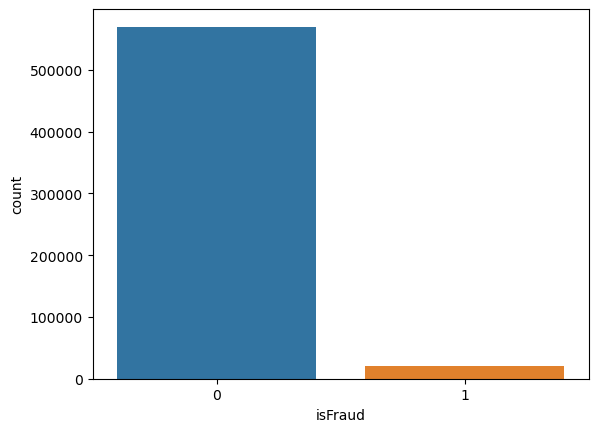

In [10]:
sns.countplot(data=train_trans, x='isFraud')

we have an extremely unbalanced data set with a small protion of fraud transactions .Therefore, we have to balance our dataset form later the training step. We can use Stratified K-fold validation or oversampling or undersampling.
As one can expect, this is a class imbalance problem. Thus, the accuracy and specifity are not a good criteria to measure the models we want to apply later and we must change the sensitivity in our classification models and change it to 0.35 indstead of 0.5 or apply more novel methods dealing with imbalance dataset. We will apply UnderSampling to deal with class imbalance in later steps. Let us understand the distribution of the timestamp column.

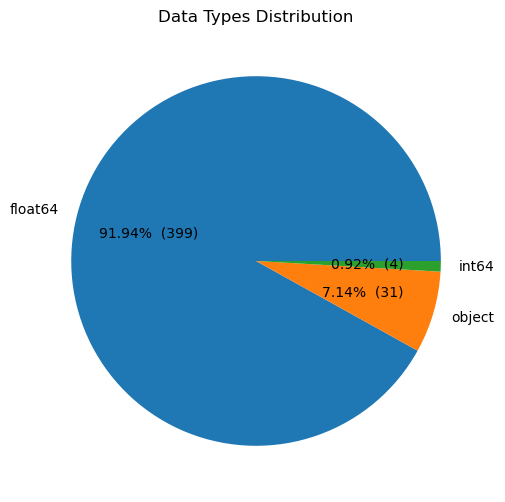

In [11]:
#visualizing data types distribution
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
counts =train_trans.dtypes.value_counts()
ax.pie(counts.values, labels=counts.index, autopct=lambda p: '{:.2f}%  ({:,.0f})'.format(p, p * sum(counts.values) / 100))
ax.set_title('Data Types Distribution')
plt.show()


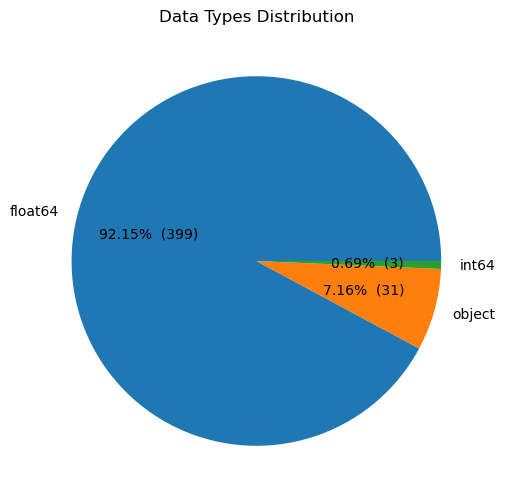

In [12]:
#visualizing data types distribution
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
counts =test_trans.dtypes.value_counts()
ax.pie(counts.values, labels=counts.index, autopct=lambda p: '{:.2f}%  ({:,.0f})'.format(p, p * sum(counts.values) / 100))
ax.set_title('Data Types Distribution')
plt.show()

In [13]:
int_col=train_trans.dtypes[train_trans.dtypes=='int64'].index
print(int_col)

Index(['TransactionID', 'isFraud', 'TransactionDT', 'card1'], dtype='object')


In [14]:
int_col=list(int_col)

In [15]:
int_col.remove('isFraud')

In [16]:
print(int_col)

['TransactionID', 'TransactionDT', 'card1']


In [17]:
object_col=train_trans.dtypes[train_trans.dtypes==object].index
print(object_col)

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')


In [18]:
object_col=list(object_col)

In [19]:
float_col=train_trans.dtypes[train_trans.dtypes=='float64'].index
print(float_col)

Index(['TransactionAmt', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1',
       'dist2', 'C1', 'C2',
       ...
       'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25',
       'id_26', 'id_32'],
      dtype='object', length=399)


In [20]:
float_col=list(float_col)


we don't know is it in seconds,minutes or hours.

If it is in hours then the dataset timespan will be x/(24*365) = 3895.884132 years which is not possible.

if it is in minutes then the dataset timespan will be x/(6024365) = 64.931402 years which is not possible because Vesta Corporation was founded in 1995 so they can have at most 24 years of data.

If it is in seconds then dataset timespan will be x/(360024365) = 1.0821 years which seems reasonable to me.

The TransactionDT variable contains timestamps in seconds, so we need to convert it to datetime format.

In [21]:
import datetime

start_date = datetime.datetime.strptime('2017.12.01', '%Y.%m.%d') # set start date from os version
train_trans['time'] = train_trans['TransactionDT'].apply(
    lambda x: datetime.timedelta(seconds=x) + start_date
)
test_trans['time'] = test_trans['TransactionDT'].apply(
    lambda x: datetime.timedelta(seconds=x) + start_date
)

In [22]:
train_trans

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  \
0       13926    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0   
1        2755  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN   
2        4663  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0   
3       18132  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN   
4        4497  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN   
...       ...    ...    ...         ...    ...     ...    ...    ...    ...   
590535   6550    NaN  150.0        visa  226.0   debit  272.0   87.0   48.0   
590536  10444  225.0  150.0  mastercard  224.0   debit  204.0   87.0    NaN   
590537  12037  595.0  150.0  mastercard  224.0   debit  231.0   87.0    NaN   
590538   7826  481.0  150.0  mastercard  224.0   debit  387.0   87.0    3.0   
590539  15066  170.0  150.0  mastercard  102.0  credit  299.0   87.0    NaN   

        dist2 P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7  \
0         NaN           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
1         NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
2         NaN   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
3         NaN     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0   
4         NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
...       ...           ...           ...  ...  ...  ...  ...  ...  ...  ...   
590535    NaN           NaN           NaN  2.0  1.0  0.0  0.0  1.0  0.0  0.0   
590536    NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
590537    NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  1.0  1.0  0.0   
590538    NaN       aol.com           NaN  1.0  1.0  0.0  0.0  0.0  3.0  0.0   
590539    NaN     gmail.com           NaN  2.0  1.0  0.0  0.0  1.0  1.0  0.0   

         C8   C9  C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  \
0       0.0  1.0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN   
1       0.0  0.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
2       0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
3       0.0  1.0  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN   
4       1.0  0.0  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN   
...     ...  ...  ...  ...  ...   ...  ...    ...    ...   ...   ...  ...  ..   
590535  0.0  2.0  0.0  1.0  0.0   3.0  2.0   29.0   29.0  30.0   NaN  NaN NaN   
590536  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
590537  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
590538  0.0  2.0  0.0  1.0  1.0   5.0  1.0   22.0   22.0   0.0  22.0  0.0 NaN   
590539  0.0  2.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   0.0   1.0  0.0 NaN   

        D7  D8  D9   D10    D11  D12  D13  D14    D15   M1   M2   M3   M4  \
0      NaN NaN NaN  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2   
1      NaN NaN NaN   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN  

In [23]:
train_trans['time'].describe()

C:\Users\MSI\AppData\Local\Temp\ipykernel_26468\1480698095.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train_trans['time'].describe()


count                  590540
unique                 573349
top       2018-03-20 15:53:37
freq                        8
first     2017-12-02 00:00:00
last      2018-06-01 23:58:51
Name: time, dtype: object

In [24]:
test_trans['time'].describe()

C:\Users\MSI\AppData\Local\Temp\ipykernel_26468\472860435.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  test_trans['time'].describe()


count                  506691
unique                 494686
top       2018-12-25 01:03:33
freq                        4
first     2018-07-02 00:00:24
last      2018-12-31 23:59:05
Name: time, dtype: object

In [25]:
train_trans['time'] = pd.to_datetime(train_trans['time'])
train_trans= train_trans.set_index('time')

In [26]:
test_trans['time'] = pd.to_datetime(test_trans['time'])
test_trans= test_trans.set_index('time')

In [27]:
train_trans

TransactionID  isFraud  TransactionDT  TransactionAmt  \
time                                                                         
2017-12-02 00:00:00        2987000        0          86400           68.50   
2017-12-02 00:00:01        2987001        0          86401           29.00   
2017-12-02 00:01:09        2987002        0          86469           59.00   
2017-12-02 00:01:39        2987003        0          86499           50.00   
2017-12-02 00:01:46        2987004        0          86506           50.00   
...                            ...      ...            ...             ...   
2018-06-01 23:57:27        3577535        0       15811047           49.00   
2018-06-01 23:57:29        3577536        0       15811049           39.50   
2018-06-01 23:57:59        3577537        0       15811079           30.95   
2018-06-01 23:58:08        3577538        0       15811088          117.00   
2018-06-01 23:58:51        3577539        0       15811131          279.95   

                    ProductCD  card1  card2  card3       card4  card5   card6  \
time                                                                            
2017-12-02 00:00:00         W  13926    NaN  150.0    discover  142.0  credit   
2017-12-02 00:00:01         W   2755  404.0  150.0  mastercard  102.0  credit   
2017-12-02 00:01:09         W   4663  490.0  150.0        visa  166.0   debit   
2017-12-02 00:01:39         W  18132  567.0  150.0  mastercard  117.0   debit   
2017-12-02 00:01:46         H   4497  514.0  150.0  mastercard  102.0  credit   
...                       ...    ...    ...    ...         ...    ...     ...   
2018-06-01 23:57:27         W   6550    NaN  150.0        visa  226.0   debit   
2018-06-01 23:57:29         W  10444  225.0  150.0  mastercard  224.0   debit   
2018-06-01 23:57:59         W  12037  595.0  150.0  mastercard  224.0   debit   
2018-06-01 23:58:08         W   7826  481.0  150.0  mastercard  224.0   debit   
2018-06-01 23:58:51         W  15066  170.0  150.0  mastercard  102.0  credit   

                     addr1  addr2  dist1  dist2 P_emaildomain R_emaildomain  \
time                                                                          
2017-12-02 00:00:00  315.0   87.0   19.0    NaN           NaN           NaN   
2017-12-02 00:00:01  325.0   87.0    NaN    NaN     gmail.com           NaN   
2017-12-02 00:01:09  330.0   87.0  287.0    NaN   outlook.com           NaN   
2017-12-02 00:01:39  476.0   87.0    NaN    NaN     yahoo.com           NaN   
2017-12-02 00:01:46  420.0   87.0    NaN    NaN     gmail.com           NaN   
...                    ...    ...    ...    ...           ...           ...   
2018-06-01 23:57:27  272.0   87.0   48.0    NaN           NaN           NaN   
2018-06-01 23:57:29  204.0   87.0    NaN    NaN     gmail.com           NaN   
2018-06-01 23:57:59  231.0   87.0    NaN    NaN     gmail.com           NaN   
2018-06-01 23:58:08  387.0   87.0    3.0    NaN       aol.com           NaN   
2018-06-01 23:58:51  299.0   87.0    NaN    NaN     gmail.com           NaN   

                      C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  \
time                                                                         
2017-12-02 00:00:00  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0   
2017-12-02 00:00:01  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
2017-12-02 00:01:09  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0   
2017-12-02 00:01:39  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0   
2017-12-02 00:01:46  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0   
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2018-06-01 23:57:27  2.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  2.0  0.0  1.0   
2018-06-01 23:57:29  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0   
2018-06-01 23:57:59  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0   
2018-06-01 23:58:08  1.0  1.0  0.0  0.0  0.0  3.0  0.0  0.0  2.0  

In [28]:
train_trans['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

it's an unballanced data set 

In [29]:
test_trans1=test_trans.copy()
test_trans1['isFraud']=-1
train_trans1=train_trans.copy()

In [30]:
train_trans1['type'] = 'train'
test_trans1['type'] = 'test'

In [31]:
all_df = pd.concat([train_trans1, test_trans1], axis=0)

In [32]:
all_df

TransactionID  isFraud  TransactionDT  TransactionAmt  \
time                                                                         
2017-12-02 00:00:00        2987000        0          86400          68.500   
2017-12-02 00:00:01        2987001        0          86401          29.000   
2017-12-02 00:01:09        2987002        0          86469          59.000   
2017-12-02 00:01:39        2987003        0          86499          50.000   
2017-12-02 00:01:46        2987004        0          86506          50.000   
...                            ...      ...            ...             ...   
2018-12-31 23:57:59        4170235       -1       34214279          94.679   
2018-12-31 23:58:07        4170236       -1       34214287          12.173   
2018-12-31 23:58:46        4170237       -1       34214326          49.000   
2018-12-31 23:58:57        4170238       -1       34214337         202.000   
2018-12-31 23:59:05        4170239       -1       34214345          24.346   

                    ProductCD  card1  card2  card3       card4  card5   card6  \
time                                                                            
2017-12-02 00:00:00         W  13926    NaN  150.0    discover  142.0  credit   
2017-12-02 00:00:01         W   2755  404.0  150.0  mastercard  102.0  credit   
2017-12-02 00:01:09         W   4663  490.0  150.0        visa  166.0   debit   
2017-12-02 00:01:39         W  18132  567.0  150.0  mastercard  117.0   debit   
2017-12-02 00:01:46         H   4497  514.0  150.0  mastercard  102.0  credit   
...                       ...    ...    ...    ...         ...    ...     ...   
2018-12-31 23:57:59         C  13832  375.0  185.0  mastercard  224.0   debit   
2018-12-31 23:58:07         C   3154  408.0  185.0  mastercard  224.0   debit   
2018-12-31 23:58:46         W  16661  490.0  150.0        visa  226.0   debit   
2018-12-31 23:58:57         W  16621  516.0  150.0  mastercard  224.0   debit   
2018-12-31 23:59:05         C   5713  168.0  144.0        visa  147.0  credit   

                     addr1  addr2  dist1  dist2 P_emaildomain R_emaildomain  \
time                                                                          
2017-12-02 00:00:00  315.0   87.0   19.0    NaN           NaN           NaN   
2017-12-02 00:00:01  325.0   87.0    NaN    NaN     gmail.com           NaN   
2017-12-02 00:01:09  330.0   87.0  287.0    NaN   outlook.com           NaN   
2017-12-02 00:01:39  476.0   87.0    NaN    NaN     yahoo.com           NaN   
2017-12-02 00:01:46  420.0   87.0    NaN    NaN     gmail.com           NaN   
...                    ...    ...    ...    ...           ...           ...   
2018-12-31 23:57:59  284.0   60.0    NaN    NaN     gmail.com     gmail.com   
2018-12-31 23:58:07    NaN    NaN    NaN  157.0   hotmail.com   hotmail.com   
2018-12-31 23:58:46  327.0   87.0    NaN    NaN   hotmail.com           NaN   
2018-12-31 23:58:57  177.0   87.0    NaN    NaN   hotmail.com           NaN   
2018-12-31 23:59:05    NaN    NaN    NaN    NaN   hotmail.com   hotmail.com   

                      C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  \
time                                                                         
2017-12-02 00:00:00  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0   
2017-12-02 00:00:01  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
2017-12-02 00:01:09  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0   
2017-12-02 00:01:39  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0   
2017-12-02 00:01:46  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0   
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2018-12-31 23:57:59  1.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0   
2018-12-31 23:58:07  1.0  3.0  0.0  1.0  0.0  1.0  1.0  2.0  0.0  2.0  1.0   
2018-12-31 23:58:46  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0   
2018-12-31 23:58:57  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  

MONTHLY GRANULARITY

<Axes: xlabel='time', ylabel='Count'>

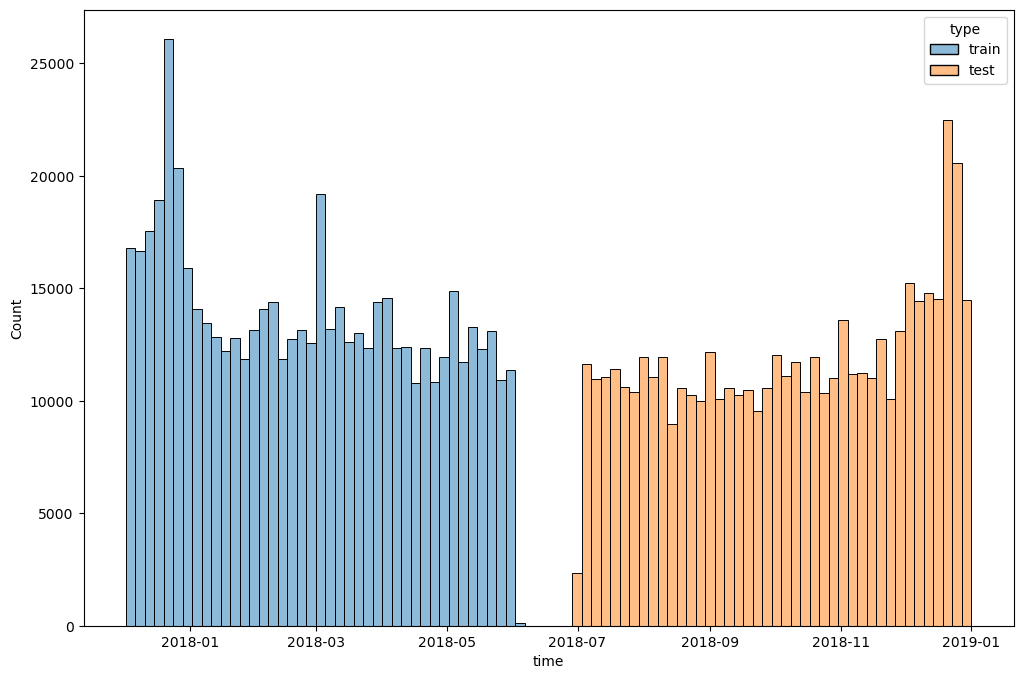

In [33]:
plt.figure(figsize=(12, 8))
sns.histplot(data=all_df.groupby(['time','type']).agg({'TransactionID': 'count'}), x='time', hue='type')

There is a gap between the train data and test data in the time variable. This could  lead to overfitting, so we will remove or convert the gap.

We also found that there are more transactions in December then other months. Therefore, we will investigate the December transaction pattern.

C:\Users\MSI\AppData\Local\Temp\ipykernel_26468\2490415168.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[0], color='r')
C:\Users\MSI\AppData\Local\Temp\ipykernel_26468\2490415168.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(time_val), ax=ax[1], color='b')


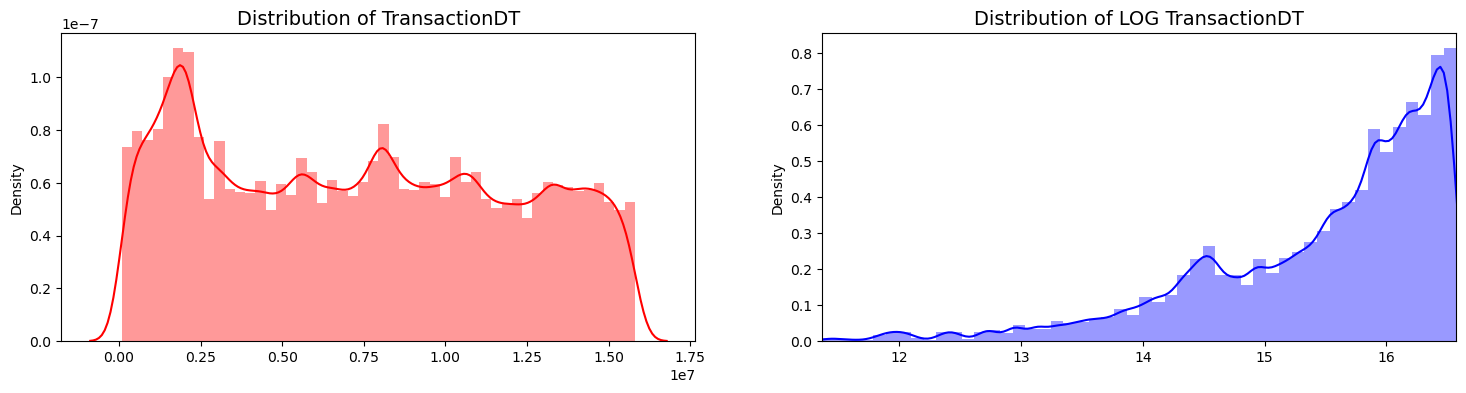

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

time_val = train_trans['TransactionDT'].values

sns.distplot(time_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of TransactionDT', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

sns.distplot(np.log(time_val), ax=ax[1], color='b')
ax[1].set_title('Distribution of LOG TransactionDT', fontsize=14)
ax[1].set_xlim([min(np.log(time_val)), max(np.log(time_val))])

plt.show()

C:\Users\MSI\AppData\Local\Temp\ipykernel_26468\74789904.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[0], color='r')
C:\Users\MSI\AppData\Local\Temp\ipykernel_26468\74789904.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(time_val), ax=ax[1], color='b')


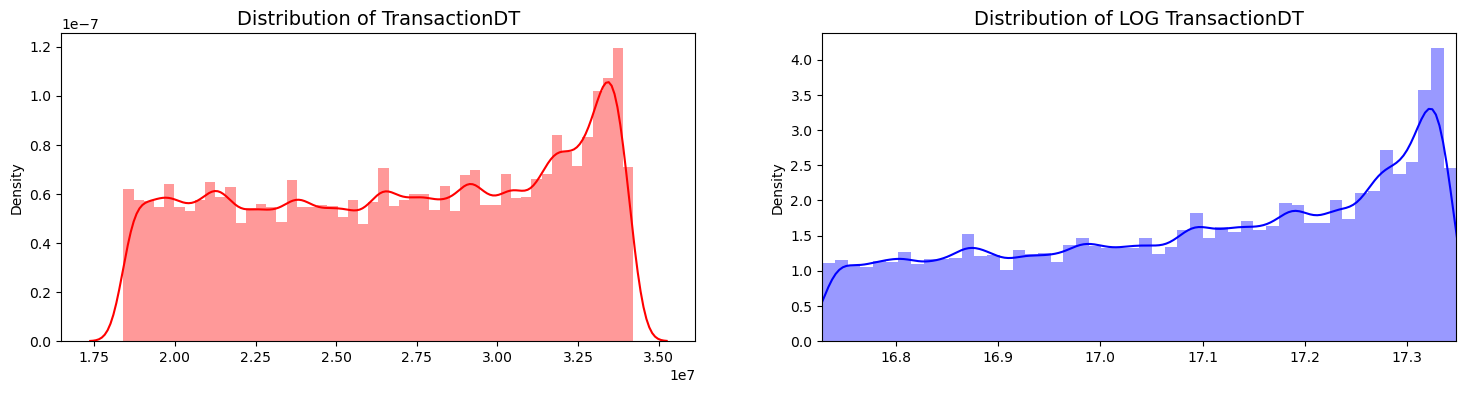

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

time_val = test_trans['TransactionDT'].values

sns.distplot(time_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of TransactionDT', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

sns.distplot(np.log(time_val), ax=ax[1], color='b')
ax[1].set_title('Distribution of LOG TransactionDT', fontsize=14)
ax[1].set_xlim([min(np.log(time_val)), max(np.log(time_val))])

plt.show()

In [36]:
pd.set_option('display.max_row',436)

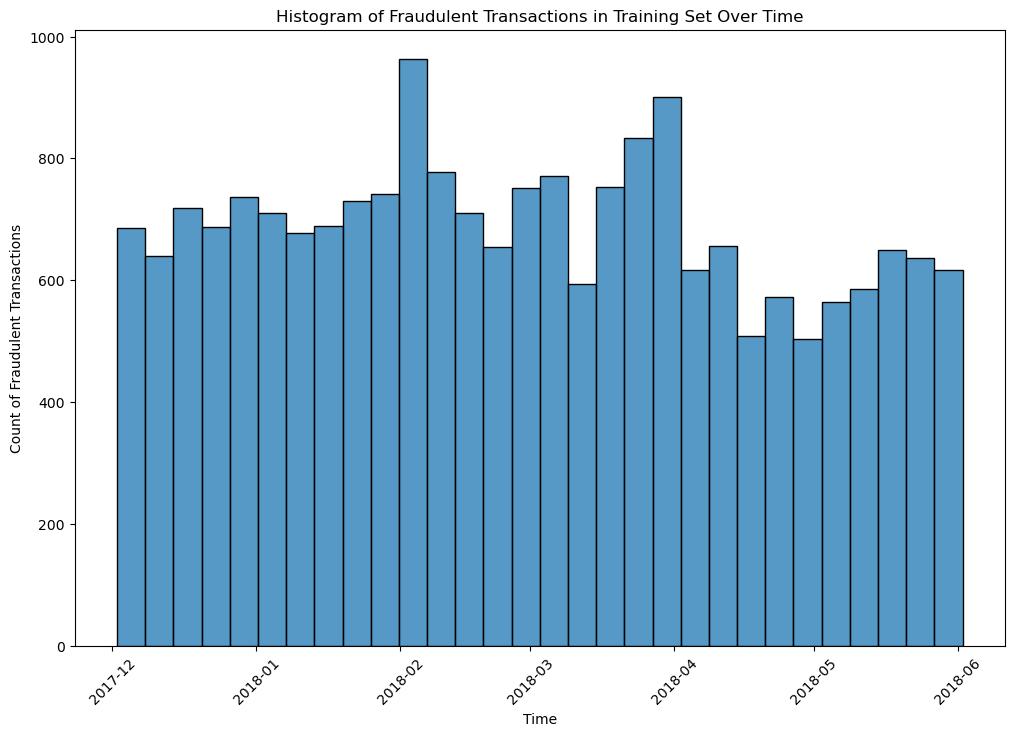

In [37]:
# Filter for fraudulent transactions in the training set
fraud_train = all_df[(all_df['type'] == 'train') & (all_df['isFraud'] == 1)]

# Group by 'time' and count the fraudulent transactions
fraud_train_counts = fraud_train.groupby('time').agg({'TransactionID': 'count'}).reset_index()

# Plot the histogram
plt.figure(figsize=(12, 8))
sns.histplot(data=fraud_train_counts, x='time')
plt.title("Histogram of Fraudulent Transactions in Training Set Over Time")
plt.xlabel("Time")
plt.ylabel("Count of Fraudulent Transactions")
plt.xticks(rotation=45)
plt.show()


The counts of fraudulent transactions remain relatively stable across the months, with values mostly between 2000 and 2500 transactions. This suggests that fraud occurs at a fairly constant rate in the training period, without significant spikes or drops. 

Lack of Strong Seasonal Pattern:
Unlike typical transaction volumes, which may have clear seasonal patterns (e.g., higher activity around holidays), fraudulent transactions in this training set don't show strong seasonal variations. This can suggest that fraudsters attempt their activity somewhat consistently throughout the year.

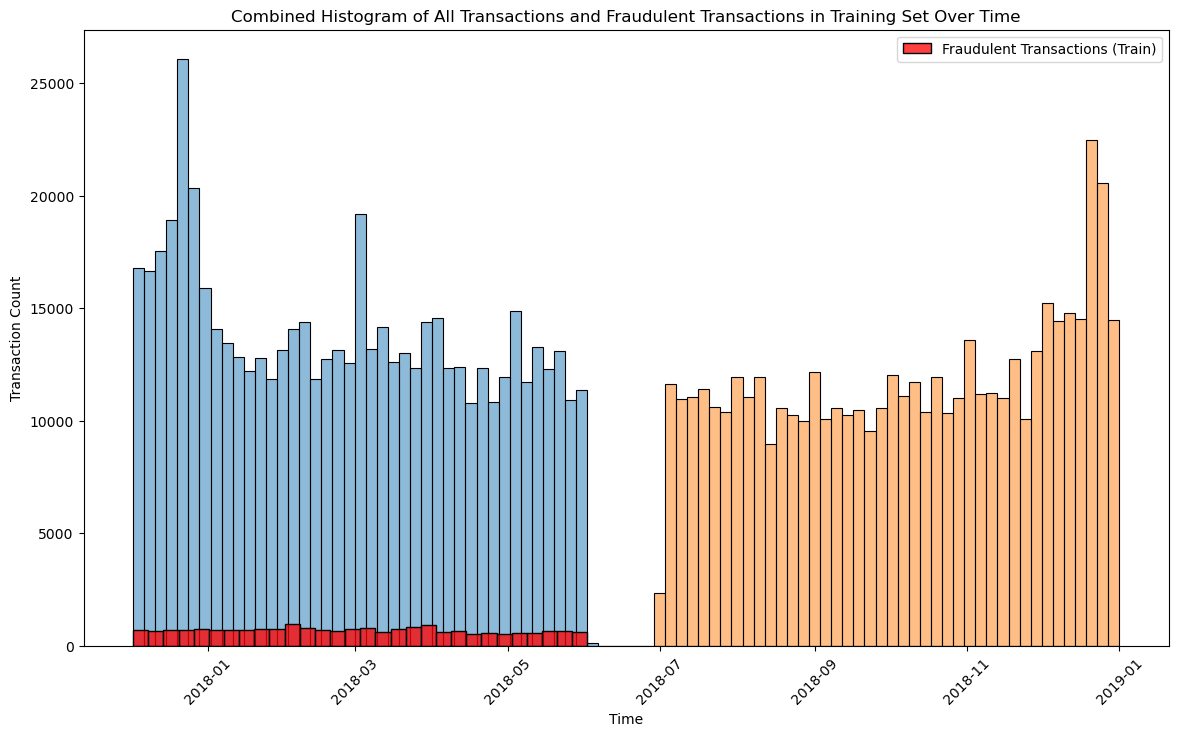

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for fraudulent transactions in the training set
fraud_train = all_df[(all_df['type'] == 'train') & (all_df['isFraud'] == 1)]

# Group by 'time' and count the fraudulent transactions
fraud_train_counts = fraud_train.groupby('time').agg({'TransactionID': 'count'}).reset_index()

# Group the entire dataset by 'time' and 'type' to get the count of all transactions
all_transaction_counts = all_df.groupby(['time', 'type']).agg({'TransactionID': 'count'}).reset_index()

# Plot both histograms in a single figure
plt.figure(figsize=(14, 8))

# Plot for all transactions (train and test sets)
sns.histplot(data=all_transaction_counts, x='time', hue='type')

# Overlay the histogram for fraudulent transactions in the training set
sns.histplot(data=fraud_train_counts, x='time', color='red', label="Fraudulent Transactions (Train)")

# Customize the plot
plt.title("Combined Histogram of All Transactions and Fraudulent Transactions in Training Set Over Time")
plt.xlabel("Time")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.legend()
plt.show()


This plot confirms the stability of the fraudulent transaction during the training period.This consistency suggests that fraudulent activity may not be closely tied to seasonal patterns or peaks in regular transactions.

DAILY AND WEEKLY GRANULARITY

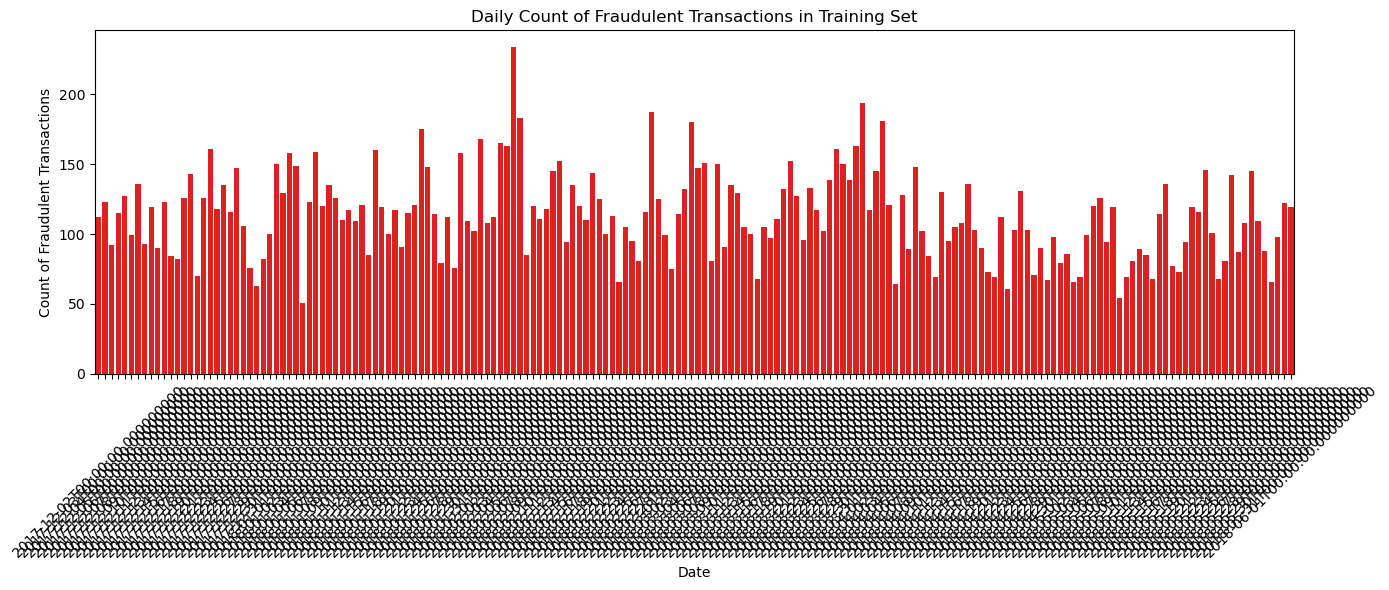

In [39]:
# Filter for fraudulent transactions in the training set
fraud_train_daily = all_df[(all_df['type'] == 'train') & (all_df['isFraud'] == 1)]

# Group by day and count fraudulent transactions
fraud_train_daily_counts = fraud_train.resample('D').TransactionID.count().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=fraud_train_daily_counts, x='time', y='TransactionID', color='red')
plt.title("Daily Count of Fraudulent Transactions in Training Set")
plt.xlabel("Date")
plt.ylabel("Count of Fraudulent Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


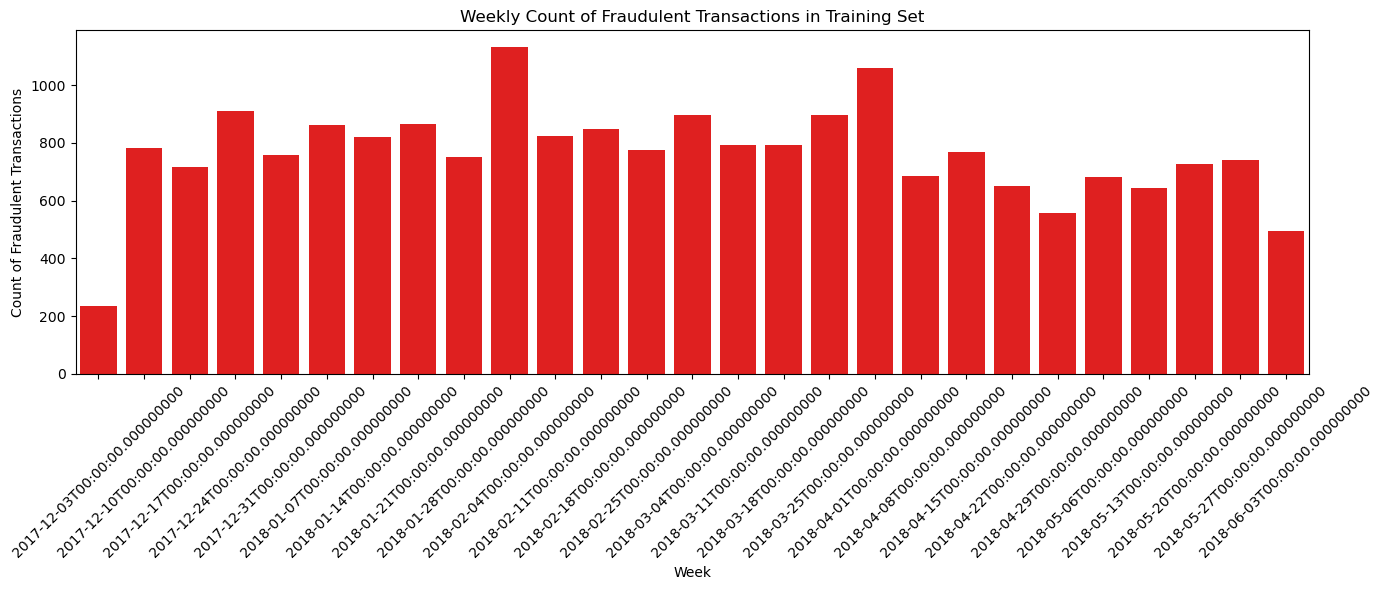

In [40]:
# Group by week and count fraudulent transactions
fraud_train_weekly_counts = fraud_train_daily.resample('W').TransactionID.count().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=fraud_train_weekly_counts, x='time', y='TransactionID', color='red')
plt.title("Weekly Count of Fraudulent Transactions in Training Set")
plt.xlabel("Week")
plt.ylabel("Count of Fraudulent Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


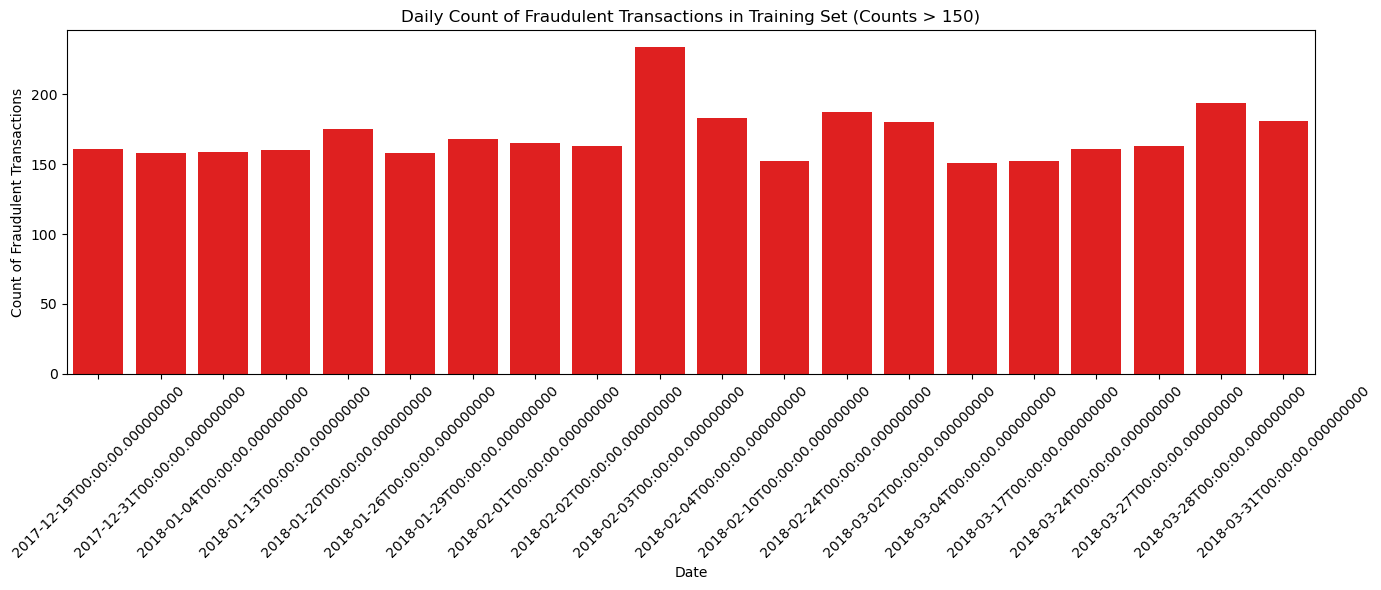

In [41]:
import pandas as pd

# Filter for fraudulent transactions in the training set
fraud_train_daily = all_df[(all_df['type'] == 'train') & (all_df['isFraud'] == 1)]

# Group by day and count fraudulent transactions
fraud_train_daily_counts = fraud_train_daily.resample('D').TransactionID.count().reset_index()

# Filter to keep only the days with counts greater than 200
fraud_train_daily_counts_filtered = fraud_train_daily_counts[fraud_train_daily_counts['TransactionID'] > 150]

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=fraud_train_daily_counts_filtered, x='time', y='TransactionID', color='red')
plt.title("Daily Count of Fraudulent Transactions in Training Set (Counts > 150)")
plt.xlabel("Date")
plt.ylabel("Count of Fraudulent Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Correlation between IsFraud and TransactionDT features

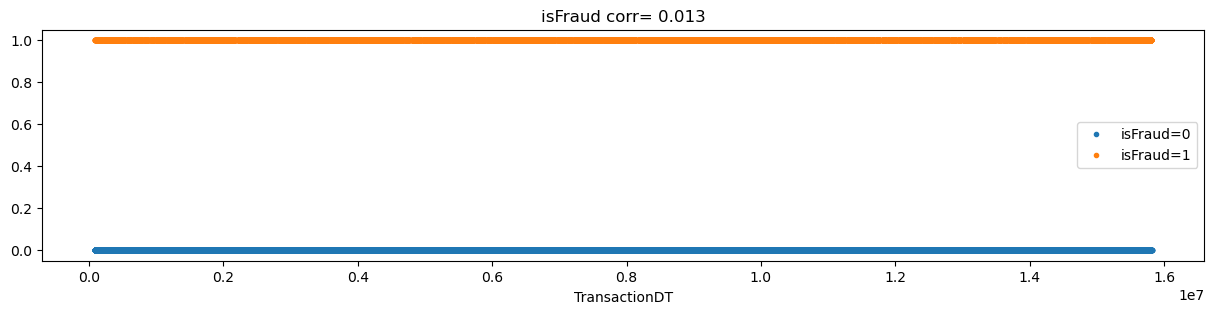

In [42]:
i = 'isFraud'
cor = np.corrcoef(train_trans['TransactionDT'], train_trans[i])[0,1]
train_trans.loc[train_trans['isFraud'] == 0].set_index('TransactionDT')[i].plot(style='.', title=i+" corr= "+str(round(cor,3)), figsize=(15, 3), label="isFraud=0")
train_trans.loc[train_trans['isFraud'] == 1].set_index('TransactionDT')[i].plot(style='.', title=i+" corr= "+str(round(cor,3)), figsize=(15, 3), label="isFraud=1")
#test_transaction.set_index('TransactionDT')[i].plot(style='.', title=i+" corr= "+str(round(cor,3)), figsize=(15, 3))
plt.legend()
plt.show()

VISUALIZE THE CREDIT/DEBIT FEATURE4S EFFECT ON THE FRAUD

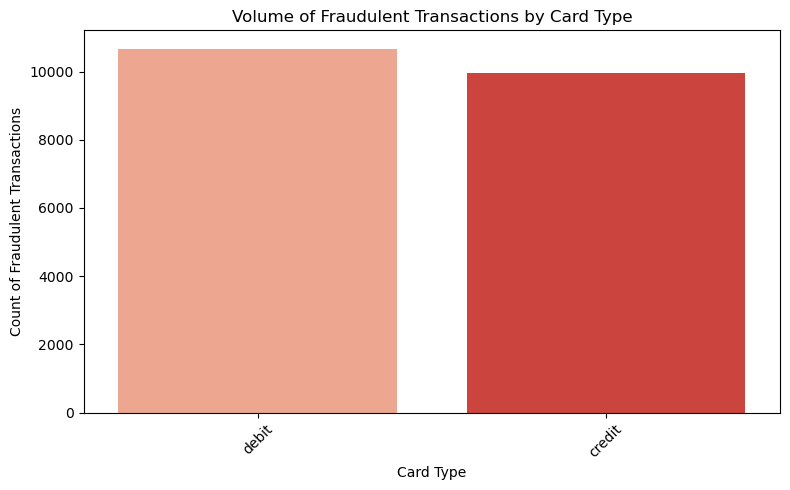

In [43]:
# Filter for fraudulent transactions
fraud_transactions = all_df[all_df['isFraud'] == 1]

# Count the number of fraudulent transactions by card6
fraud_counts = fraud_transactions['card6'].value_counts().reset_index()
fraud_counts.columns = ['card6', 'FraudCount']  # Rename columns for clarity

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=fraud_counts, x='card6', y='FraudCount', palette='Reds')
plt.title("Volume of Fraudulent Transactions by Card Type")
plt.xlabel("Card Type")
plt.ylabel("Count of Fraudulent Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Debit transactions being fraudulent are higher than the credit ones.


Text(0, 0.5, 'Transaction Values')

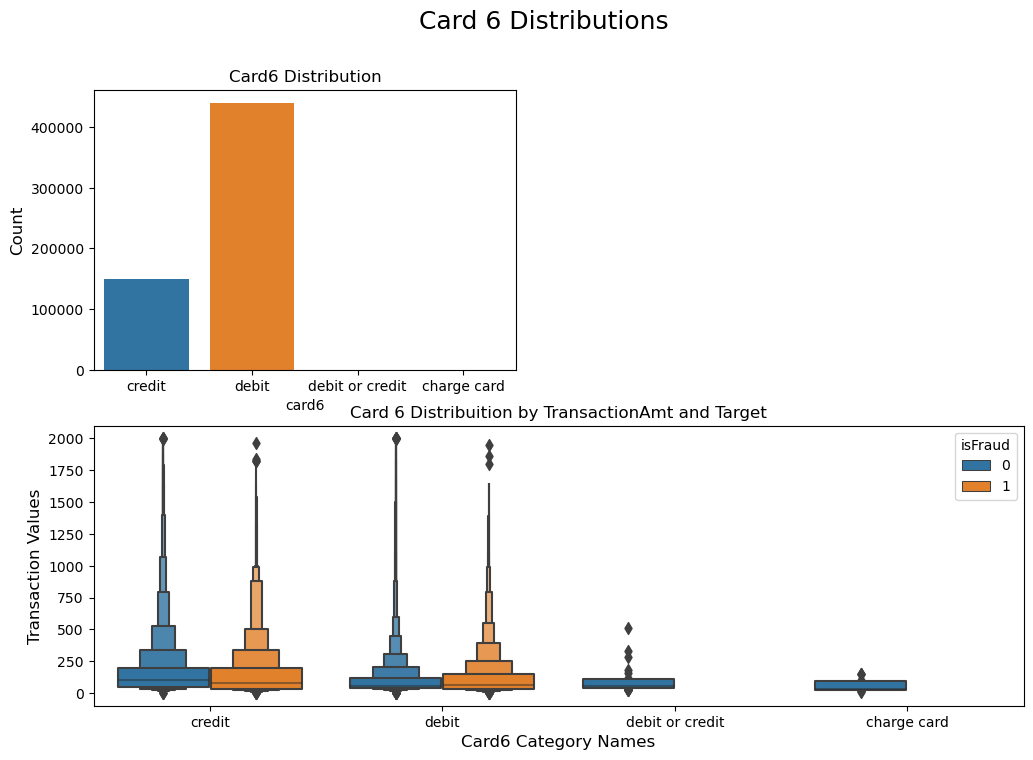

In [44]:
plt.figure(figsize=(12,8))
plt.suptitle('Card 6 Distributions', fontsize=18)

plt.subplot(221)
g = sns.countplot(x='card6', data=train_trans)
g.set_title("Card6 Distribution", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxenplot(x='card6', y='TransactionAmt', hue='isFraud', 
              data=train_trans[train_trans['TransactionAmt'] <= 2000] )
g1.set_title("Card 6 Distribuition by TransactionAmt and Target", fontsize=12)
g1.set_xlabel("Card6 Category Names", fontsize=12)
g1.set_ylabel("Transaction Values", fontsize=12)

The transaction amounts for credit operations being fraudulent are bigger than for debit operations but the frauds are more debit operations than credit ones.

TransactionAmt feature to be studied

C:\Users\MSI\AppData\Local\Temp\ipykernel_26468\1108605322.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[0], color='r')
C:\Users\MSI\AppData\Local\Temp\ipykernel_26468\1108605322.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(time_val), ax=ax[1], color='b')


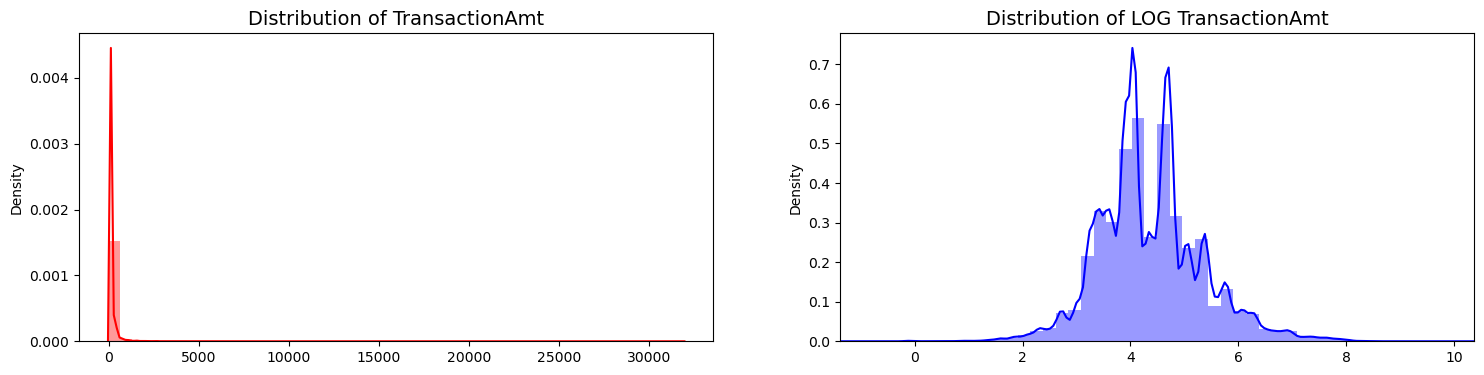

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

time_val = train_trans['TransactionAmt'].values

sns.distplot(time_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of TransactionAmt', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

sns.distplot(np.log(time_val), ax=ax[1], color='b')
ax[1].set_title('Distribution of LOG TransactionAmt', fontsize=14)
ax[1].set_xlim([min(np.log(time_val)), max(np.log(time_val))])

plt.show()

VISUALIZING DIFFERENT DATA TYPES IN THE DATASET

In [46]:
print(int_col)

['TransactionID', 'TransactionDT', 'card1']


card1 feature to be studied

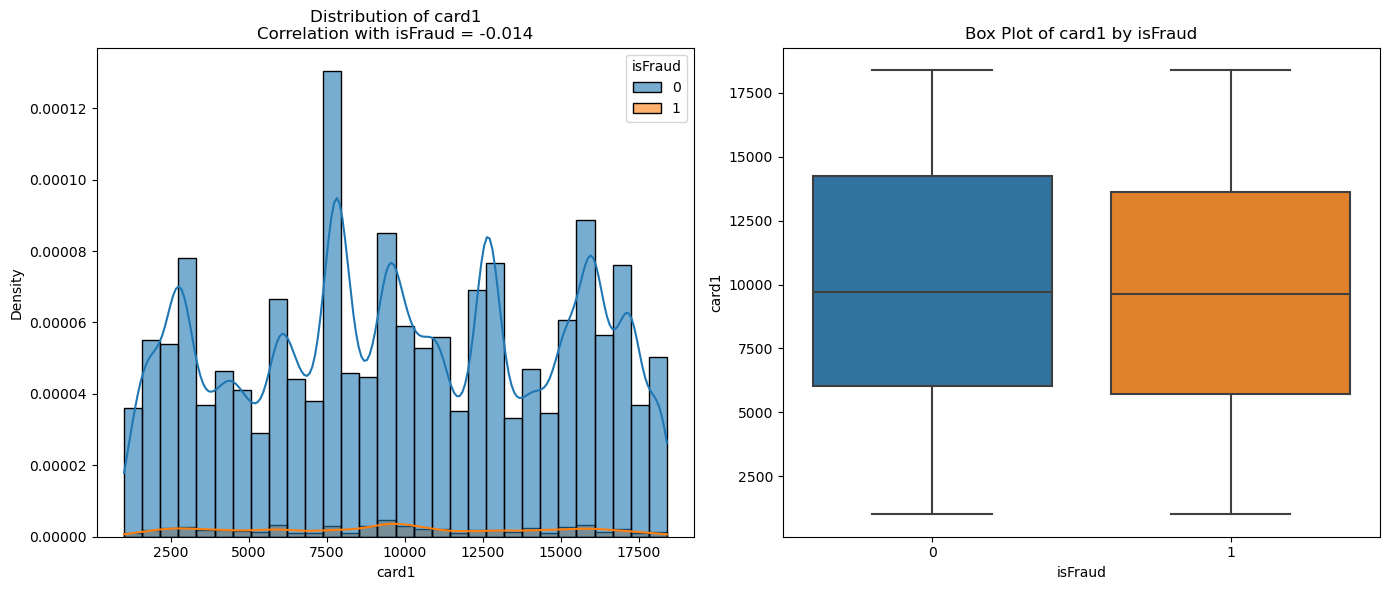

In [47]:
# Calculate correlation
cor = np.corrcoef(train_trans['card1'], train_trans['isFraud'])[0, 1]

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Distribution of card1
plt.subplot(1, 2, 1)
sns.histplot(train_trans, x='card1', hue='isFraud', bins=30, kde=True, stat='density', alpha=0.6)
plt.title(f'Distribution of card1\nCorrelation with isFraud = {round(cor, 3)}')
plt.xlabel('card1')
plt.ylabel('Density')

# Box plot of card1 by isFraud
plt.subplot(1, 2, 2)
sns.boxplot(x='isFraud', y='card1', data=train_trans)
plt.title('Box Plot of card1 by isFraud')
plt.xlabel('isFraud')
plt.ylabel('card1')

plt.tight_layout()
plt.show()

In [48]:
print(object_col)

['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


ProductCD Feature

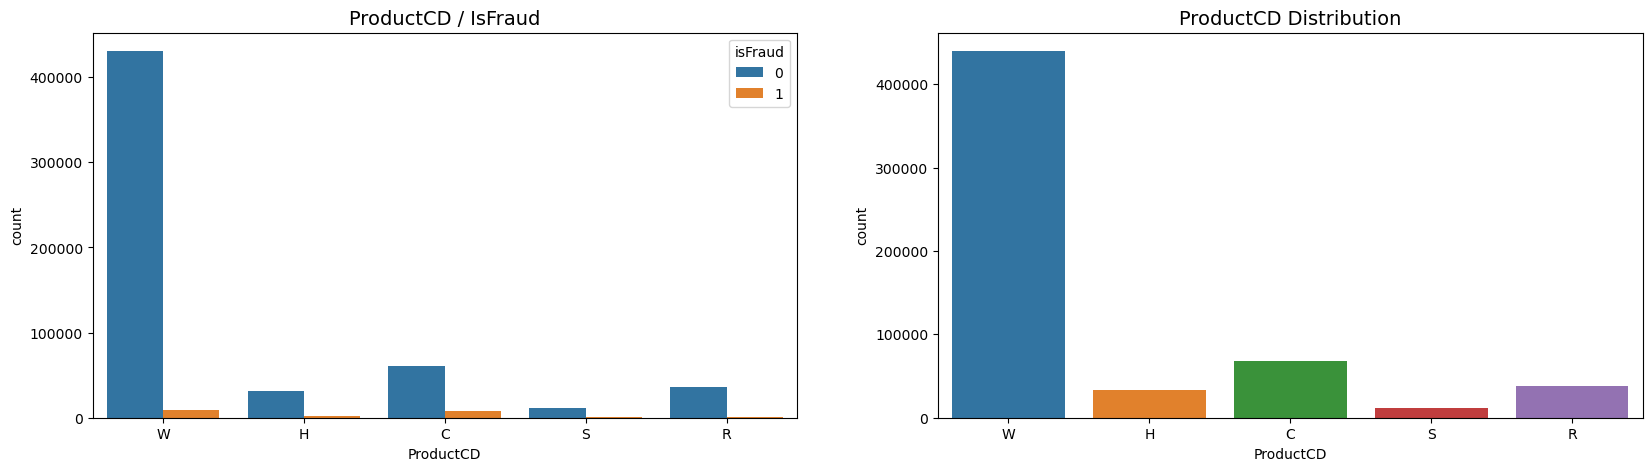

In [49]:
# Ensure 'isFraud' is treated as a string for hue
train_trans1['isFraud'] = train_trans1['isFraud'].astype(str)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Countplot with hue
sns.countplot(x="ProductCD", ax=ax[0], hue="isFraud", data=train_trans1)
ax[0].set_title('ProductCD / IsFraud', fontsize=14)

# Countplot without hue
sns.countplot(x="ProductCD", ax=ax[1], data=train_trans1)
ax[1].set_title('ProductCD Distribution', fontsize=14)

plt.show()

In [50]:
object_col.remove('ProductCD')
object_col.remove('card6')

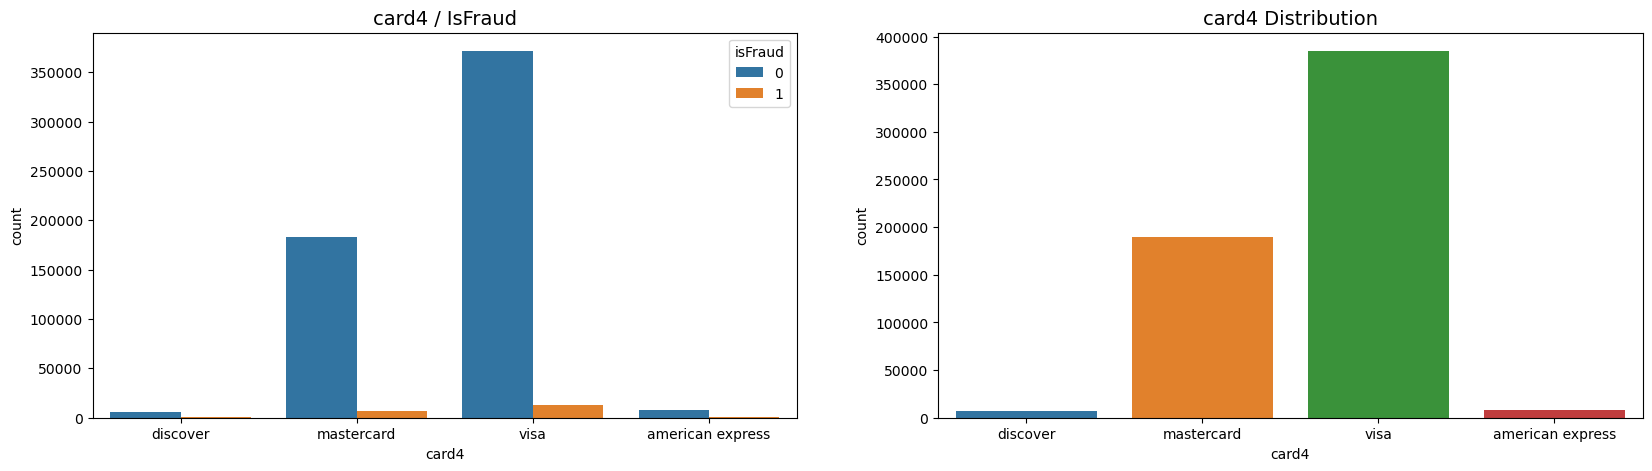

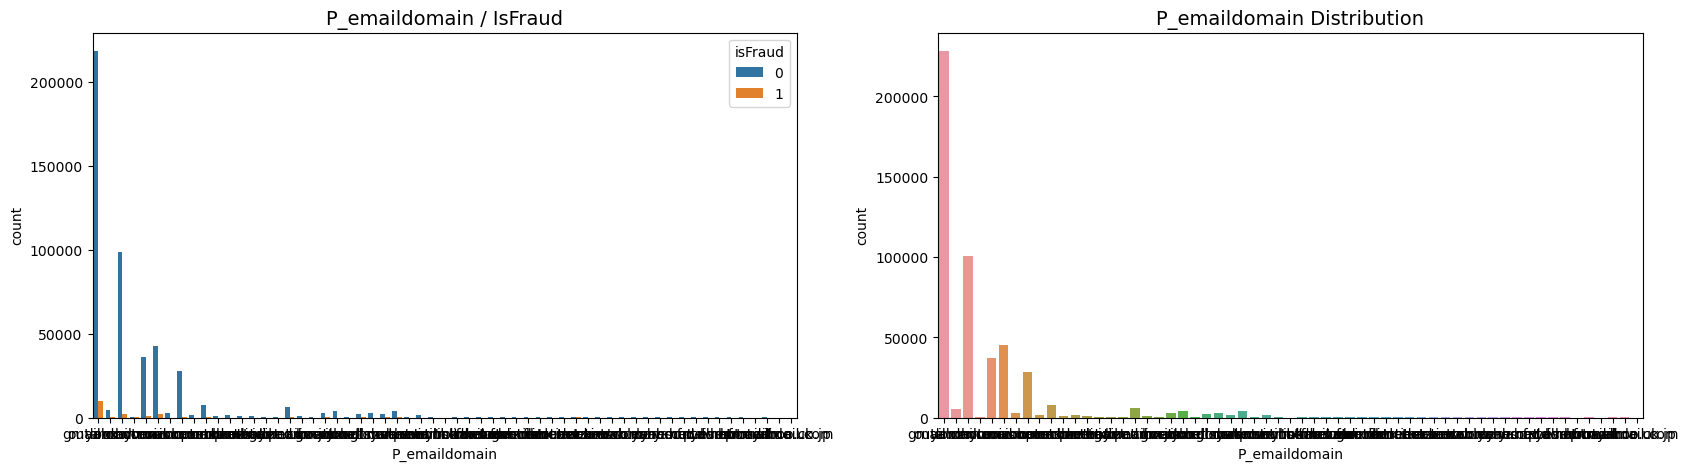

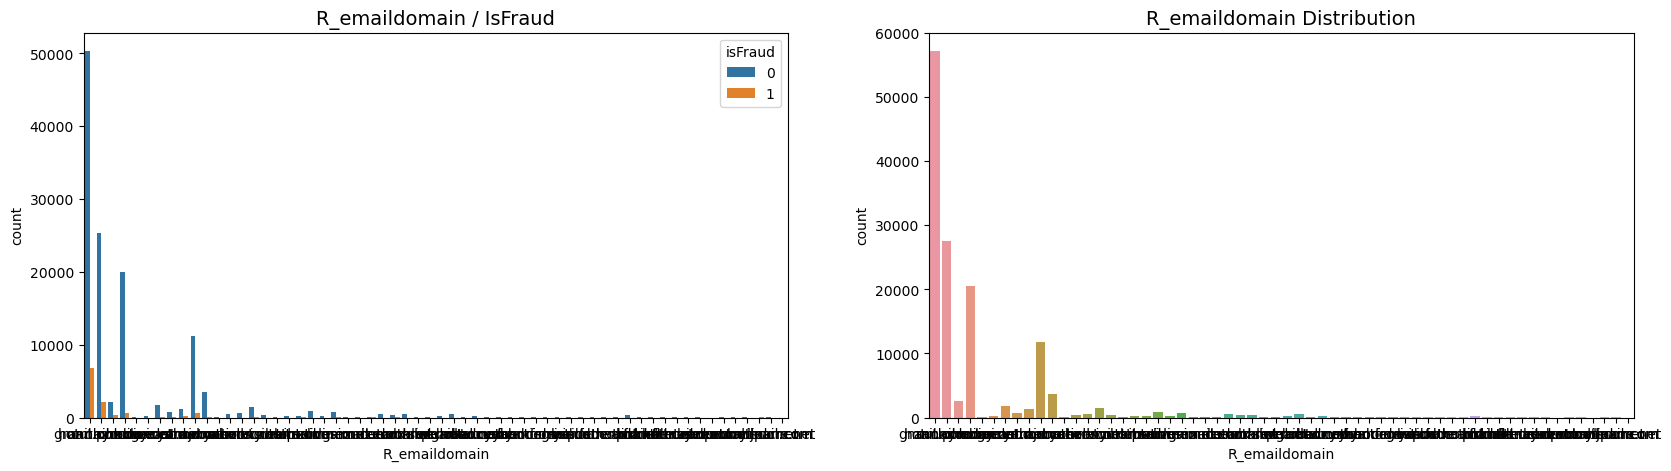

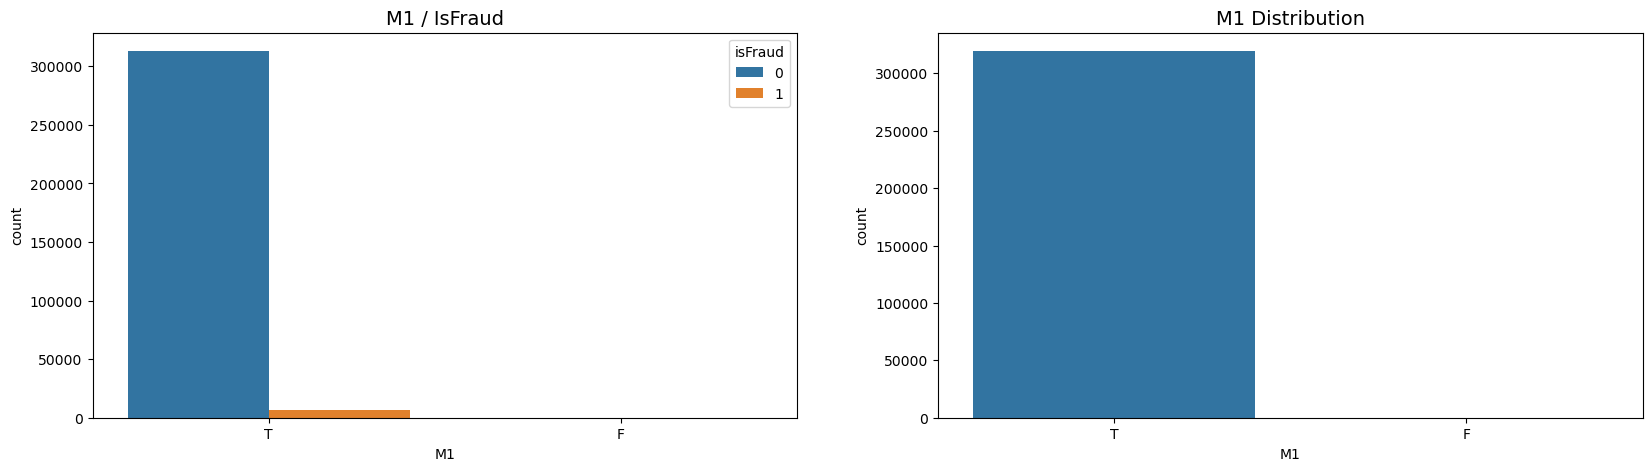

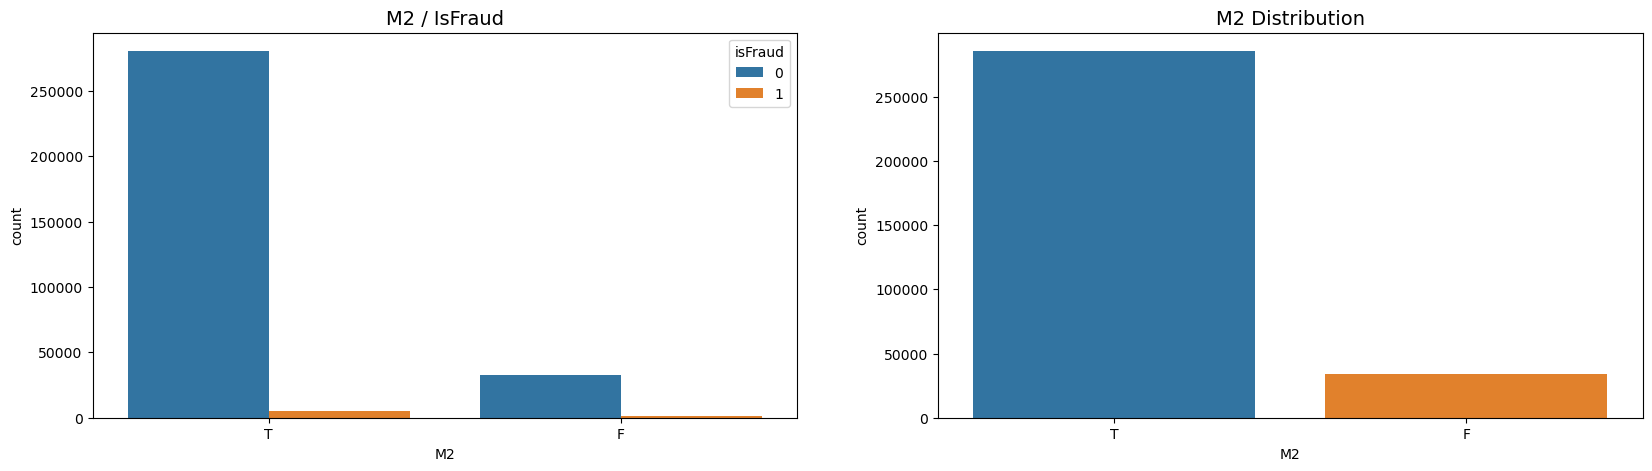

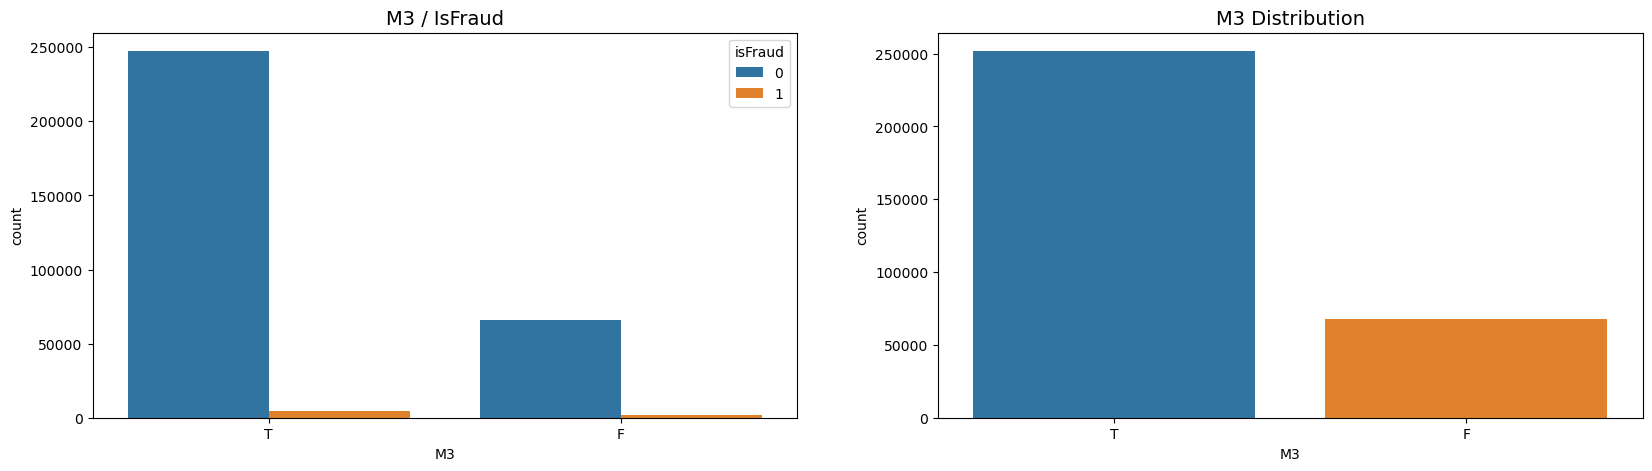

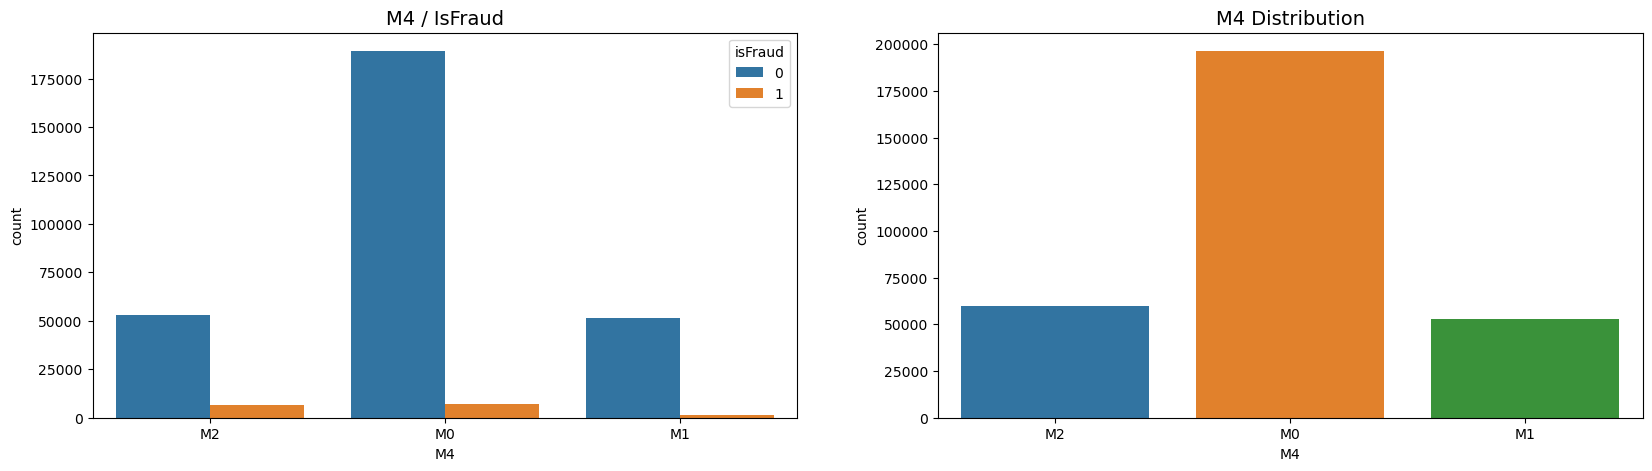

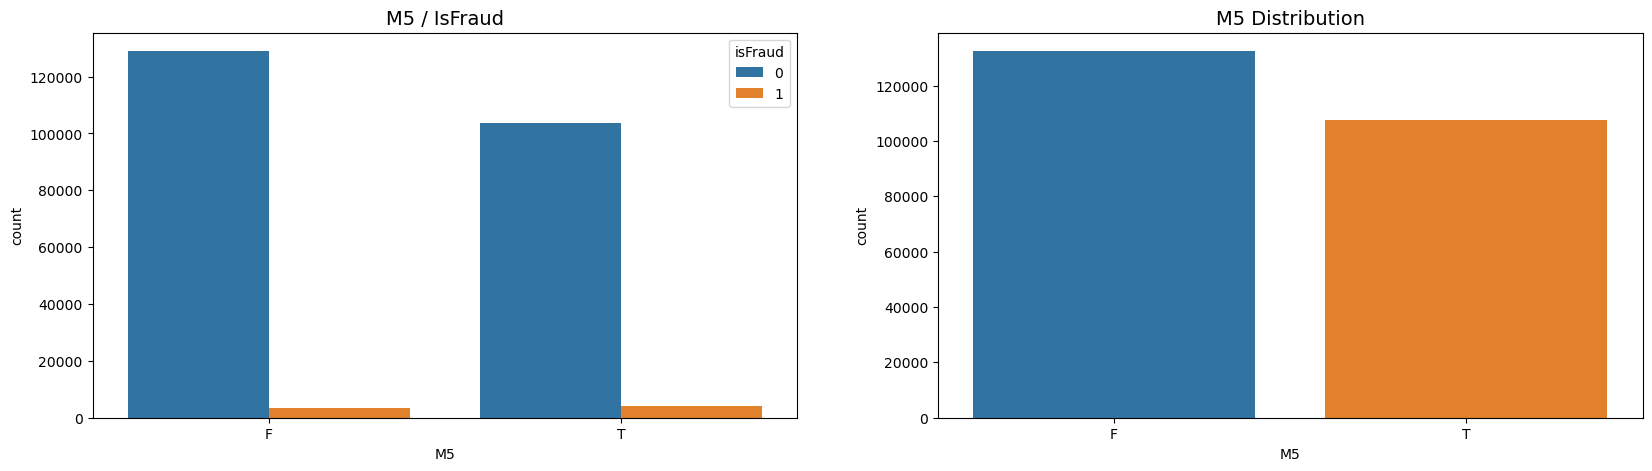

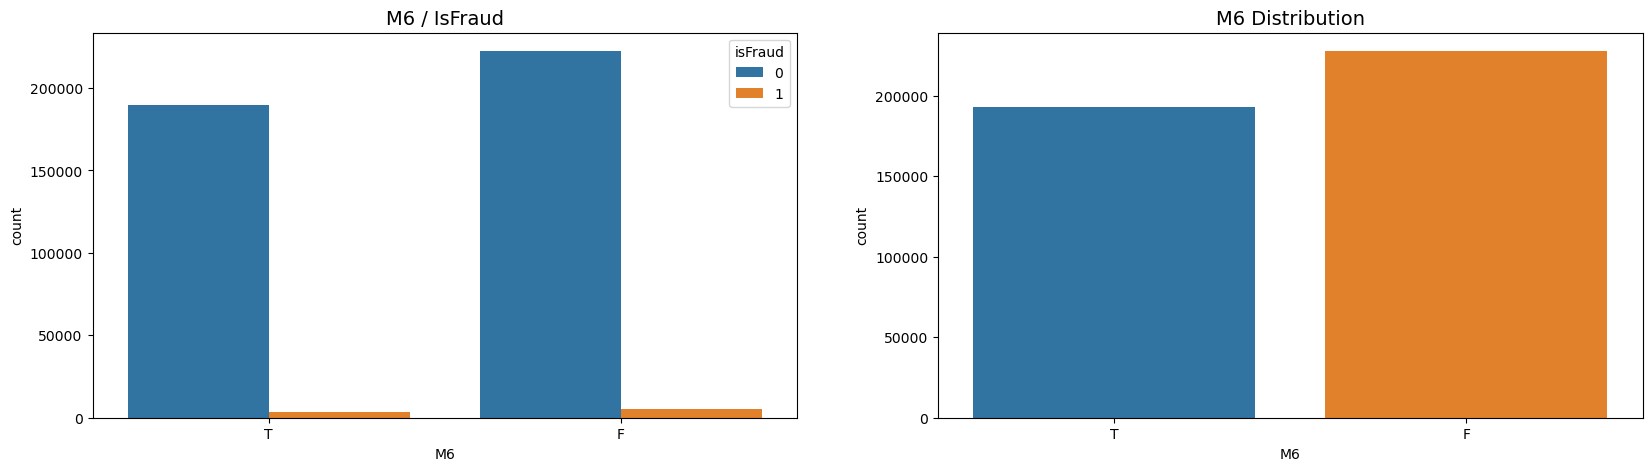

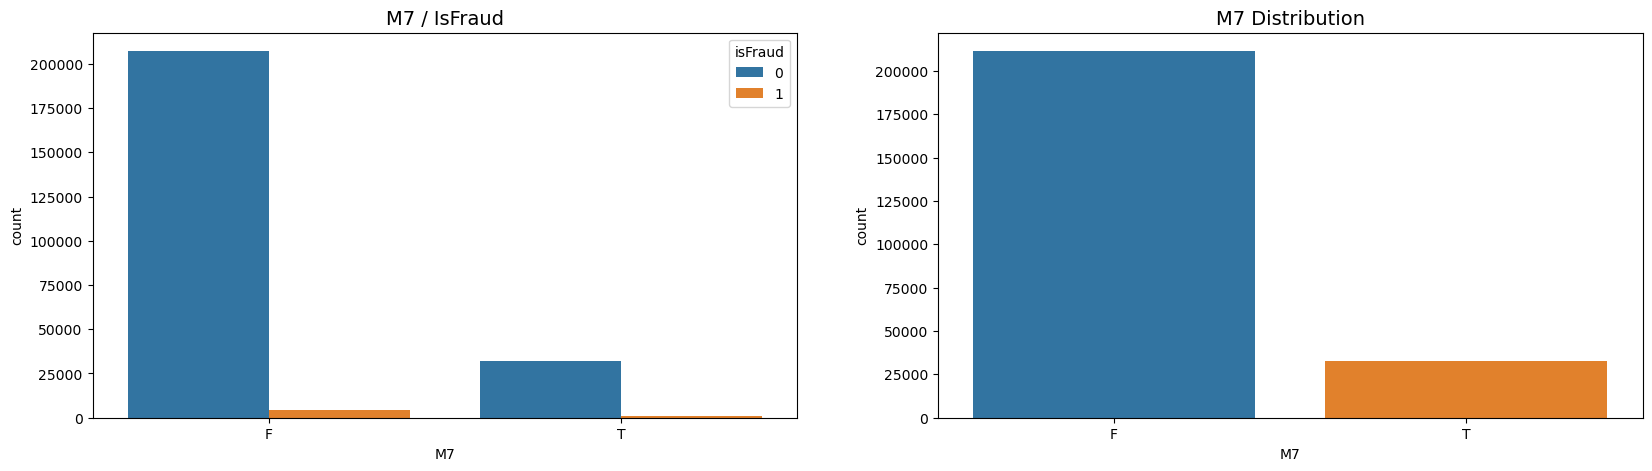

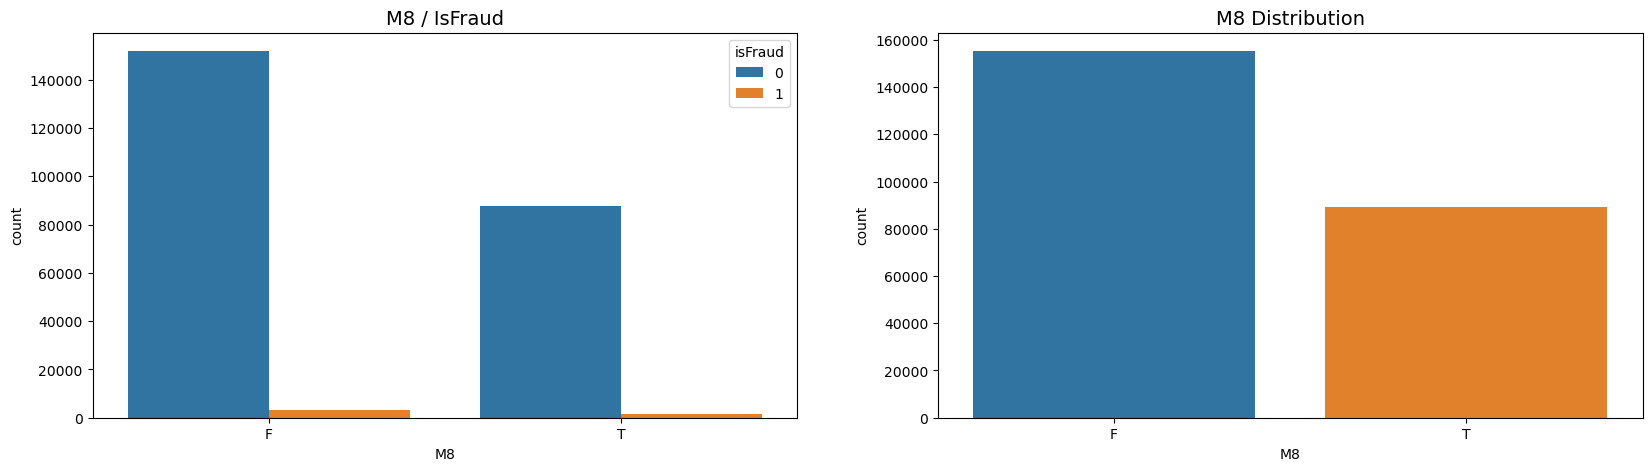

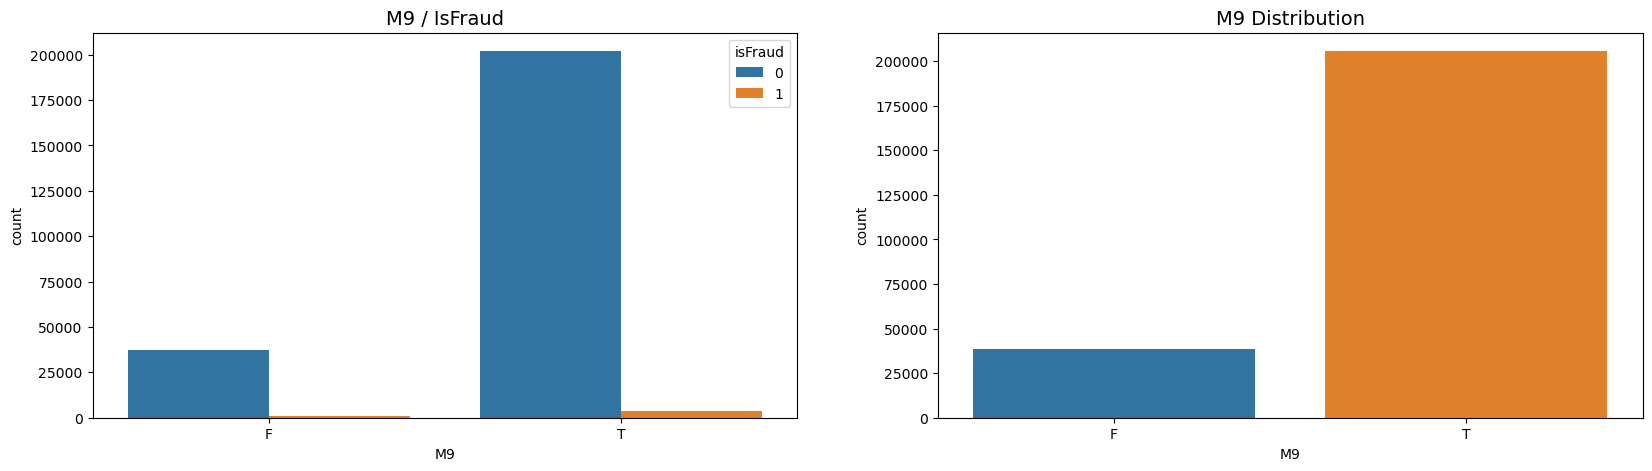

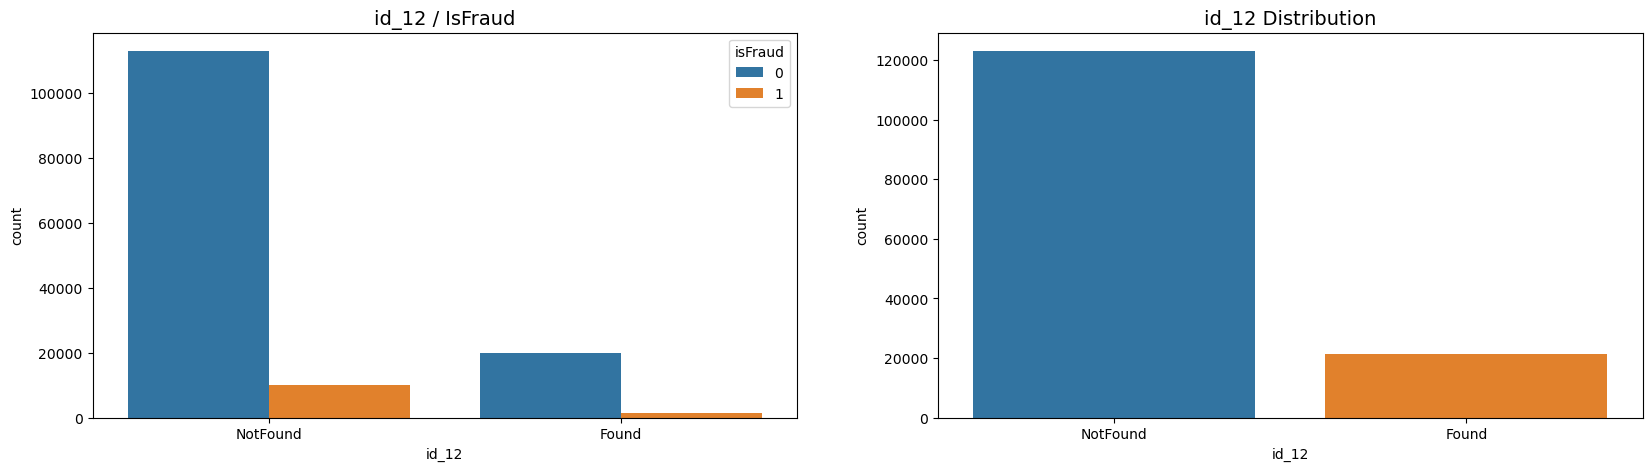

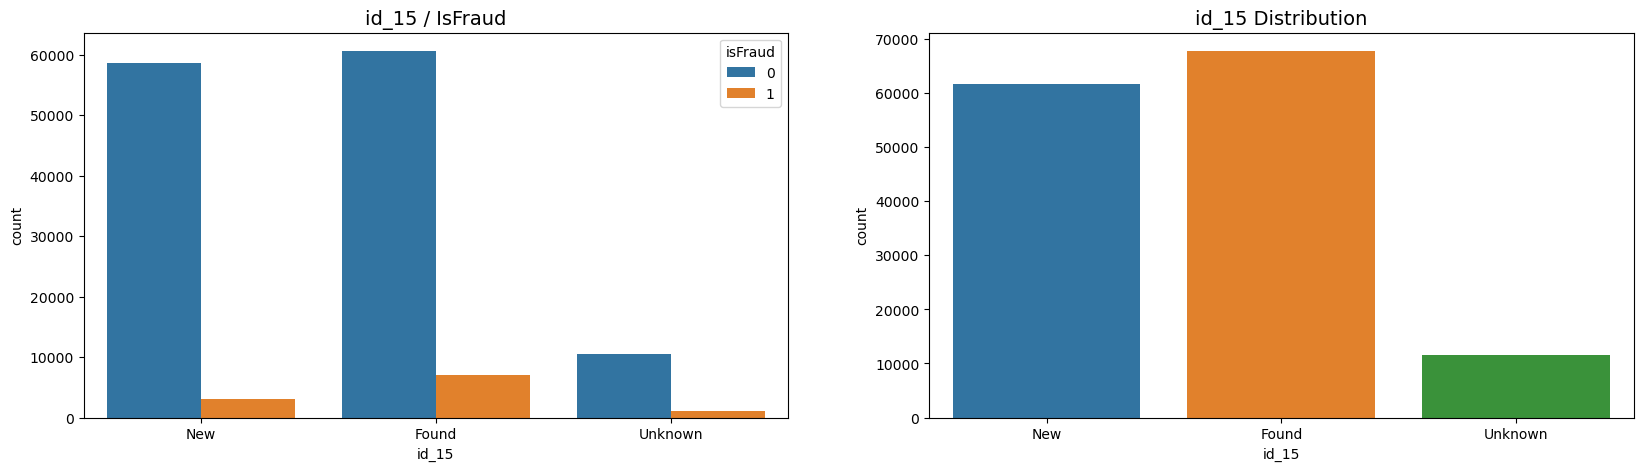

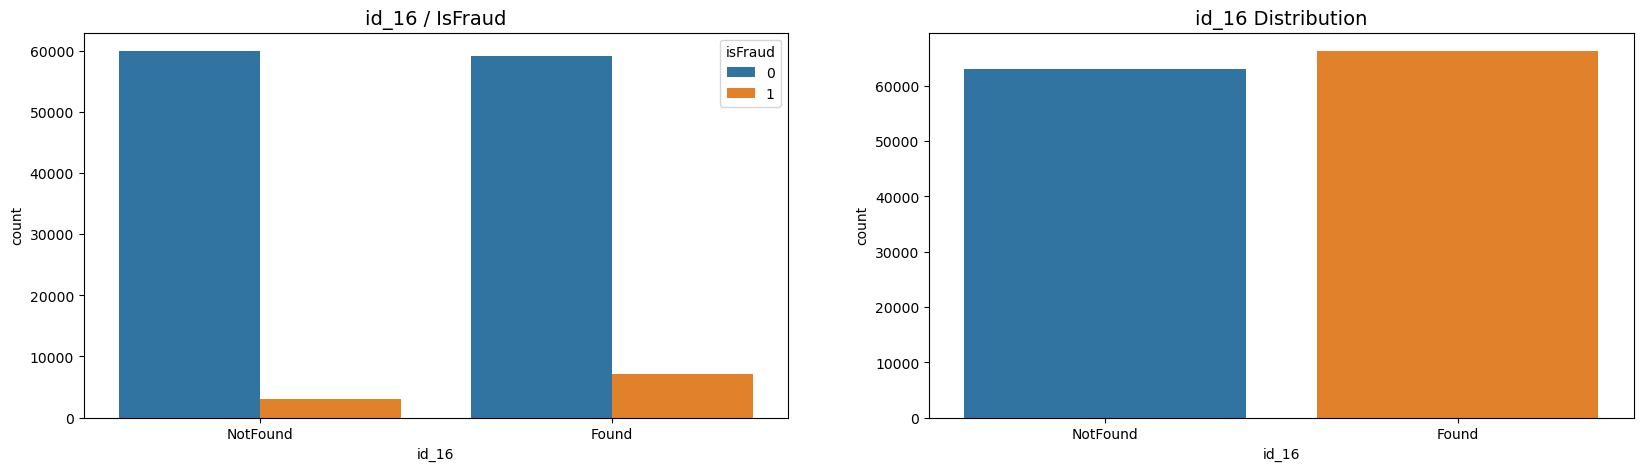

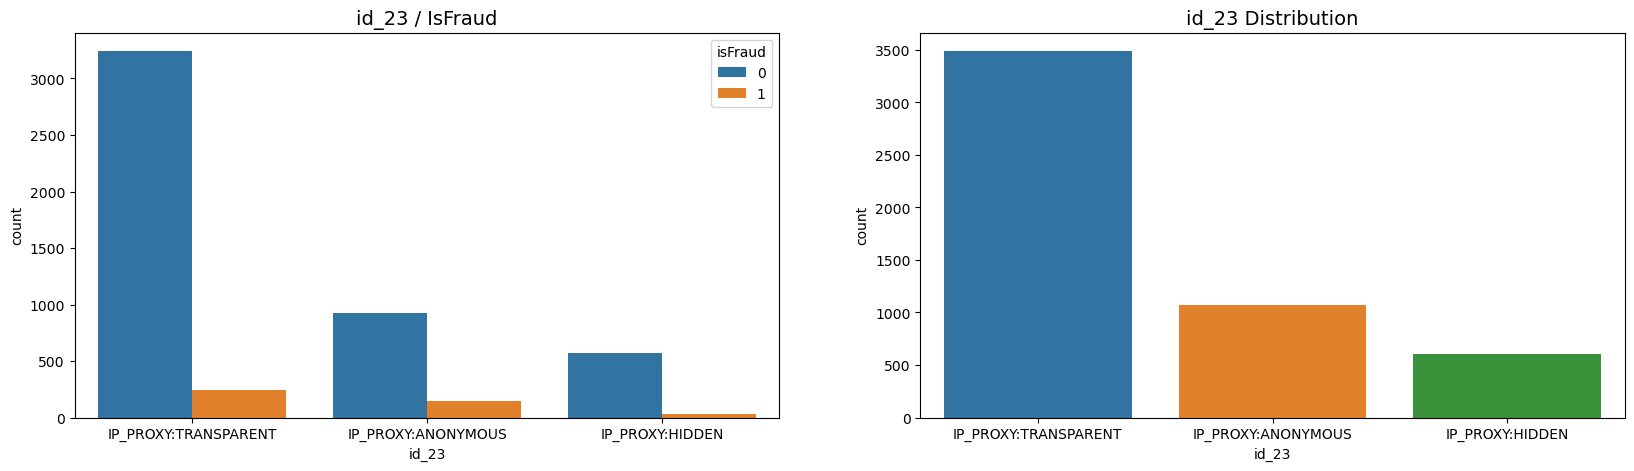

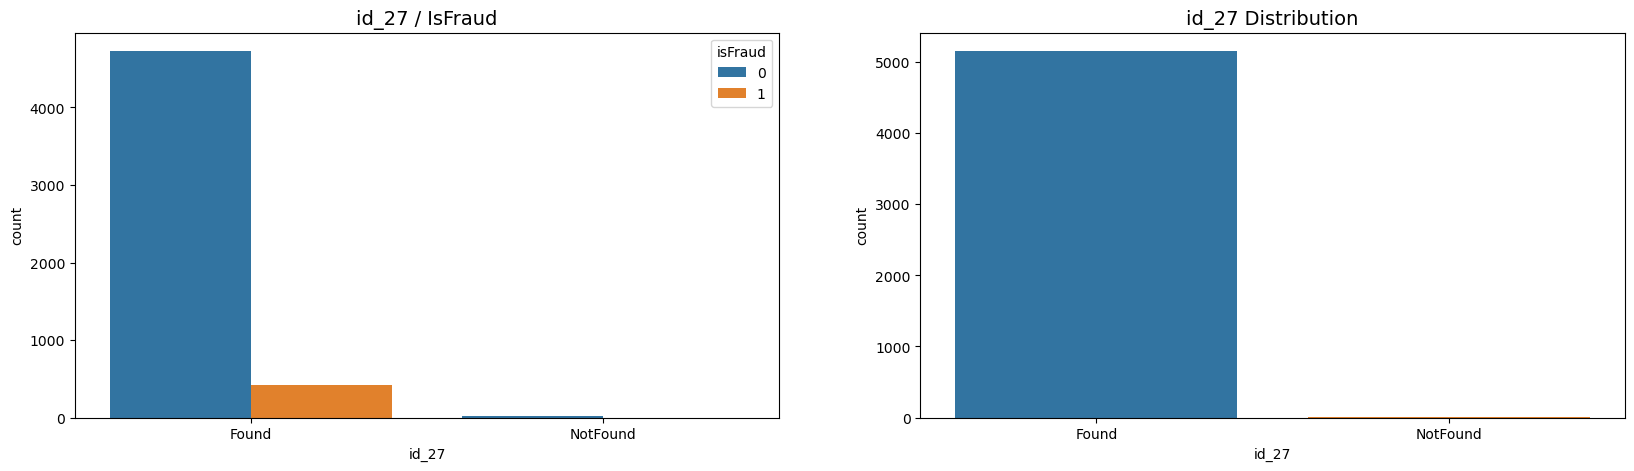

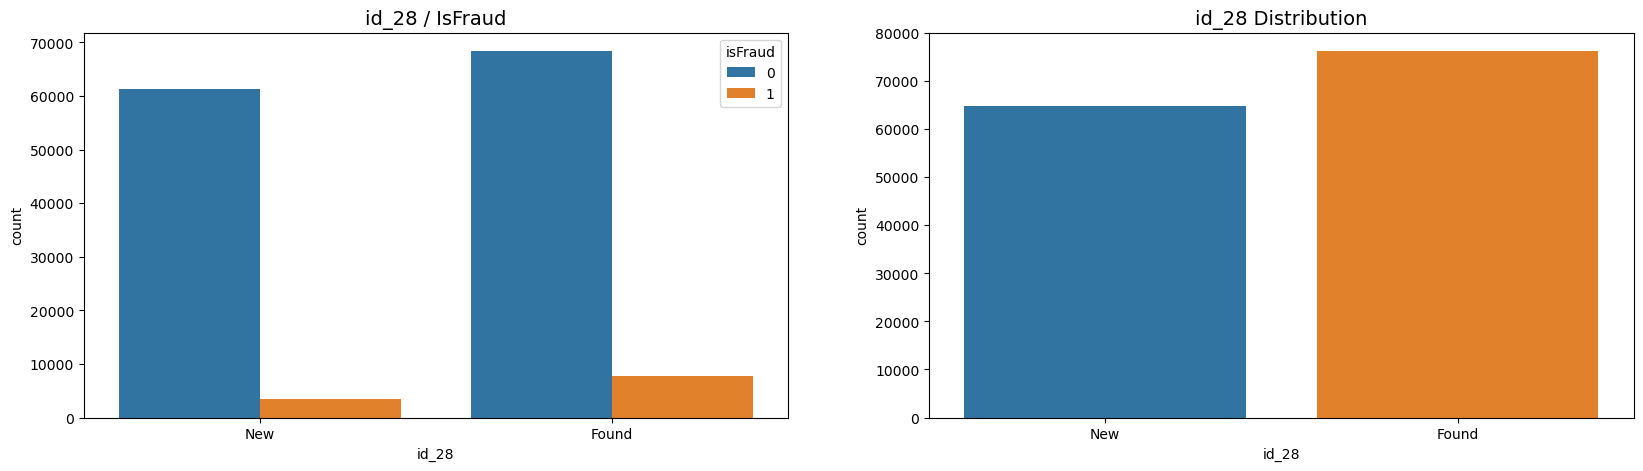

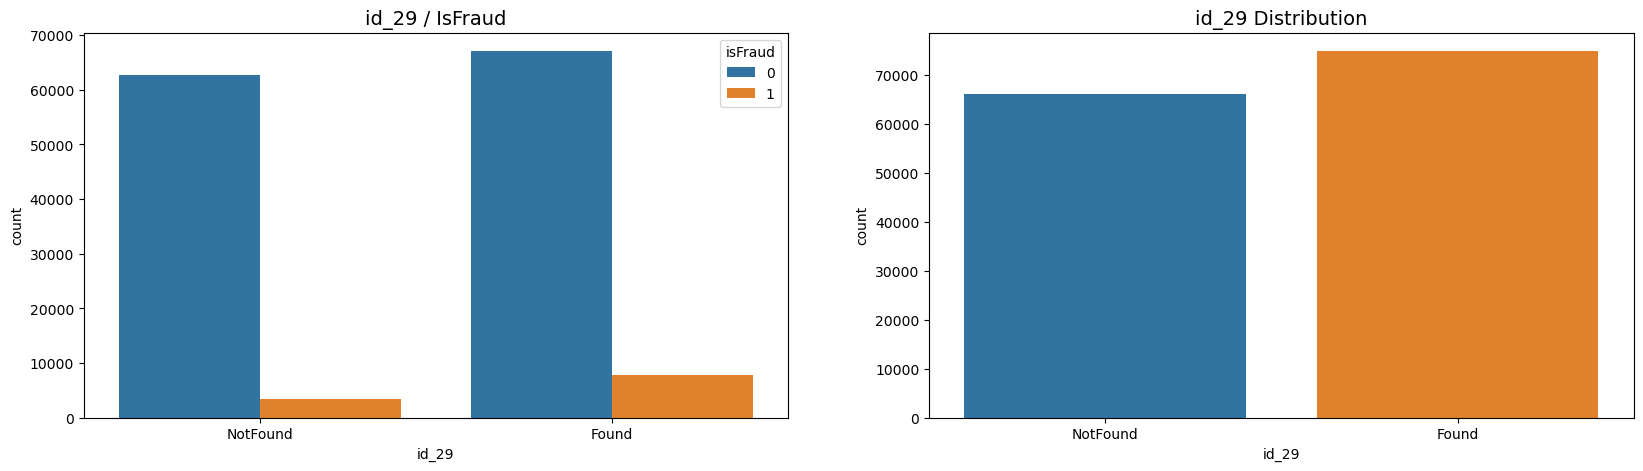

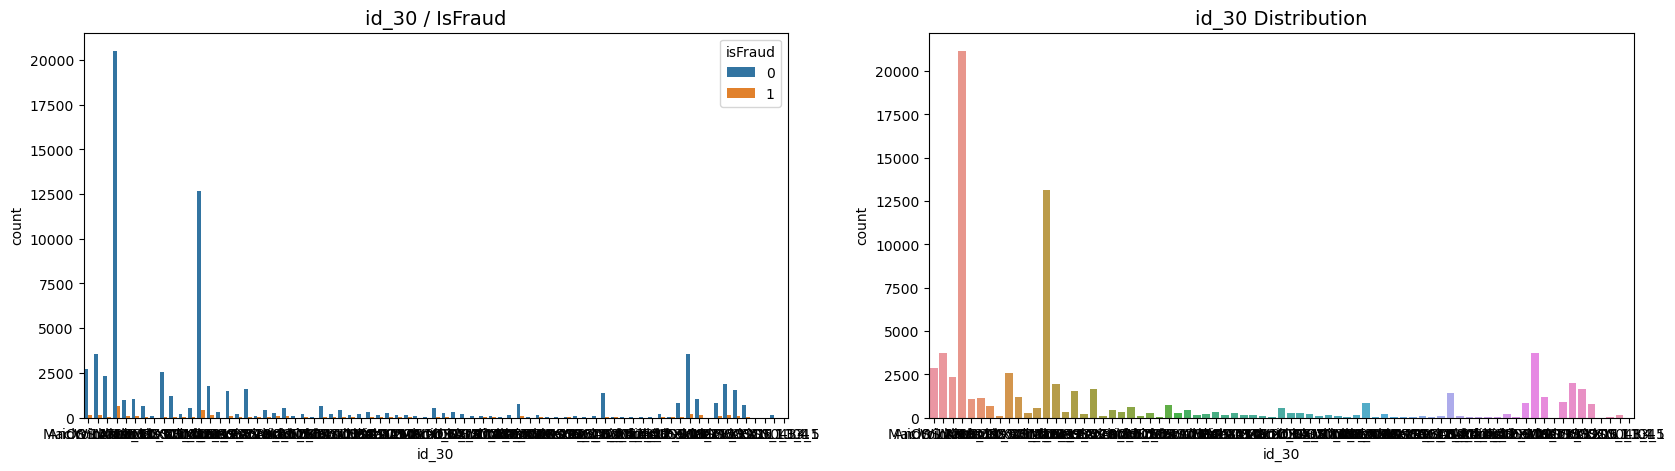

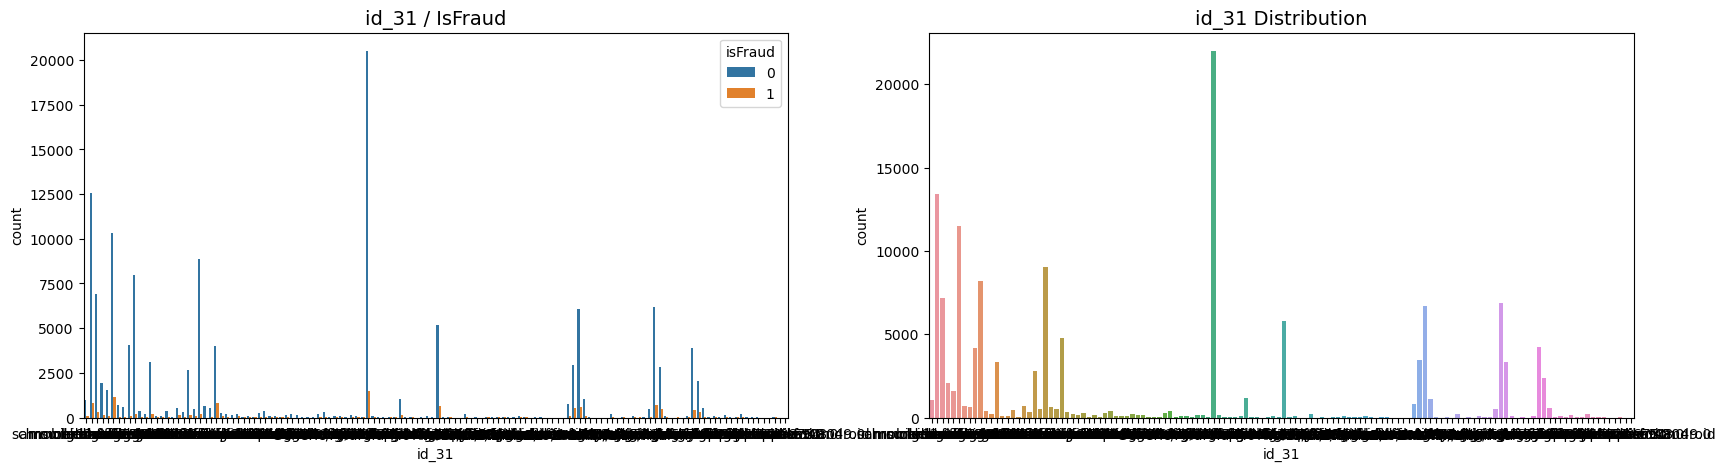

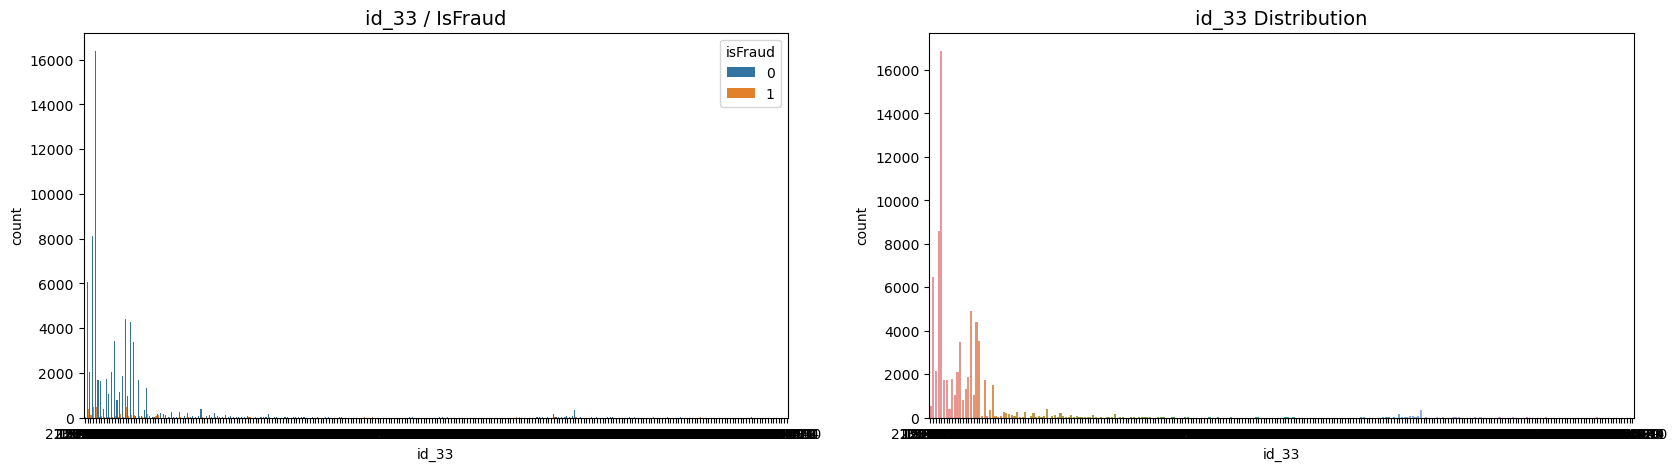

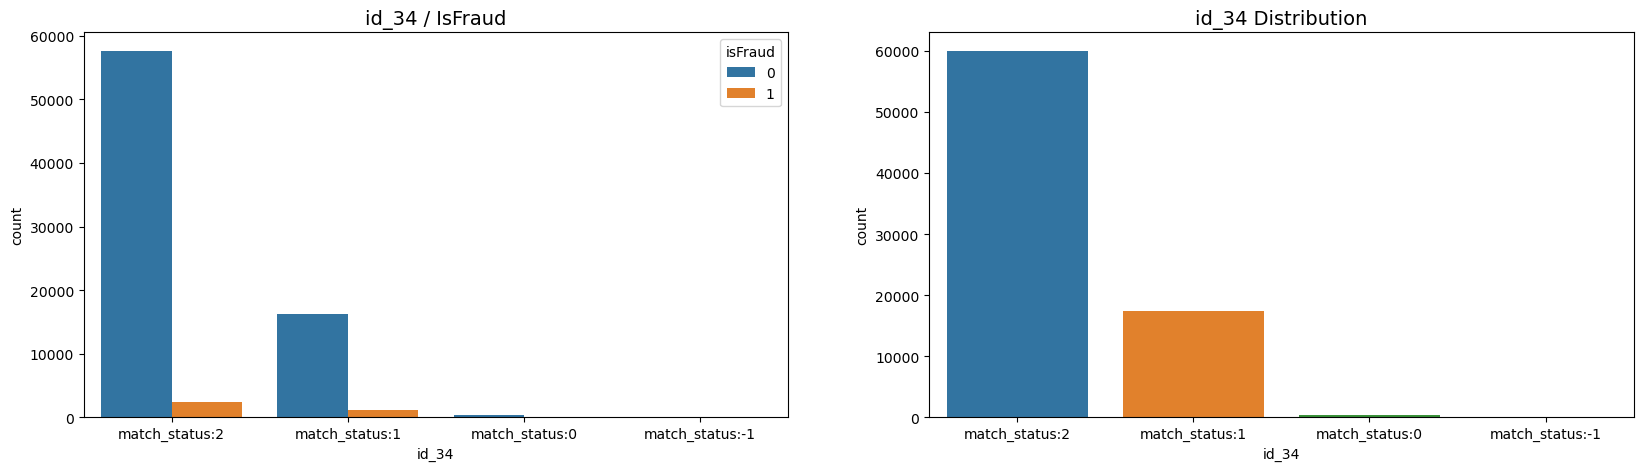

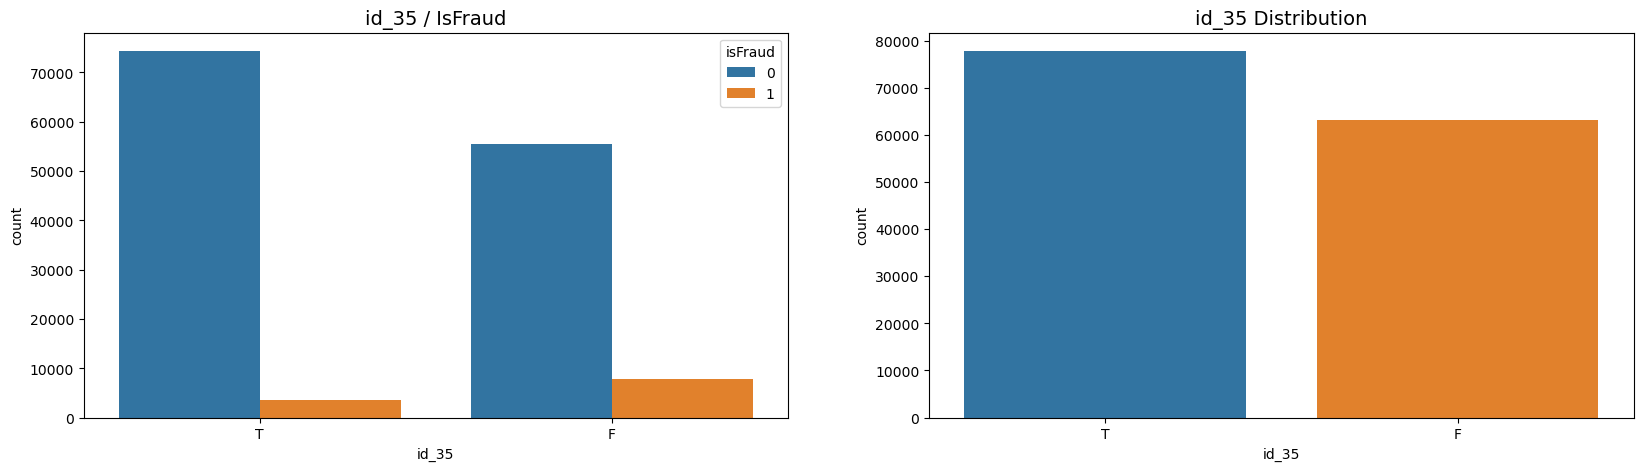

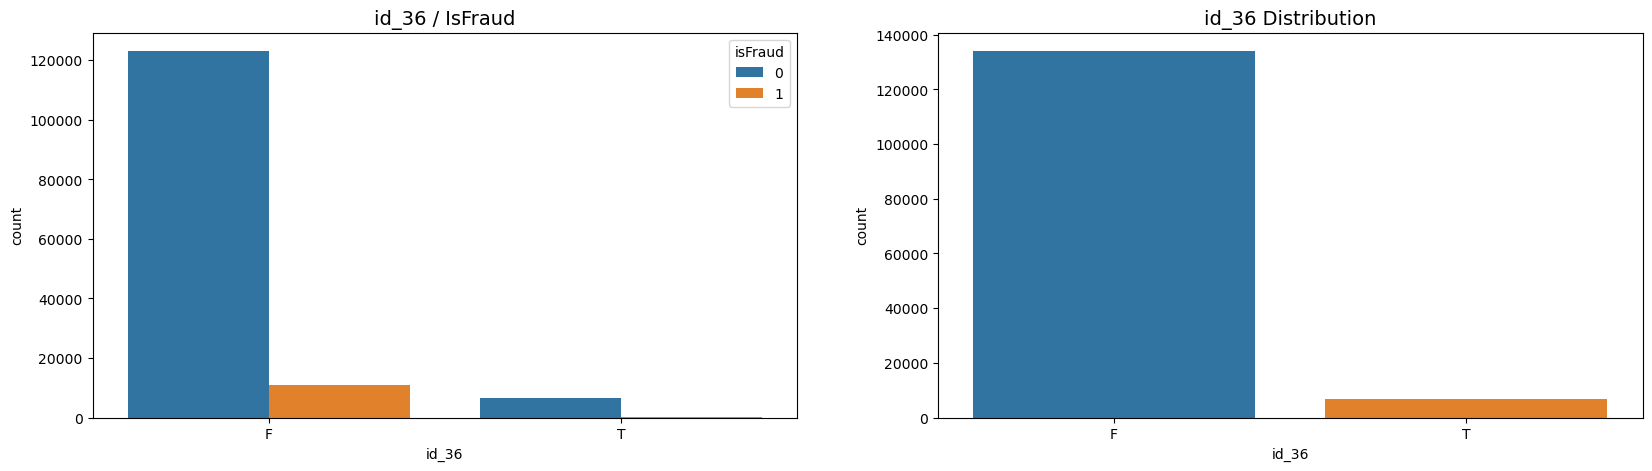

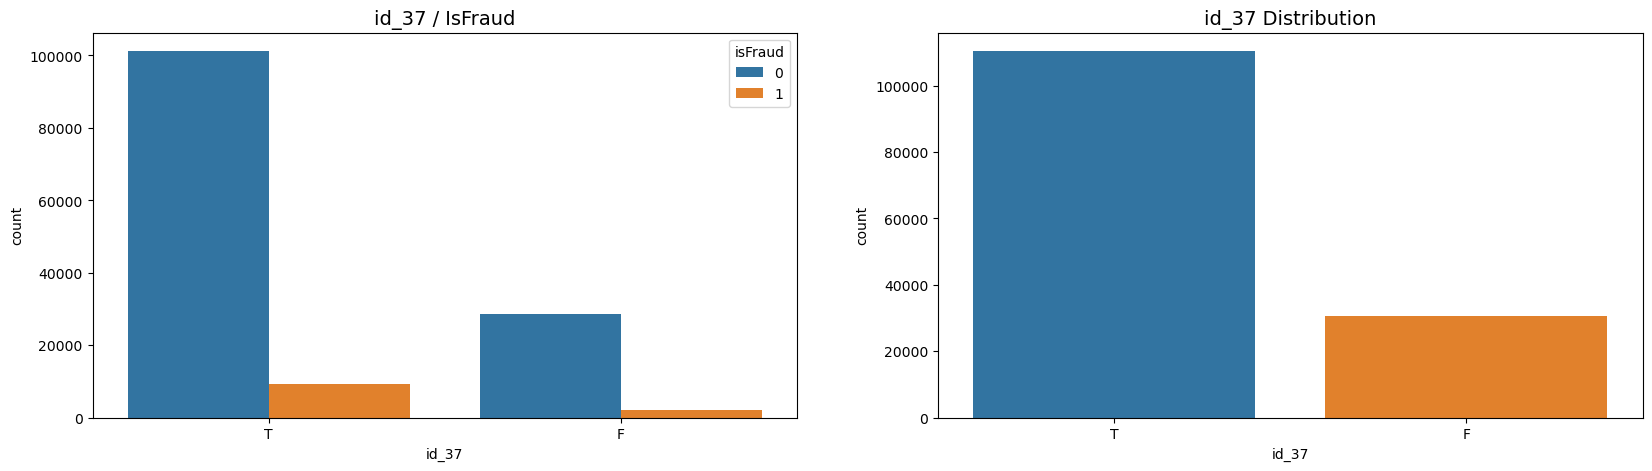

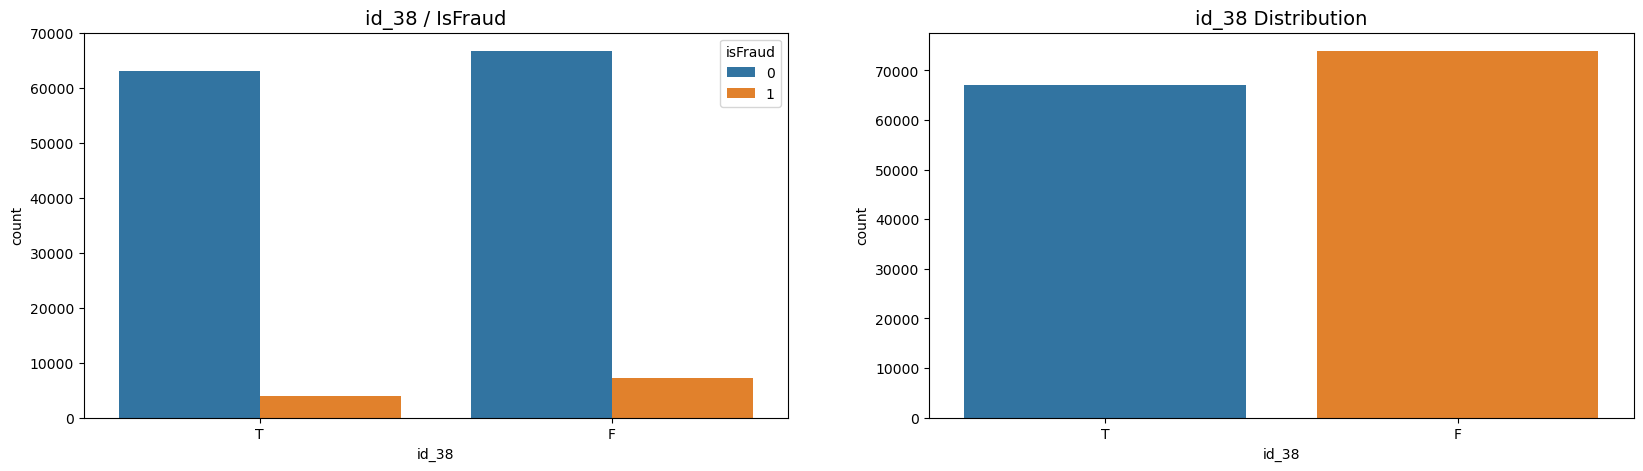

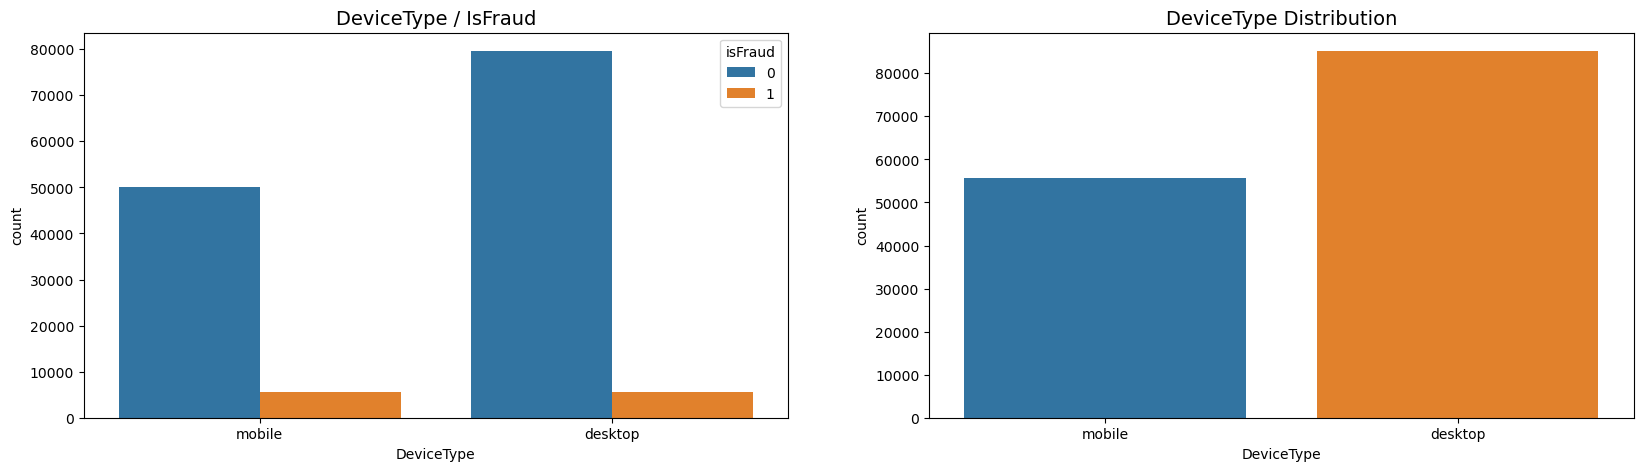

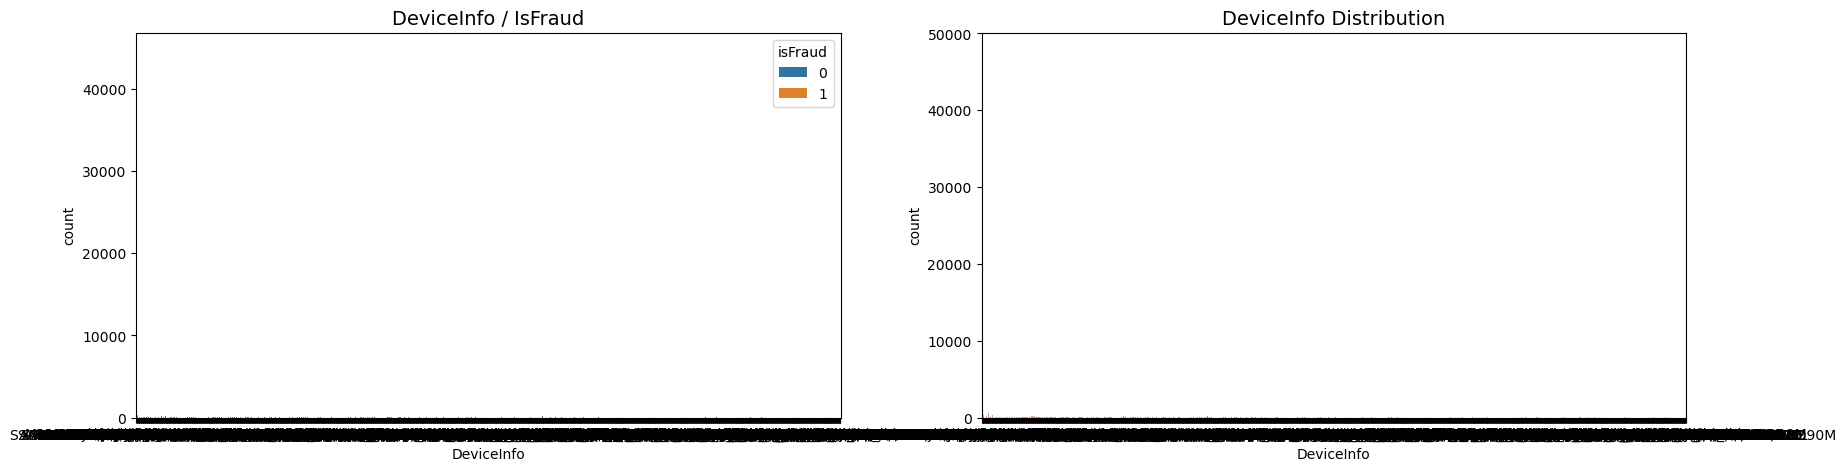

In [51]:

for i in object_col :
  # Create subplots
  fig, ax = plt.subplots(1, 2, figsize=(20, 5))

  # Countplot with hue
  sns.countplot(x=i, ax=ax[0], hue="isFraud", data=train_trans1)
  ax[0].set_title(i+' / IsFraud', fontsize=14)

  # Countplot without hue
  sns.countplot(x=i, ax=ax[1], data=train_trans1)
  ax[1].set_title(i+' Distribution', fontsize=14)

  plt.show()

Text(0, 0.5, 'Transaction Values')

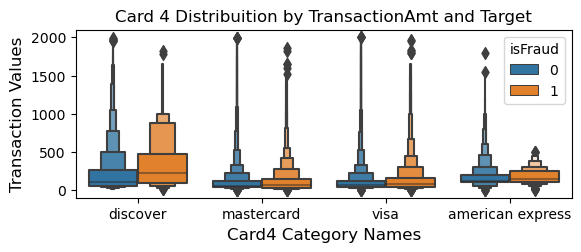

In [52]:
plt.subplot(212)
g2 = sns.boxenplot(x='card4', y='TransactionAmt', hue='isFraud', 
              data=train_trans[train_trans['TransactionAmt'] <= 2000] )
g2.set_title("Card 4 Distribuition by TransactionAmt and Target", fontsize=12)
g2.set_xlabel("Card4 Category Names", fontsize=12)
g2.set_ylabel("Transaction Values", fontsize=12)

Fraud Patterns Across Card Types:

For "discover" cards, fraudulent transactions have a higher median transaction amount compared to non-fraudulent transactions, indicating a tendency for higher transaction values in fraudulent cases for this card type.

For "mastercard" and "visa", the median transaction amounts for fraud and non-fraud are closer, but fraudulent transactions still show slightly higher values.

For "american express", fraudulent transactions are clustered around lower transaction amounts than in other card types.

Outliers:

There are numerous outliers (individual points) above the box plots for each card type, indicating some very high-value transactions, especially in non-fraudulent transactions.
Fraudulent transactions tend to have fewer extreme high-value outliers compared to non-fraudulent transactions.

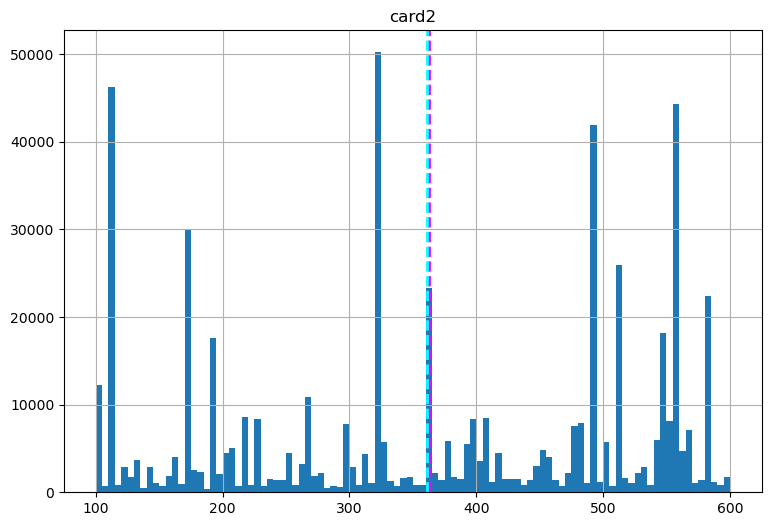

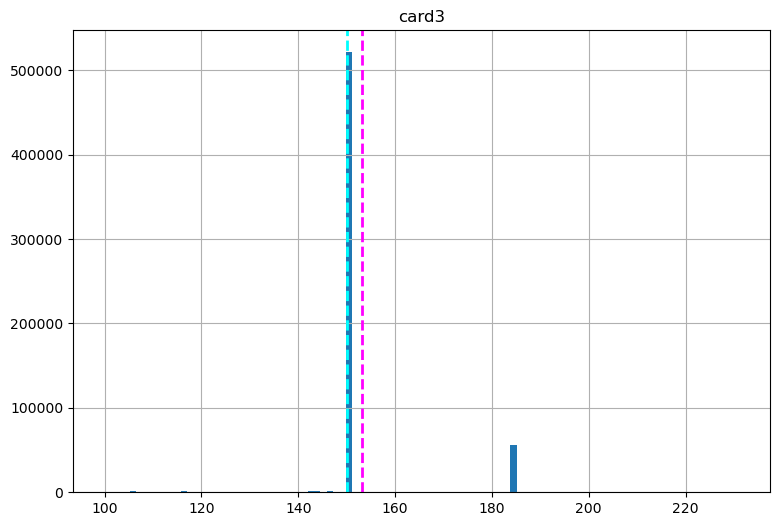

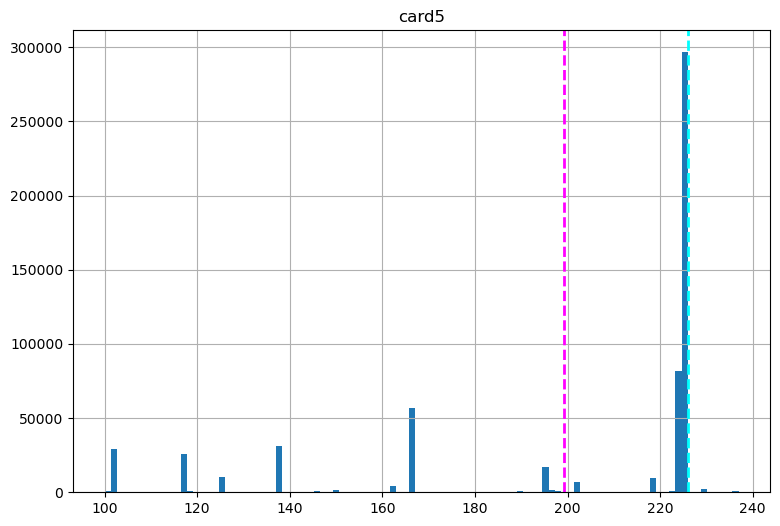

In [53]:
cards = ['card2', 'card3', 'card5']

for col in cards:
    fig = plt.figure(figsize = (9,6))
    ax = fig.gca()
    feature = train_trans[col]
    feature.hist(bins = 100, ax=ax)
    ax.axvline(feature.mean(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
    ax.axvline(feature.median(), color= 'cyan', linestyle = 'dashed', linewidth = 2)
    ax.set_title(col)
plt.show()

Correlation between cards features and IsFraud

Correlations with target feature:
card2    0.003388
card3    0.154151
card5   -0.033580
Name: isFraud, dtype: float64


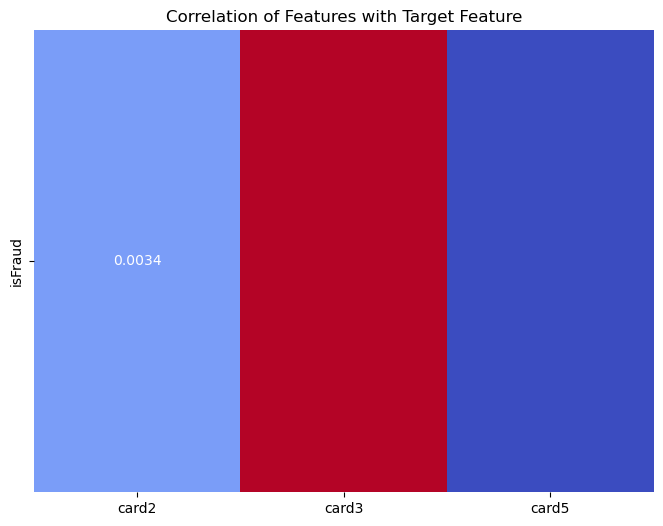

In [54]:

target = 'isFraud'

# Calculate correlations
correlations = train_trans[cards + [target]].corr()[target].drop(target)

# Print correlations as a matrix or an array
print("Correlations with target feature:")
print(correlations)

plt.figure(figsize=(8, 6))
sns.heatmap(correlations.to_frame().T, annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlation of Features with Target Feature")
plt.show()


In [55]:
print(float_col)

['TransactionAmt', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', '

In [56]:
float_col.remove('TransactionAmt')
float_col.remove('card2')
float_col.remove('card3')
float_col.remove('card5')

addr2 and addr1 features

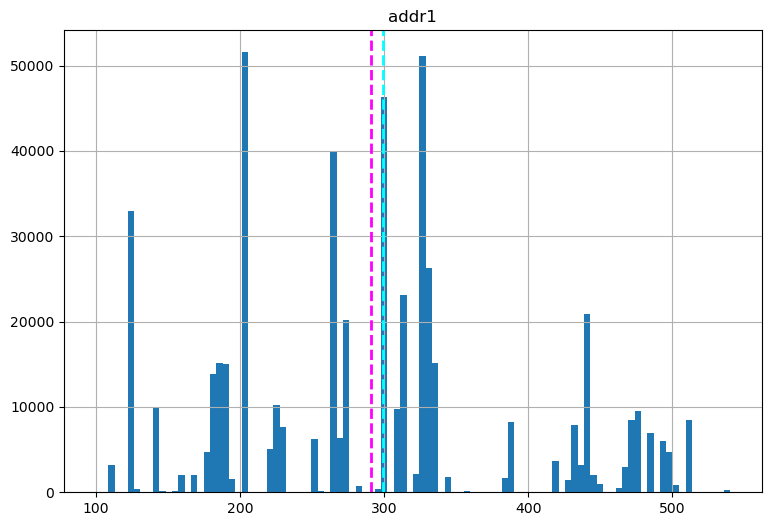

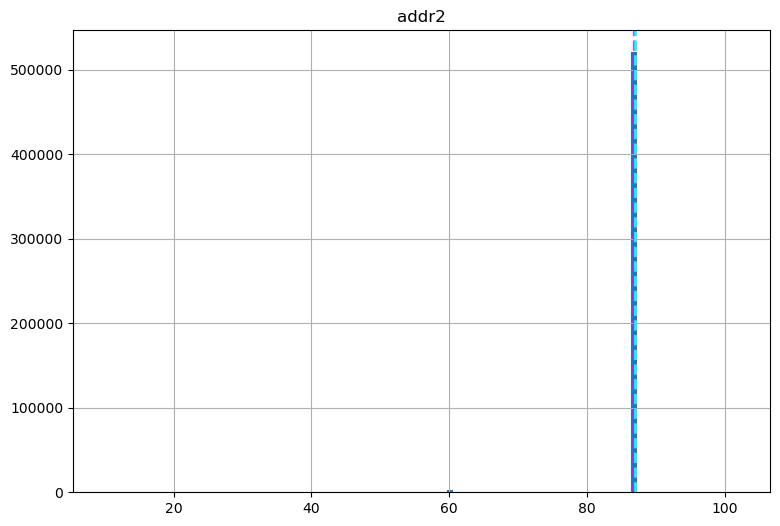

In [57]:
addrs = ['addr1', 'addr2']

for col in addrs:
    fig = plt.figure(figsize = (9,6))
    ax = fig.gca()
    feature = train_trans[col]
    feature.hist(bins = 100, ax=ax)
    ax.axvline(feature.mean(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
    ax.axvline(feature.median(), color= 'cyan', linestyle = 'dashed', linewidth = 2)
    ax.set_title(col)
plt.show()

In [58]:
print("Card Features Quantiles: ")
print(train_trans[['addr1', 'addr2']].quantile([0.01, 0.025, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975, 0.99]))

Card Features Quantiles: 
       addr1  addr2
0.010  123.0   87.0
0.025  123.0   87.0
0.100  177.0   87.0
0.250  204.0   87.0
0.500  299.0   87.0
0.750  330.0   87.0
0.900  441.0   87.0
0.975  498.0   87.0
0.990  512.0   87.0


Correlation of adresse features with the target feature

Correlations with target feature:
addr1    0.005596
addr2   -0.030387
Name: isFraud, dtype: float64


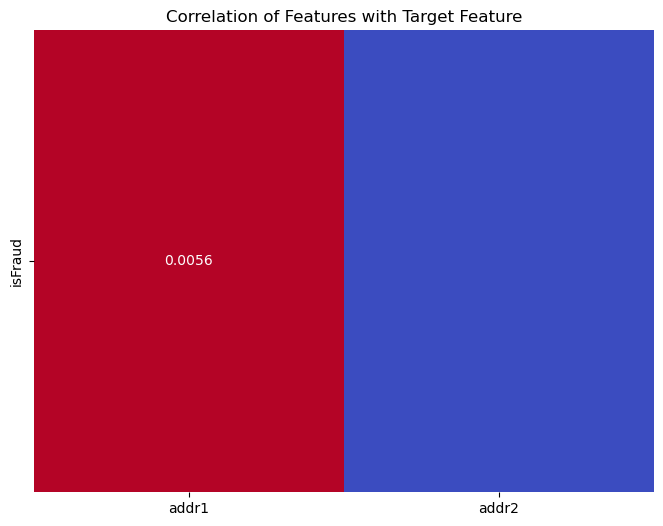

In [59]:
# Calculate correlations
correlations = train_trans[addrs + [target]].corr()[target].drop(target)

# Print correlations as a matrix or an array
print("Correlations with target feature:")
print(correlations)

plt.figure(figsize=(8, 6))
sns.heatmap(correlations.to_frame().T, annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlation of Features with Target Feature")
plt.show()

In [60]:
float_col.remove('addr1')
float_col.remove('addr2')

dist1 and dist2 features

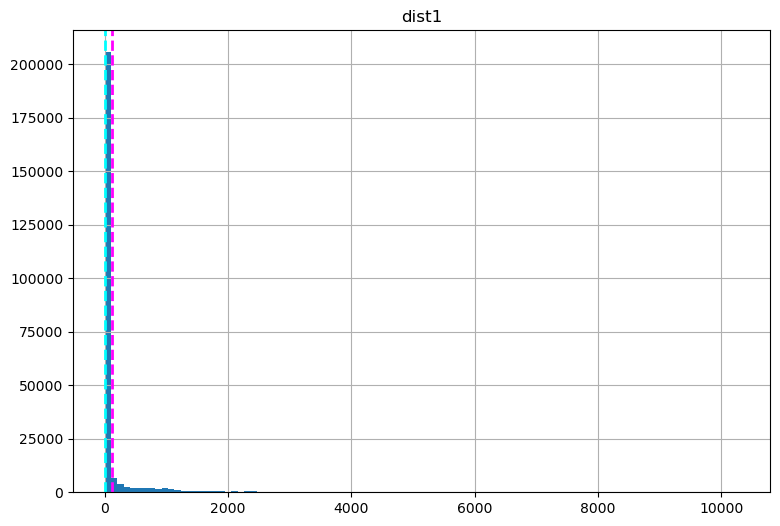

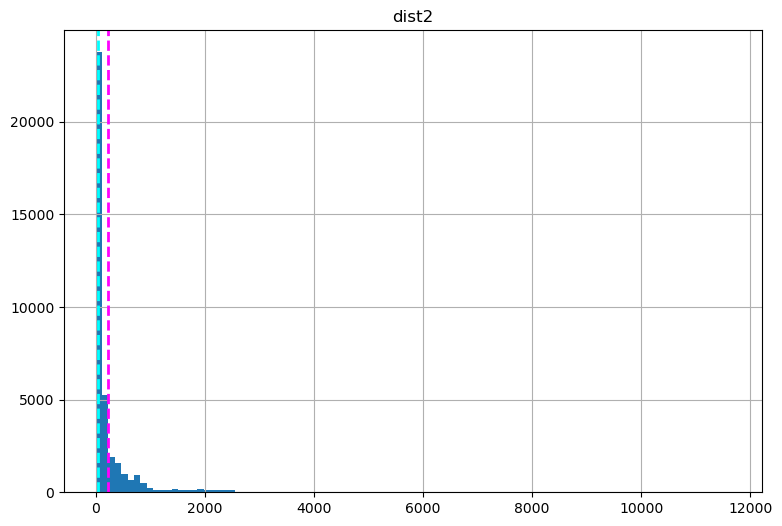

In [61]:
dists = ['dist1', 'dist2']

for col in dists:
    fig = plt.figure(figsize = (9,6))
    ax = fig.gca()
    feature = train_trans[col]
    feature.hist(bins = 100, ax=ax)
    ax.axvline(feature.mean(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
    ax.axvline(feature.median(), color= 'cyan', linestyle = 'dashed', linewidth = 2)
    ax.set_title(col)
plt.show()

dist1 and dist2 correlations with isFraud feature (target)

Correlations with target feature:
dist1    0.021522
dist2   -0.019054
Name: isFraud, dtype: float64


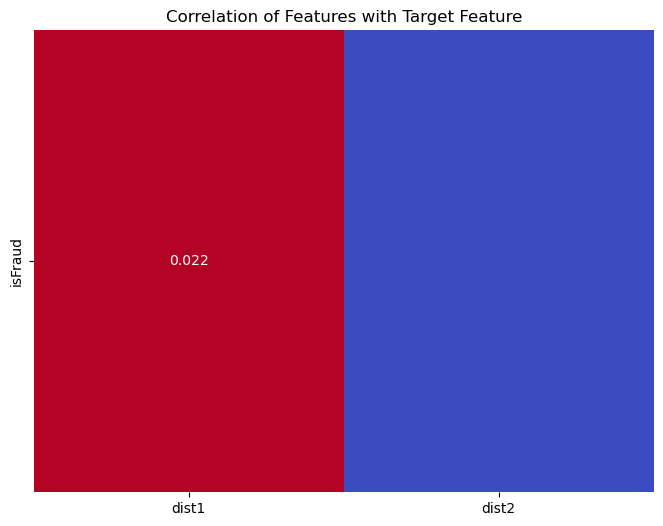

In [62]:
# Calculate correlations
correlations = train_trans[dists + [target]].corr()[target].drop(target)

# Print correlations as a matrix or an array
print("Correlations with target feature:")
print(correlations)

plt.figure(figsize=(8, 6))
sns.heatmap(correlations.to_frame().T, annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlation of Features with Target Feature")
plt.show()

In [63]:
float_col.remove('dist1')
float_col.remove('dist2')

In [64]:
print(float_col)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V

C1-C14 features

<Figure size 1000x700 with 0 Axes>

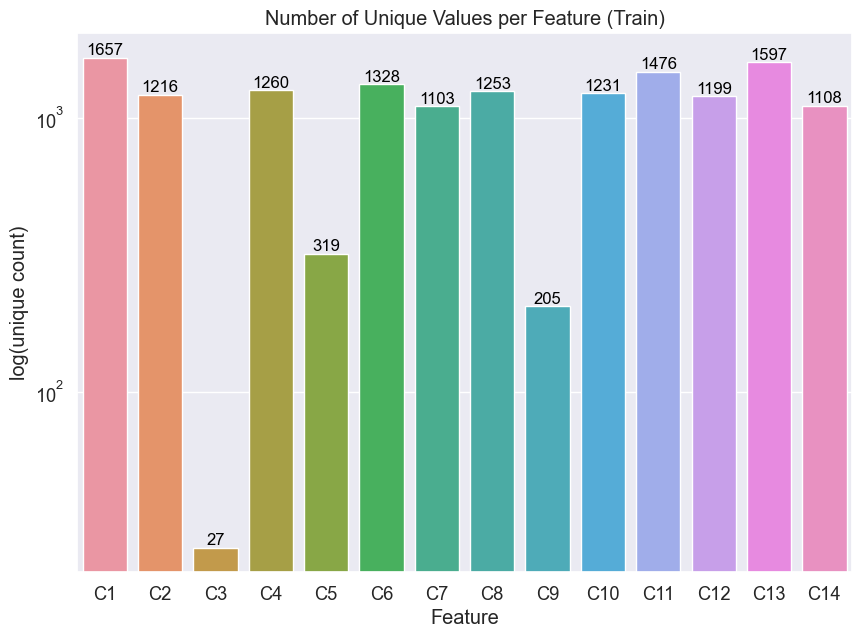

In [65]:
plt.figure(figsize=(10, 7))
c_features = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']
uniques = [len(train_trans[col].unique()) for col in c_features]

sns.set(font_scale=1.2)
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=c_features, y=uniques, log=True)  # Specify x and y as keyword arguments

ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of Unique Values per Feature (Train)')
for p, uniq in zip(ax.patches, uniques):
    ax.annotate(f"{uniq}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

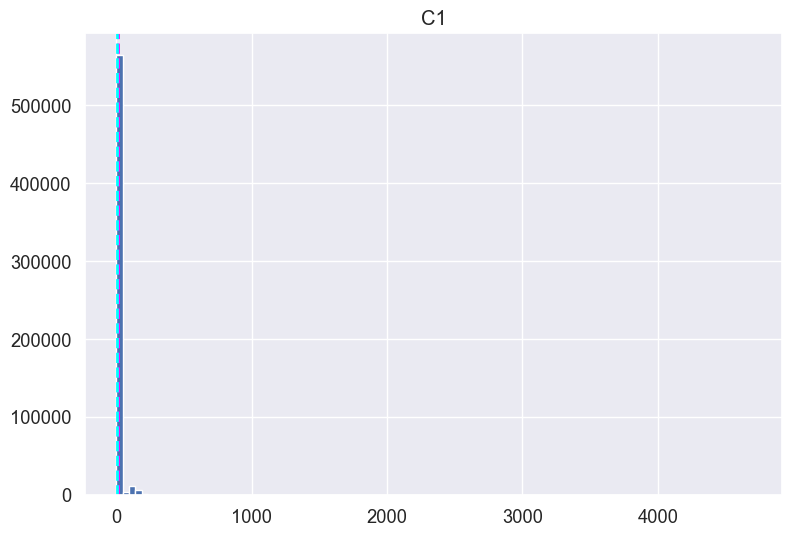

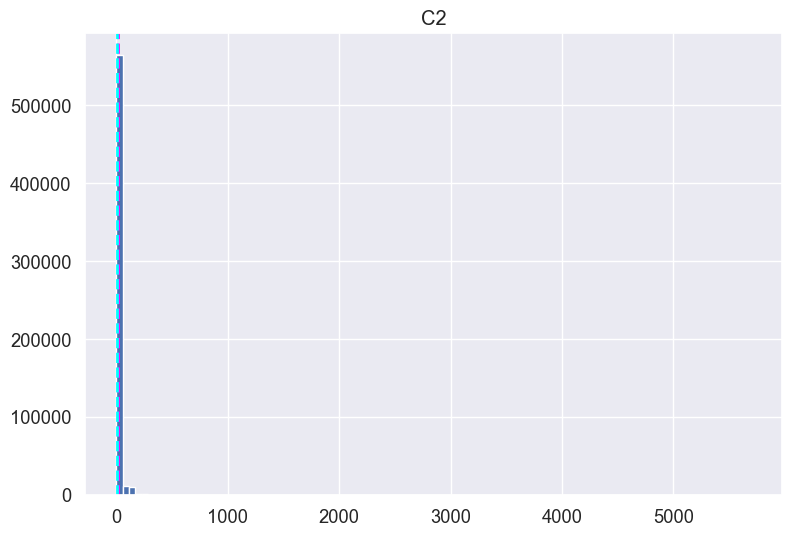

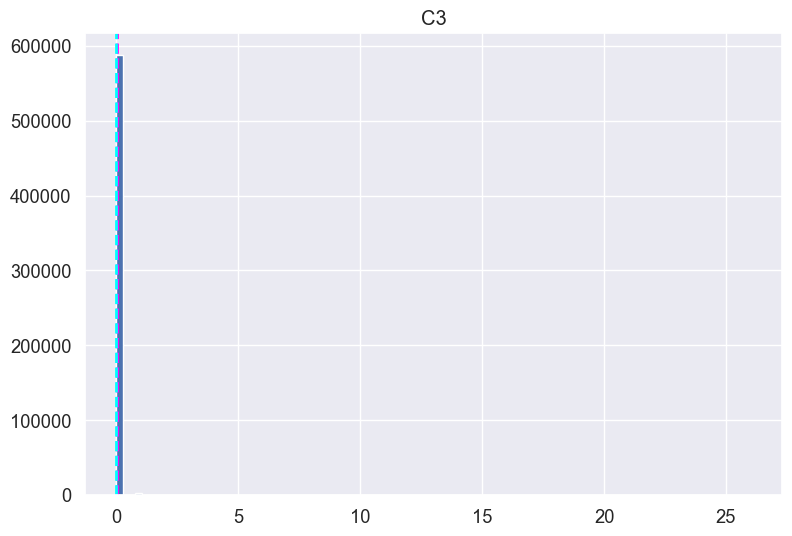

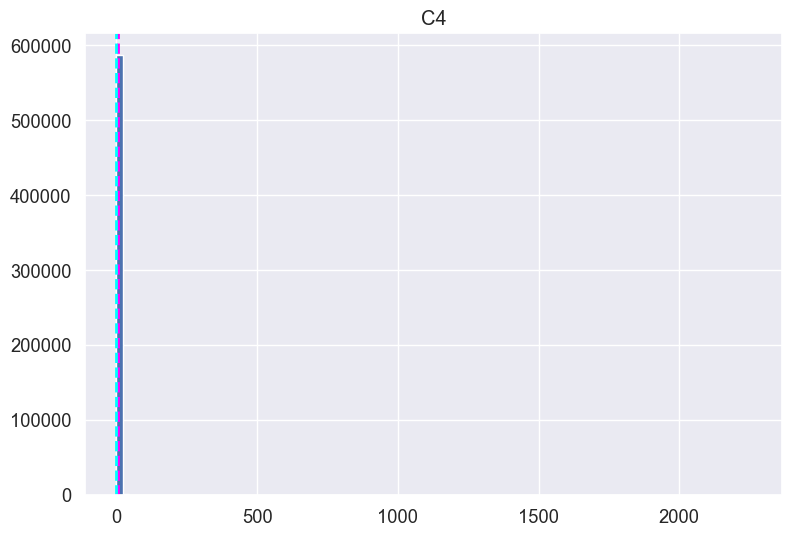

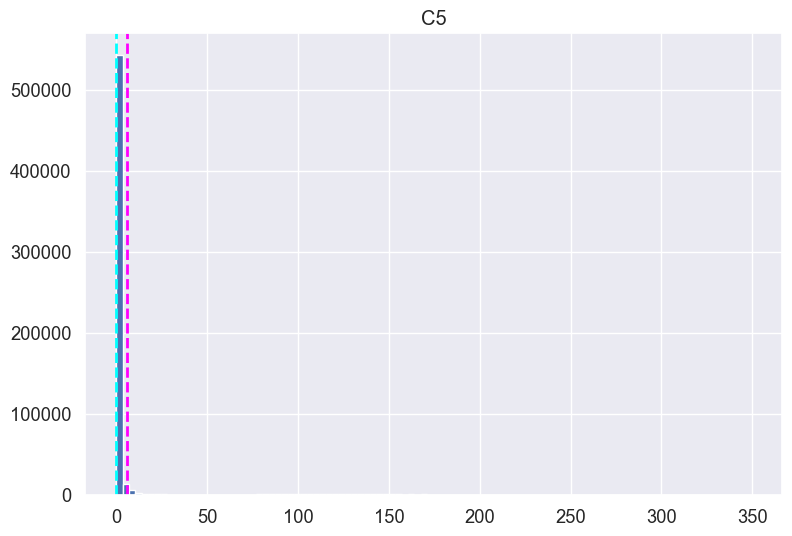

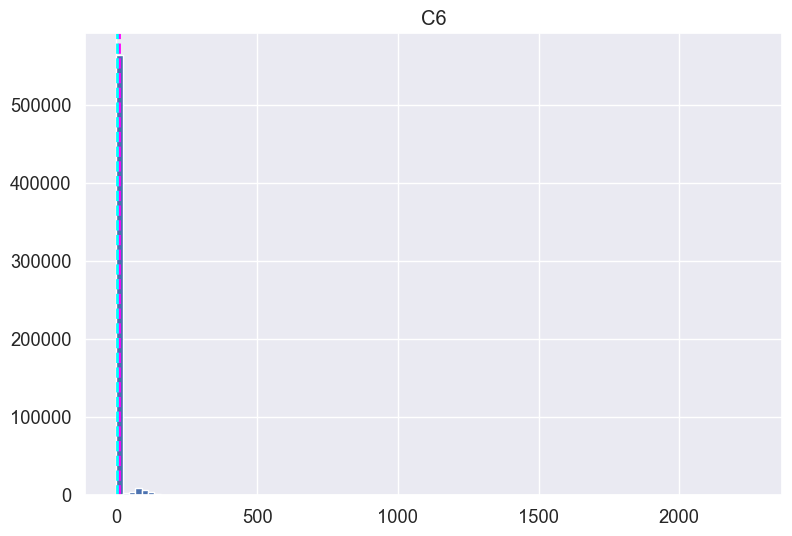

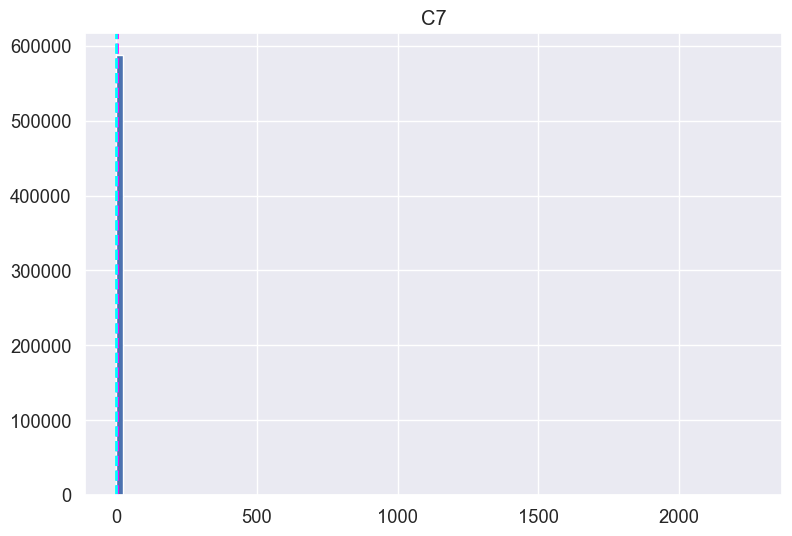

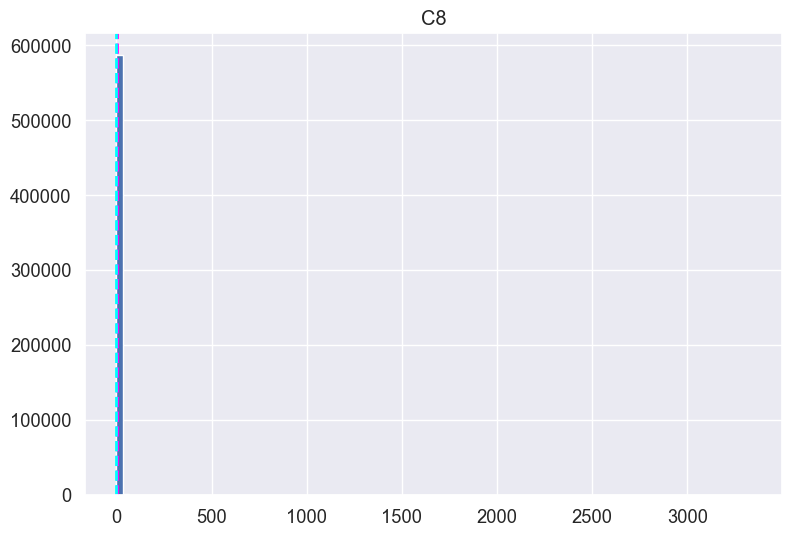

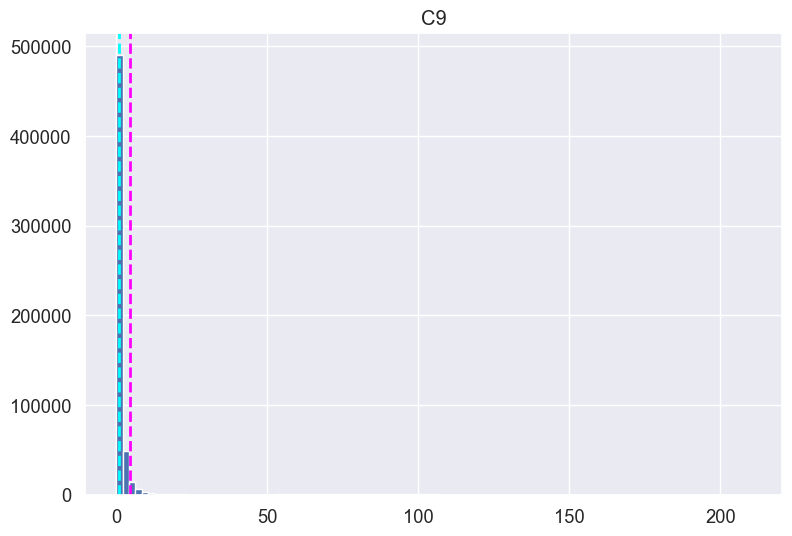

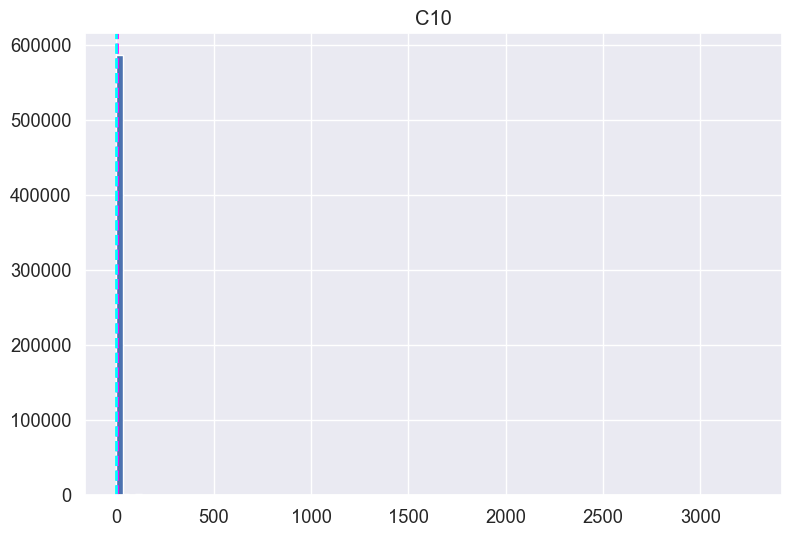

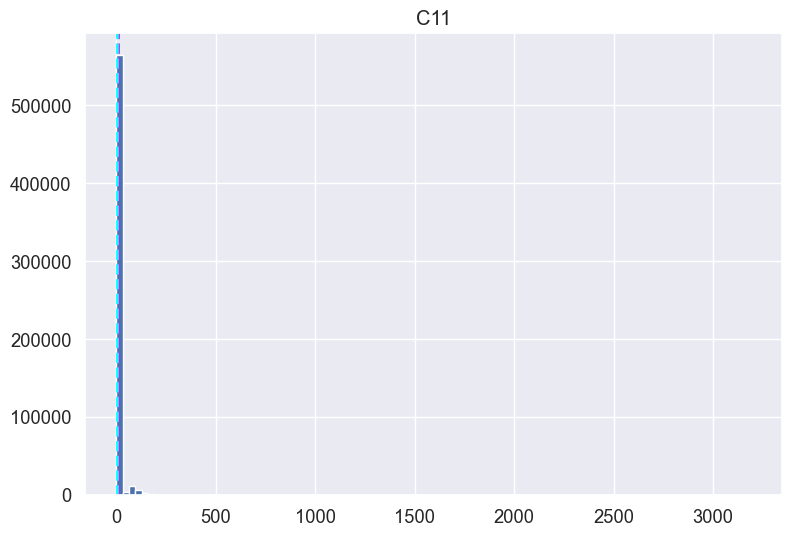

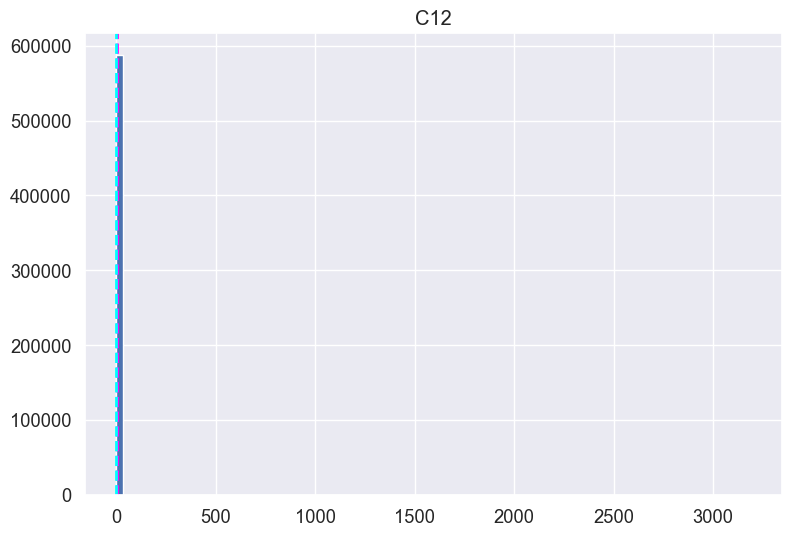

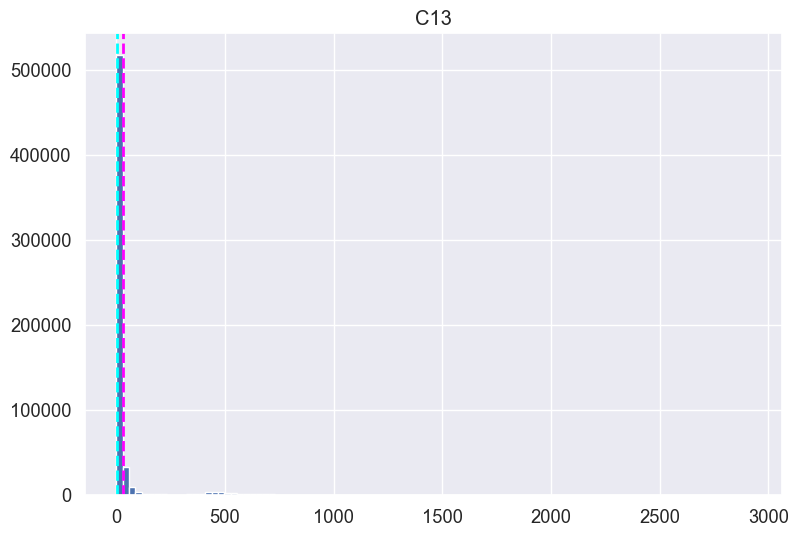

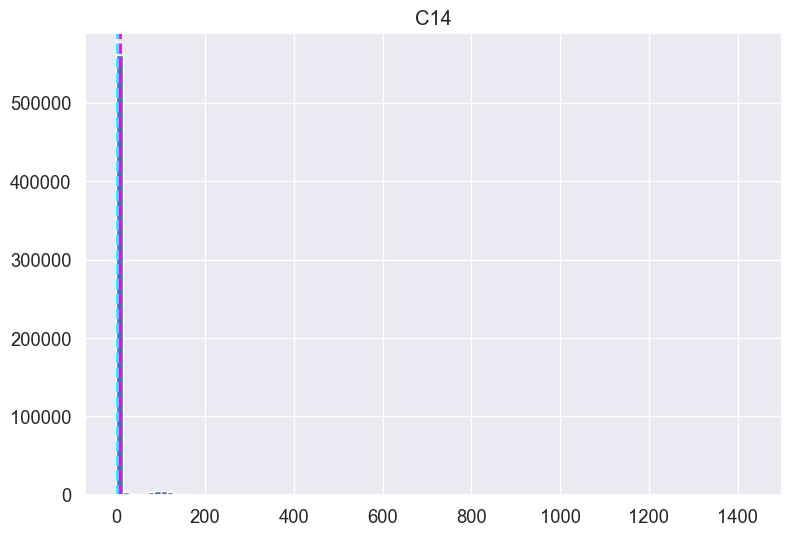

In [66]:
for col in c_features:
    fig = plt.figure(figsize = (9,6))
    ax = fig.gca()
    feature = train_trans[col]
    feature.hist(bins = 100, ax=ax)
    ax.axvline(feature.mean(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
    ax.axvline(feature.median(), color= 'cyan', linestyle = 'dashed', linewidth = 2)
    ax.set_title(col)
plt.show()

C1-C14 correlations with isFraud feature (target)

Correlations with target feature:
C1     0.030570
C2     0.037229
C3    -0.006833
C4     0.030382
C5    -0.030754
C6     0.020909
C7     0.028160
C8     0.032139
C9    -0.031703
C10    0.028396
C11    0.027484
C12    0.031905
C13   -0.011146
C14    0.007921
Name: isFraud, dtype: float64


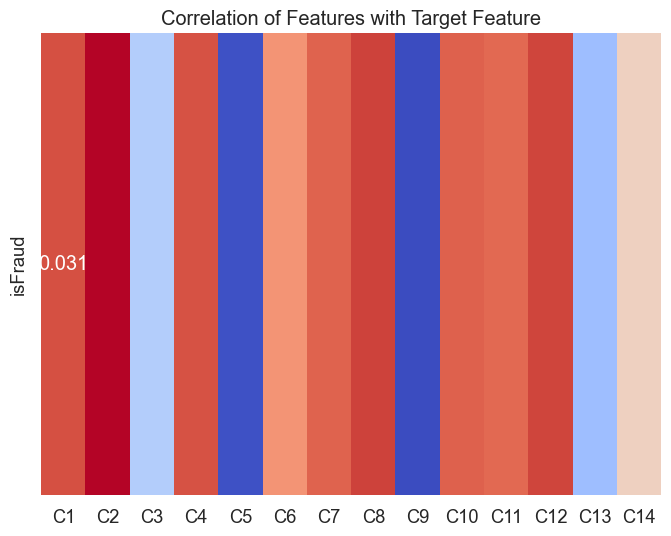

In [67]:
# Calculate correlations
correlations = train_trans[c_features + [target]].corr()[target].drop(target)

# Print correlations as a matrix or an array
print("Correlations with target feature:")
print(correlations)

plt.figure(figsize=(8, 6))
sns.heatmap(correlations.to_frame().T, annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlation of Features with Target Feature")
plt.show()

In [68]:
for i in correlations:
  if i>0.1:
    print (i)

In [69]:
for i in c_features:
  float_col.remove(i)

In [70]:
print(float_col)

['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V1

D1-D15 features

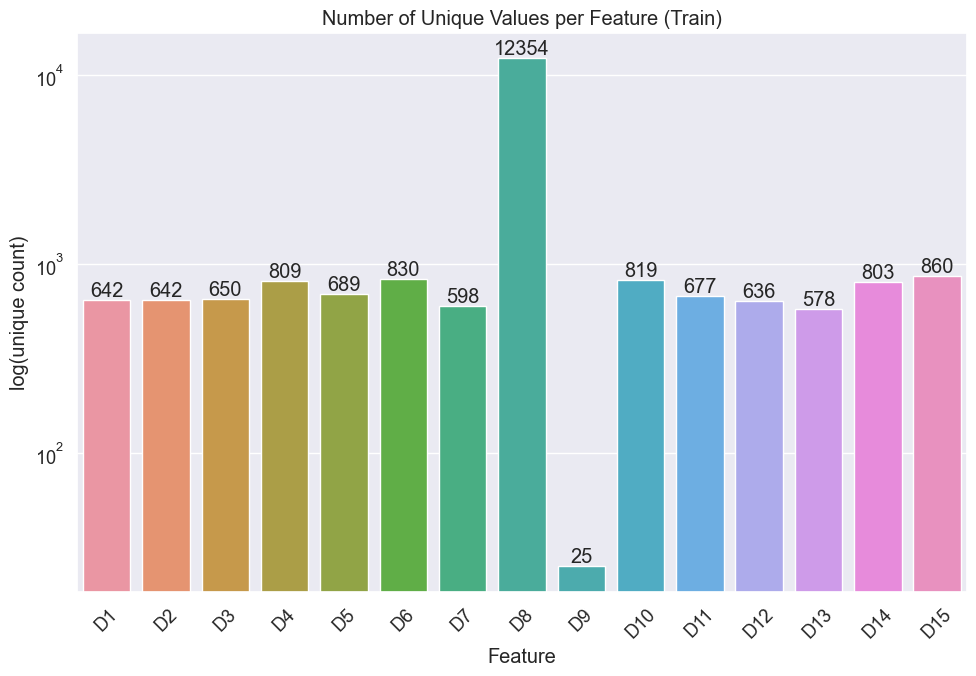

In [71]:

d_features = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15']
uniques = [len(train_trans[col].unique()) for col in d_features]
sns.set(font_scale=1.2)
# Assuming d_features is a list of feature names and uniques is the list of unique counts
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.barplot(x=d_features, y=uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of Unique Values per Feature (Train)')
for p, uniq in zip(ax.patches, uniques):
    ax.annotate(f'{uniq}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


D1-D15 correlations with isFraud feature (target)

Correlations with target feature:
D1    -0.067193
D2    -0.083583
D3    -0.046271
D4    -0.067216
D5    -0.064638
D6    -0.057236
D7    -0.127199
D8    -0.142636
D9    -0.044253
D10   -0.072002
D11   -0.045094
D12   -0.028864
D13   -0.059430
D14   -0.008663
D15   -0.077519
Name: isFraud, dtype: float64


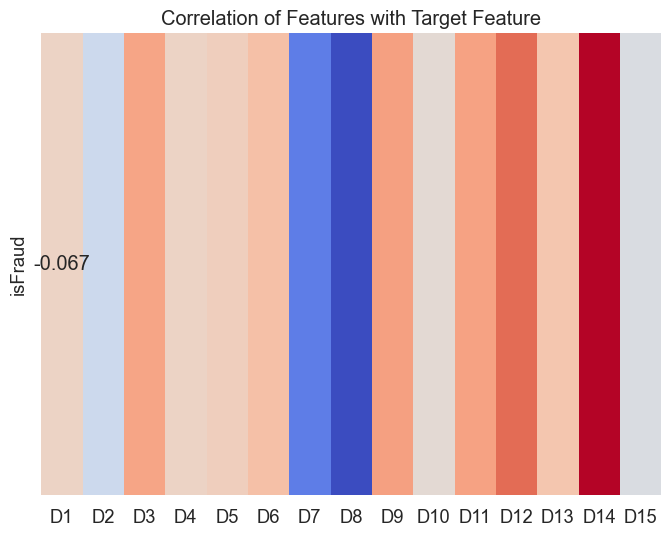

In [72]:
# Calculate correlations
correlations = train_trans[d_features + [target]].corr()[target].drop(target)

# Print correlations as a matrix or an array
print("Correlations with target feature:")
print(correlations)

plt.figure(figsize=(8, 6))
sns.heatmap(correlations.to_frame().T, annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlation of Features with Target Feature")
plt.show()

In [73]:
for i in correlations:
  if i>0.1:
    print (i)

In [74]:
for i in d_features:
  float_col.remove(i)

In [75]:
print(float_col)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V1

V1-V339 Features

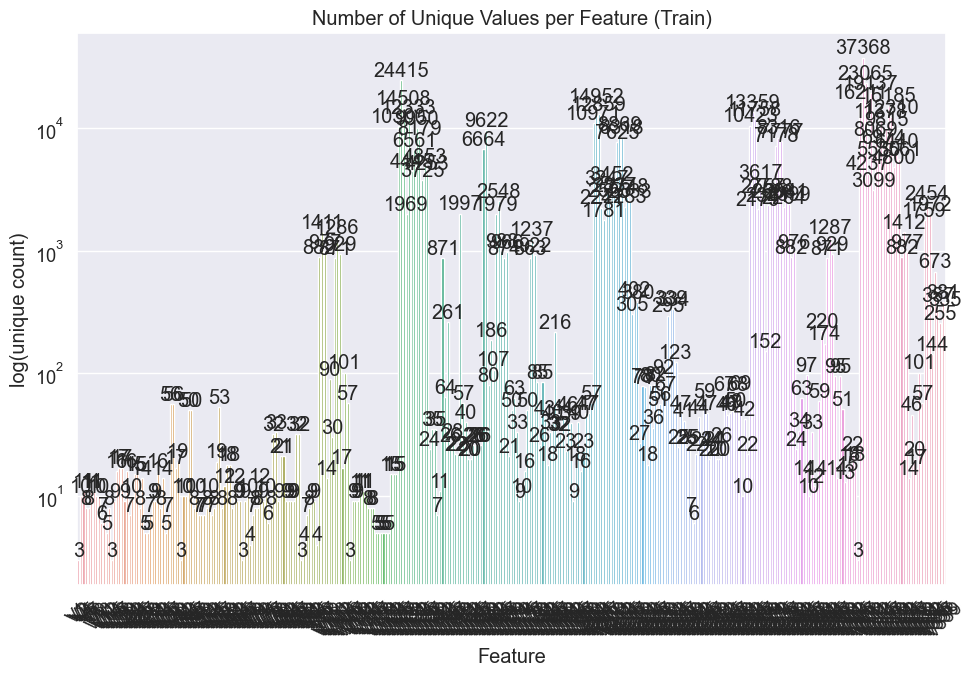

In [76]:
v_features = list(train_trans.columns[55:394])
uniques = [len(train_trans[col].unique()) for col in v_features]
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.barplot(x=v_features, y=uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of Unique Values per Feature (Train)')
for p, uniq in zip(ax.patches, uniques):
    ax.annotate(f'{uniq}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


V1-V339 correlation with target feature

Correlations with target feature:
V1      0.001045
V2      0.019872
V3      0.049257
V4      0.012611
V5      0.036904
V6      0.010552
V7      0.023492
V8      0.016041
V9      0.037915
V10    -0.074658
V11    -0.071950
V12    -0.052406
V13    -0.045706
V14     0.002145
V15     0.177963
V16     0.174318
V17     0.182673
V18     0.182550
V19     0.030904
V20     0.040341
V21     0.165985
V22     0.158814
V23     0.149408
V24     0.123824
V25     0.003826
V26     0.015929
V27    -0.004979
V28    -0.004895
V29    -0.107852
V30    -0.103088
V31     0.163166
V32     0.160197
V33     0.183486
V34     0.180301
V35    -0.077116
V36    -0.069875
V37     0.176947
V38     0.199005
V39     0.203097
V40     0.212442
V41     0.004154
V42     0.189428
V43     0.198274
V44     0.260376
V45     0.281832
V46     0.125991
V47     0.164114
V48    -0.115786
V49    -0.110920
V50     0.179953
V51     0.223191
V52     0.239469
V53    -0.047400
V54    -0.037025
V55     0.050114
V56     0.061356
V57     0.1688

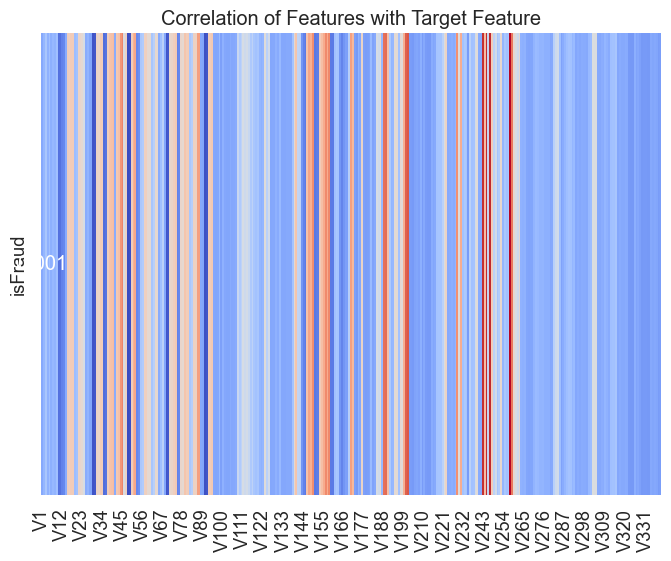

In [77]:
# Calculate correlations
correlations = train_trans[v_features + [target]].corr()[target].drop(target)

# Print correlations as a matrix or an array
print("Correlations with target feature:")
print(correlations)

plt.figure(figsize=(8, 6))
sns.heatmap(correlations.to_frame().T, annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlation of Features with Target Feature")
plt.show()

In [78]:
for i in correlations:
  if i>0.1:
    print (i)

0.1779630498131708
0.17431823036772803
0.18267262266154075
0.18254989816551212
0.16598476139524868
0.15881448337431328
0.14940777371533034
0.12382430317338758
0.16316648223856253
0.16019713121106818
0.18348618906163106
0.18030059415433494
0.17694684591219917
0.1990045102987051
0.20309652907843204
0.2124418297830187
0.18942828273161452
0.19827388575876356
0.26037616734620606
0.28183194637642134
0.12599085488591755
0.16411406343502635
0.17995328566602795
0.22319110216658025
0.23946916785411795
0.16888690850681953
0.17306531089992855
0.15106152341152862
0.15095177763742001
0.15335271668670167
0.1503707302678547
0.15684043831029348
0.16095093557360612
0.17387006465052374
0.18591509316375399
0.15838120990922333
0.15042457212509439
0.19414094448022906
0.18029947217066444
0.18237723430444466
0.16911015898484263
0.16883986941250217
0.2518279864239631
0.25173744221272076
0.18051313293680651
0.1809831566419988
0.1884070949774233
0.12160956073759893
0.10521209993223615
0.11597582692794368
0.13822

In [79]:
print(float_col)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V1

In [80]:
for i in v_features:
  if i in float_col:
    float_col.remove(i)

  

Float id features

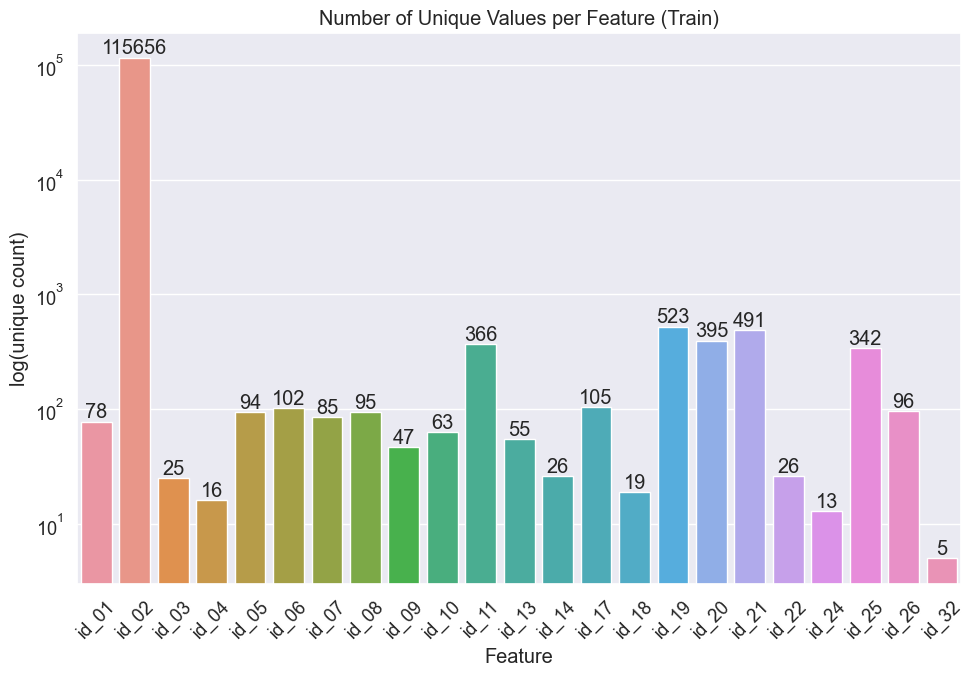

In [81]:
id_features_float=float_col
uniques = [len(train_trans[col].unique()) for col in id_features_float]
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.barplot(x=id_features_float, y=uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of Unique Values per Feature (Train)')
for p, uniq in zip(ax.patches, uniques):
    ax.annotate(f'{uniq}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Float id features correlation with target

Correlations with target feature:
id_01   -0.120099
id_02    0.049398
id_03    0.041457
id_04   -0.059701
id_05   -0.007978
id_06   -0.027139
id_07   -0.084768
id_08   -0.057489
id_09    0.029431
id_10    0.011043
id_11    0.007914
id_13   -0.019538
id_14    0.057324
id_17    0.150100
id_18    0.050004
id_19   -0.041721
id_20    0.061597
id_21    0.063544
id_22    0.118409
id_24   -0.001905
id_25    0.034045
id_26    0.099587
id_32    0.069702
Name: isFraud, dtype: float64


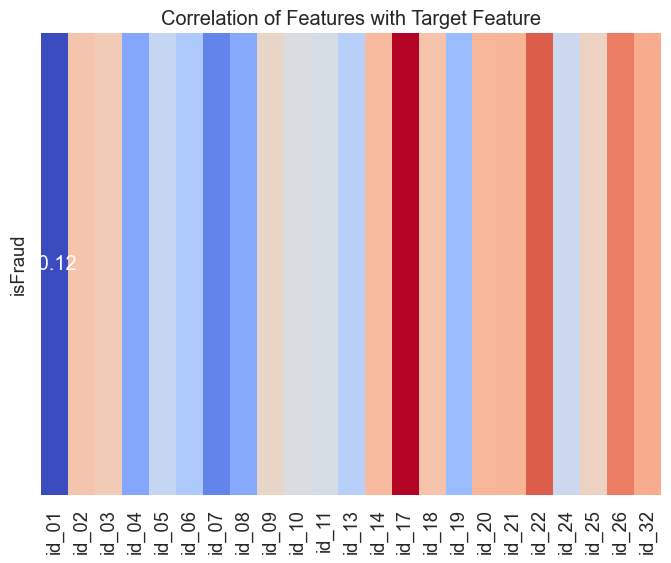

In [82]:
# Calculate correlations
correlations = train_trans[id_features_float + [target]].corr()[target].drop(target)

# Print correlations as a matrix or an array
print("Correlations with target feature:")
print(correlations)

plt.figure(figsize=(8, 6))
sns.heatmap(correlations.to_frame().T, annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlation of Features with Target Feature")
plt.show()

In [83]:
for i in correlations:
  if i>0.1:
    print (i)

0.15010045992494606
0.11840860174814628


In [84]:
print(object_col)

['card4', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


DeviceType Feature

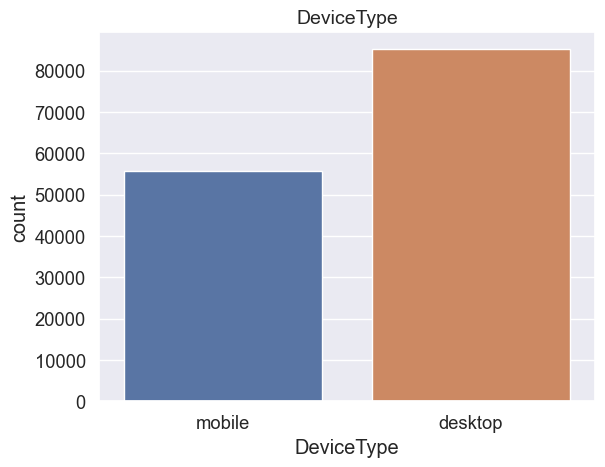

In [85]:
ax = sns.countplot(x="DeviceType", data=train_trans)
ax.set_title('DeviceType', fontsize=14)
sns.set(rc={"figure.figsize": (3,4)})
plt.show()

DeviceInfo Feature

In [86]:
print ("Unique Devices = ",train_trans['DeviceInfo'].nunique())
train_trans['DeviceInfo'].value_counts().head()

Unique Devices =  1786


Windows        47722
iOS Device     19782
MacOS          12573
Trident/7.0     7440
rv:11.0         1901
Name: DeviceInfo, dtype: int64

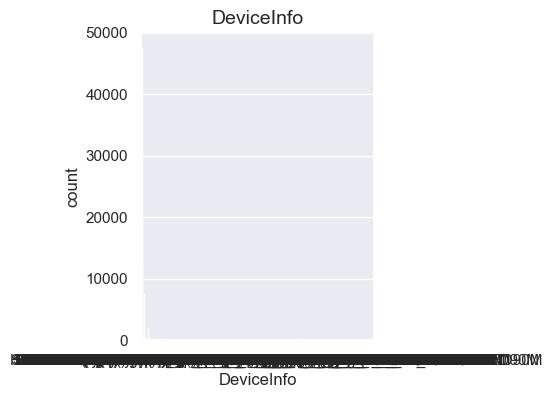

In [87]:
ax = sns.countplot(x="DeviceInfo", data=train_trans)
ax.set_title('DeviceInfo', fontsize=14)
sns.set(rc={"figure.figsize": (3,4)})
plt.show()

# DATA PREPARATION

In [88]:
def summary(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values

    return summary

In [89]:
summary(train_trans)

Dataset Shape: (590540, 434)


Name   dtypes  Missing  Uniques
0     TransactionID    int64        0   590540
1           isFraud    int64        0        2
2     TransactionDT    int64        0   573349
3    TransactionAmt  float64        0    20902
4         ProductCD   object        0        5
5             card1    int64        0    13553
6             card2  float64     8933      500
7             card3  float64     1565      114
8             card4   object     1577        4
9             card5  float64     4259      119
10            card6   object     1571        4
11            addr1  float64    65706      332
12            addr2  float64    65706       74
13            dist1  float64   352271     2651
14            dist2  float64   552913     1751
15    P_emaildomain   object    94456       59
16    R_emaildomain   object   453249       60
17               C1  float64        0     1657
18               C2  float64        0     1216
19               C3  float64        0       27
20               C4  float64        0     1260
21               C5  float64        0      319
22               C6  float64        0     1328
23               C7  float64        0     1103
24               C8  float64        0     1253
25               C9  float64        0      205
26              C10  float64        0     1231
27              C11  float64        0     1476
28              C12  float64        0     1199
29              C13  float64        0     1597
30              C14  float64        0     1108
31               D1  float64     1269      641
32               D2  float64   280797      641
33               D3  float64   262878      649
34               D4  float64   168922      808
35               D5  float64   309841      688
36               D6  float64   517353      829
37               D7  float64   551623      597
38               D8  float64   515614    12353
39               D9  float64   515614       24
40              D10  float64    76022      818
41              D11  float64   279287      676
42              D12  float64   525823      635
43              D13  float64   528588      577
44              D14  float64   528353      802
45              D15  float64    89113      859
46               M1   object   271100        2
47               M2   object   271100        2
48               M3   object   271100        2
49               M4   object   281444        3
50               M5   object   350482        2
51               M6   object   169360        2
52               M7   object   346265        2
53               M8   object   346252        2
54               M9   object   346252        2
55               V1  float64   279287        2
56               V2  float64   279287        9
57               V3  float64   279287       10
58               V4  float64   279287        7
59               V5  float64   279287        7
60               V6  float64   279287       10
61               V7  float64   279287       10
62               V8  float64   279287        9
63               V9  float64   279287        9
64              V10  float64   279287        5
65              V11  float64   279287        6
66              V12  float64    76073        4
67              V13  float64    76073        7
68              V14  float64    76073        2
69              V15  float64    76073        8
70              V16  float64    76073       15
71              V17  float64    76073       16
72              V18  float64    76073       16
73              V19  float64    76073        8
74              V20  float64    76073       15
75              V21  float64    76073        6
76              V22  float64    76073        9
77              V23  float64    76073       14
78              V24  float64    76073       14
79              V25  float64    76073        7
80              V26  float64    76073       13
81              V27  float64    76073        4
82              V28  float64    76073        4
83              V29  float64    76073        6
84              V30 

In [90]:
summary(test_trans)

Dataset Shape: (506691, 433)


Name   dtypes  Missing  Uniques
0     TransactionID    int64        0   506691
1     TransactionDT    int64        0   494686
2    TransactionAmt  float64        0    14119
3         ProductCD   object        0        5
4             card1    int64        0    13244
5             card2  float64     8654      497
6             card3  float64     3002      115
7             card4   object     3086        4
8             card5  float64     4547      102
9             card6   object     3007        3
10            addr1  float64    65609      292
11            addr2  float64    65609       72
12            dist1  float64   291217     1988
13            dist2  float64   470255     1814
14    P_emaildomain   object    69192       60
15    R_emaildomain   object   370821       60
16               C1  float64        3     1174
17               C2  float64        3     1123
18               C3  float64        3       31
19               C4  float64        3      728
20               C5  float64        3      353
21               C6  float64        3      834
22               C7  float64        3      518
23               C8  float64        3      442
24               C9  float64        3      354
25              C10  float64        3      456
26              C11  float64        3      937
27              C12  float64        3      663
28              C13  float64     4748     1069
29              C14  float64        3      569
30               D1  float64     6031      642
31               D2  float64   234769      642
32               D3  float64   203142      887
33               D4  float64    76851     1056
34               D5  float64   224375      961
35               D6  float64   381908     1072
36               D7  float64   446558      904
37               D8  float64   432353    13244
38               D9  float64   432353       24
39              D10  float64    12545     1075
40              D11  float64   176518      880
41              D12  float64   437437      866
42              D13  float64   383307      805
43              D14  float64   391497     1031
44              D15  float64    12069     1078
45               M1   object   176639        2
46               M2   object   176639        2
47               M3   object   176639        2
48               M4   object   237745        3
49               M5   object   309632        2
50               M6   object   158939        2
51               M7   object   235018        2
52               M8   object   235004        2
53               M9   object   235004        2
54               V1  float64   176518        2
55               V2  float64   176518       12
56               V3  float64   176518       12
57               V4  float64   176518       10
58               V5  float64   176518       11
59               V6  float64   176518       13
60               V7  float64   176518       13
61               V8  float64   176518       12
62               V9  float64   176518       12
63              V10  float64   176518        6
64              V11  float64   176518        8
65              V12  float64    12589        5
66              V13  float64    12589        7
67              V14  float64    12589        2
68              V15  float64    12589       13
69              V16  float64    12589       23
70              V17  float64    12589       11
71              V18  float64    12589       11
72              V19  float64    12589       13
73              V20  float64    12589       23
74              V21  float64    12589        6
75              V22  float64    12589        8
76              V23  float64    12589       16
77              V24  float64    12589       26
78              V25  float64    12589       13
79              V26  float64    12589       23
80              V27  float64    12589        8
81              V28  float64    12589        8
82              V29  float64    12589        5
83              V30  float64    12589        8
84              V31 

 1/Feature Engineering

In [10]:
def Devices(df):
    df['device_name'] = df['DeviceInfo'].str.split('/', expand=True)[0]
    df['device_version'] = df['DeviceInfo'].str.split('/', expand=True)[1]
    df = df.drop(['DeviceInfo'], axis = 1)
    
    df['OS_id_30'] = df['id_30'].str.split(' ', expand=True)[0]
    df['version_id_30'] = df['id_30'].str.split(' ', expand=True)[1]
    df = df.drop(['id_30'], axis = 1)
    
    df['browser_id_31'] = df['id_31'].str.split(' ', expand=True)[0]
    df['version_id_31'] = df['id_31'].str.split(' ', expand=True)[1]
    df = df.drop(['id_31'], axis = 1)

    df['screen_width'] = df['id_33'].str.split('x', expand=True)[0]
    df['screen_height'] = df['id_33'].str.split('x', expand=True)[1]
    df = df.drop(['id_33'], axis = 1)

    df['id_34'] = df['id_34'].str.split(':', expand=True)[1]
    df['id_23'] = df['id_23'].str.split(':', expand=True)[1]
    df = df.drop(['id_34', 'id_23'], axis = 1)

    df.loc[df['device_name'].str.contains('SM', na=False), 'device_name'] = 'Samsung'
    df.loc[df['device_name'].str.contains('SAMSUNG', na=False), 'device_name'] = 'Samsung'
    df.loc[df['device_name'].str.contains('GT-', na=False), 'device_name'] = 'Samsung'
    df.loc[df['device_name'].str.contains('Moto G', na=False), 'device_name'] = 'Motorola'
    df.loc[df['device_name'].str.contains('Moto', na=False), 'device_name'] = 'Motorola'
    df.loc[df['device_name'].str.contains('moto', na=False), 'device_name'] = 'Motorola'
    df.loc[df['device_name'].str.contains('LG-', na=False), 'device_name'] = 'LG'
    df.loc[df['device_name'].str.contains('rv:', na=False), 'device_name'] = 'RV'
    df.loc[df['device_name'].str.contains('HUAWEI', na=False), 'device_name'] = 'Huawei'
    df.loc[df['device_name'].str.contains('ALE-', na=False), 'device_name'] = 'Huawei'
    df.loc[df['device_name'].str.contains('-L', na=False), 'device_name'] = 'Huawei'
    df.loc[df['device_name'].str.contains('Blade', na=False), 'device_name'] = 'ZTE'
    df.loc[df['device_name'].str.contains('BLADE', na=False), 'device_name'] = 'ZTE'
    df.loc[df['device_name'].str.contains('Linux', na=False), 'device_name'] = 'Linux'
    df.loc[df['device_name'].str.contains('XT', na=False), 'device_name'] = 'Sony'
    df.loc[df['device_name'].str.contains('HTC', na=False), 'device_name'] = 'HTC'
    df.loc[df['device_name'].str.contains('ASUS', na=False), 'device_name'] = 'Asus'

    df.loc[df.device_name.isin(df.device_name.value_counts()[df.device_name.value_counts() < 200].index), 'device_name'] = "Others"
    df['had_id'] = 1
    gc.collect()

    return df

In [92]:
train_trans = Devices(train_trans)

In [93]:
train_trans

TransactionID  isFraud  TransactionDT  TransactionAmt  \
time                                                                         
2017-12-02 00:00:00        2987000        0          86400           68.50   
2017-12-02 00:00:01        2987001        0          86401           29.00   
2017-12-02 00:01:09        2987002        0          86469           59.00   
2017-12-02 00:01:39        2987003        0          86499           50.00   
2017-12-02 00:01:46        2987004        0          86506           50.00   
...                            ...      ...            ...             ...   
2018-06-01 23:57:27        3577535        0       15811047           49.00   
2018-06-01 23:57:29        3577536        0       15811049           39.50   
2018-06-01 23:57:59        3577537        0       15811079           30.95   
2018-06-01 23:58:08        3577538        0       15811088          117.00   
2018-06-01 23:58:51        3577539        0       15811131          279.95   

                    ProductCD  card1  card2  card3       card4  card5   card6  \
time                                                                            
2017-12-02 00:00:00         W  13926    NaN  150.0    discover  142.0  credit   
2017-12-02 00:00:01         W   2755  404.0  150.0  mastercard  102.0  credit   
2017-12-02 00:01:09         W   4663  490.0  150.0        visa  166.0   debit   
2017-12-02 00:01:39         W  18132  567.0  150.0  mastercard  117.0   debit   
2017-12-02 00:01:46         H   4497  514.0  150.0  mastercard  102.0  credit   
...                       ...    ...    ...    ...         ...    ...     ...   
2018-06-01 23:57:27         W   6550    NaN  150.0        visa  226.0   debit   
2018-06-01 23:57:29         W  10444  225.0  150.0  mastercard  224.0   debit   
2018-06-01 23:57:59         W  12037  595.0  150.0  mastercard  224.0   debit   
2018-06-01 23:58:08         W   7826  481.0  150.0  mastercard  224.0   debit   
2018-06-01 23:58:51         W  15066  170.0  150.0  mastercard  102.0  credit   

                     addr1  addr2  dist1  dist2 P_emaildomain R_emaildomain  \
time                                                                          
2017-12-02 00:00:00  315.0   87.0   19.0    NaN           NaN           NaN   
2017-12-02 00:00:01  325.0   87.0    NaN    NaN     gmail.com           NaN   
2017-12-02 00:01:09  330.0   87.0  287.0    NaN   outlook.com           NaN   
2017-12-02 00:01:39  476.0   87.0    NaN    NaN     yahoo.com           NaN   
2017-12-02 00:01:46  420.0   87.0    NaN    NaN     gmail.com           NaN   
...                    ...    ...    ...    ...           ...           ...   
2018-06-01 23:57:27  272.0   87.0   48.0    NaN           NaN           NaN   
2018-06-01 23:57:29  204.0   87.0    NaN    NaN     gmail.com           NaN   
2018-06-01 23:57:59  231.0   87.0    NaN    NaN     gmail.com           NaN   
2018-06-01 23:58:08  387.0   87.0    3.0    NaN       aol.com           NaN   
2018-06-01 23:58:51  299.0   87.0    NaN    NaN     gmail.com           NaN   

                      C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  \
time                                                                         
2017-12-02 00:00:00  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0   
2017-12-02 00:00:01  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
2017-12-02 00:01:09  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0   
2017-12-02 00:01:39  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0   
2017-12-02 00:01:46  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0   
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2018-06-01 23:57:27  2.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  2.0  0.0  1.0   
2018-06-01 23:57:29  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0   
2018-06-01 23:57:59  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0   
2018-06-01 23:58:08  1.0  1.0  0.0  0.0  0.0  3.0  0.0  0.0  2.0  

 2/Missing Values

<Axes: ylabel='time'>

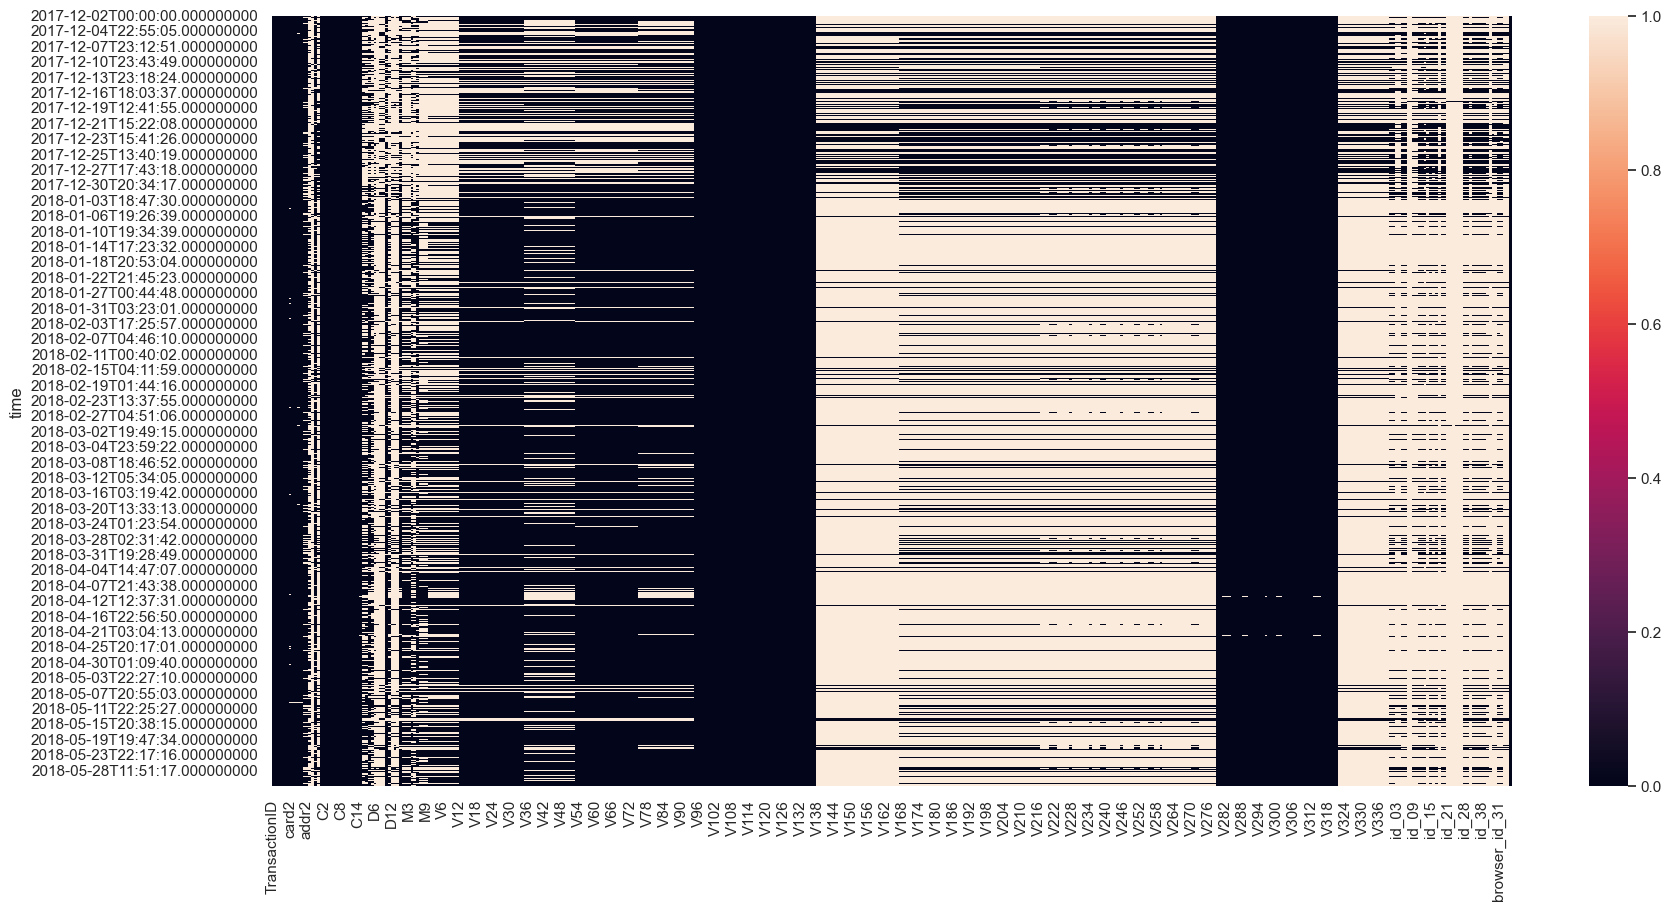

In [94]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_trans.isna())

VERY IMPORTANT REMARK:

the percentage of missing values for each feature is not approximitly equal in the training set and the test set and deleting from each set sepratly the feature with more than 80% of missing values will not deliver the same result for both sets ( different features in the training set and the test set ).

SOLUTION:

we will be working with the only train_trans dataset knowing that it's a huge dataset.

In [95]:
def missing_values(df):
    shape_init=df.shape[1]
    for col in df.columns:
        if round(df[col].isna().sum()/df.shape[0]*100, 2) > 80:
            df.drop(columns=[col], inplace=True)
            if col in int_col:
                num_col.remove(col)
            elif col in object_col:
                object_col.remove(col)
            elif col in float_col:
                float_col.remove(col)
    print(f"Nombre de variables supprimées : {shape_init-df.shape[1]}")
    print(f"Variables catégoriques restantes : {len(object_col)}")     
    print(f"Variables entiéres restantes : {len(int_col)}")
    print(f"Variables réelles restantes : {len(float_col)}")

In [96]:
int_col=train_trans.dtypes[train_trans.dtypes=='int64'].index
int_col=list(int_col)

In [97]:
int_col.remove('isFraud')

In [98]:
float_col=train_trans.dtypes[train_trans.dtypes=='float64'].index
float_col=list(float_col)

In [99]:
object_col=train_trans.dtypes[train_trans.dtypes=='object'].index
object_col=list(object_col)

Duplicated rows to be deleted

In [100]:
train_trans.drop_duplicates(inplace = True)

In [101]:
# Count of duplicate rows
num_duplicates = train_trans.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")


Number of duplicated rows: 0


In [102]:
del train_trans1
del test_trans1
del test_trans
del all_df

Droping columns with more than 80% of missing values

In [103]:
Target = train_trans['isFraud']
TransactionID = train_trans['TransactionID']
TransactionDT = train_trans['TransactionDT']
gc.collect()

32

In [104]:
# Dropping columns with more than 80% missing values 
print("Shape before dropping features more than 80% missing values: ", train_trans.shape)
missing_values(train_trans)

print("Shape after dropping features more than 80% missing values: ", train_trans.shape)

Shape before dropping features more than 80% missing values:  (590540, 437)
Nombre de variables supprimées : 75
Variables catégoriques restantes : 27
Variables entiéres restantes : 4
Variables réelles restantes : 330
Shape after dropping features more than 80% missing values:  (590540, 362)


In [105]:
train_trans.dropna(how= 'all', axis = 0)

TransactionID  isFraud  TransactionDT  TransactionAmt  \
time                                                                         
2017-12-02 00:00:00        2987000        0          86400           68.50   
2017-12-02 00:00:01        2987001        0          86401           29.00   
2017-12-02 00:01:09        2987002        0          86469           59.00   
2017-12-02 00:01:39        2987003        0          86499           50.00   
2017-12-02 00:01:46        2987004        0          86506           50.00   
...                            ...      ...            ...             ...   
2018-06-01 23:57:27        3577535        0       15811047           49.00   
2018-06-01 23:57:29        3577536        0       15811049           39.50   
2018-06-01 23:57:59        3577537        0       15811079           30.95   
2018-06-01 23:58:08        3577538        0       15811088          117.00   
2018-06-01 23:58:51        3577539        0       15811131          279.95   

                    ProductCD  card1  card2  card3       card4  card5   card6  \
time                                                                            
2017-12-02 00:00:00         W  13926    NaN  150.0    discover  142.0  credit   
2017-12-02 00:00:01         W   2755  404.0  150.0  mastercard  102.0  credit   
2017-12-02 00:01:09         W   4663  490.0  150.0        visa  166.0   debit   
2017-12-02 00:01:39         W  18132  567.0  150.0  mastercard  117.0   debit   
2017-12-02 00:01:46         H   4497  514.0  150.0  mastercard  102.0  credit   
...                       ...    ...    ...    ...         ...    ...     ...   
2018-06-01 23:57:27         W   6550    NaN  150.0        visa  226.0   debit   
2018-06-01 23:57:29         W  10444  225.0  150.0  mastercard  224.0   debit   
2018-06-01 23:57:59         W  12037  595.0  150.0  mastercard  224.0   debit   
2018-06-01 23:58:08         W   7826  481.0  150.0  mastercard  224.0   debit   
2018-06-01 23:58:51         W  15066  170.0  150.0  mastercard  102.0  credit   

                     addr1  addr2  dist1 P_emaildomain R_emaildomain   C1  \
time                                                                        
2017-12-02 00:00:00  315.0   87.0   19.0           NaN           NaN  1.0   
2017-12-02 00:00:01  325.0   87.0    NaN     gmail.com           NaN  1.0   
2017-12-02 00:01:09  330.0   87.0  287.0   outlook.com           NaN  1.0   
2017-12-02 00:01:39  476.0   87.0    NaN     yahoo.com           NaN  2.0   
2017-12-02 00:01:46  420.0   87.0    NaN     gmail.com           NaN  1.0   
...                    ...    ...    ...           ...           ...  ...   
2018-06-01 23:57:27  272.0   87.0   48.0           NaN           NaN  2.0   
2018-06-01 23:57:29  204.0   87.0    NaN     gmail.com           NaN  1.0   
2018-06-01 23:57:59  231.0   87.0    NaN     gmail.com           NaN  1.0   
2018-06-01 23:58:08  387.0   87.0    3.0       aol.com           NaN  1.0   
2018-06-01 23:58:51  299.0   87.0    NaN     gmail.com           NaN  2.0   

                      C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  \
time                                                                         
2017-12-02 00:00:00  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0  0.0   
2017-12-02 00:00:01  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
2017-12-02 00:01:09  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   
2017-12-02 00:01:39  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0  0.0   
2017-12-02 00:01:46  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2018-06-01 23:57:27  1.0  0.0  0.0  1.0  0.0  0.0  0.0  2.0  0.0  1.0  0.0   
2018-06-01 23:57:29  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   
2018-06-01 23:57:59  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   
2018-06-01 23:58:08  1.0  0.0  0.0  0.0  3.0  0.0  0.0  2.0  0.0  1.0  1.0   
2018-06-01 23:

In [106]:
print(int_col)
print(float_col)
print(object_col)

['TransactionID', 'TransactionDT', 'card1', 'had_id']
['TransactionAmt', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', '

In [107]:
train_trans = train_trans.drop(['isFraud', 'TransactionID', 'TransactionDT'], axis = 1)
# Filtering numerical data
num_df = train_trans.select_dtypes(include=np.number)
print(num_df.shape)

# Filtering categorical data
cat_df = train_trans.select_dtypes(exclude=np.number)
print(cat_df.shape)

(590540, 332)
(590540, 27)


In [108]:
num_df.head()

TransactionAmt  card1  card2  card3  card5  addr1  addr2  \
time                                                                            
2017-12-02 00:00:00            68.5  13926    NaN  150.0  142.0  315.0   87.0   
2017-12-02 00:00:01            29.0   2755  404.0  150.0  102.0  325.0   87.0   
2017-12-02 00:01:09            59.0   4663  490.0  150.0  166.0  330.0   87.0   
2017-12-02 00:01:39            50.0  18132  567.0  150.0  117.0  476.0   87.0   
2017-12-02 00:01:46            50.0   4497  514.0  150.0  102.0  420.0   87.0   

                     dist1   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  \
time                                                                           
2017-12-02 00:00:00   19.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
2017-12-02 00:00:01    NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2017-12-02 00:01:09  287.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
2017-12-02 00:01:39    NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0   
2017-12-02 00:01:46    NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0   

                     C11  C12   C13  C14     D1     D2    D3    D4   D5   D10  \
time                                                                            
2017-12-02 00:00:00  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN  13.0   
2017-12-02 00:00:01  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN   0.0   
2017-12-02 00:01:09  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN   0.0   
2017-12-02 00:01:39  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0  84.0   
2017-12-02 00:01:46  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN   NaN   

                       D11    D15   V1   V2   V3   V4   V5   V6   V7   V8  \
time                                                                        
2017-12-02 00:00:00   13.0    0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2017-12-02 00:00:01    NaN    0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2017-12-02 00:01:09  315.0  315.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2017-12-02 00:01:39    NaN  111.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2017-12-02 00:01:46    NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                      V9  V10  V11  V12  V13  V14  V15  V16  V17  V18  V19  \
time                                                                         
2017-12-02 00:00:00  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0   
2017-12-02 00:00:01  NaN  NaN  NaN  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
2017-12-02 00:01:09  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0   
2017-12-02 00:01:39  NaN  NaN  NaN  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0   
2017-12-02 00:01:46  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                     V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  \
time                                                                         
2017-12-02 00:00:00  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2017-12-02 00:00:01  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2017-12-02 00:01:09  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2017-12-02 00:01:39  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2017-12-02 00:01:46  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                     V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  \
time                                                                         
2017-12-02 00:00:00  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2017-12-02 00:00:01  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0   
2017-12-02 00:01:09  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
2017-12-02 00:01:39  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
2017-12-02 00:01:46  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                     V42  V43  V44  V45  V46  V47  V48  V49  V50  V51  V52  \
time                                                             

In [109]:
cat_df.head()

ProductCD       card4   card6 P_emaildomain R_emaildomain  \
time                                                                            
2017-12-02 00:00:00         W    discover  credit           NaN           NaN   
2017-12-02 00:00:01         W  mastercard  credit     gmail.com           NaN   
2017-12-02 00:01:09         W        visa   debit   outlook.com           NaN   
2017-12-02 00:01:39         W  mastercard   debit     yahoo.com           NaN   
2017-12-02 00:01:46         H  mastercard  credit     gmail.com           NaN   

                      M1   M2   M3   M4   M5   M6   M7   M8   M9     id_12  \
time                                                                         
2017-12-02 00:00:00    T    T    T   M2    F    T  NaN  NaN  NaN       NaN   
2017-12-02 00:00:01  NaN  NaN  NaN   M0    T    T  NaN  NaN  NaN       NaN   
2017-12-02 00:01:09    T    T    T   M0    F    F    F    F    F       NaN   
2017-12-02 00:01:39  NaN  NaN  NaN   M0    T    F  NaN  NaN  NaN       NaN   
2017-12-02 00:01:46  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NotFound   

                    id_15     id_16 id_28     id_29 id_35 id_36 id_37 id_38  \
time                                                                          
2017-12-02 00:00:00   NaN       NaN   NaN       NaN   NaN   NaN   NaN   NaN   
2017-12-02 00:00:01   NaN       NaN   NaN       NaN   NaN   NaN   NaN   NaN   
2017-12-02 00:01:09   NaN       NaN   NaN       NaN   NaN   NaN   NaN   NaN   
2017-12-02 00:01:39   NaN       NaN   NaN       NaN   NaN   NaN   NaN   NaN   
2017-12-02 00:01:46   New  NotFound   New  NotFound     T     F     T     T   

                    DeviceType device_name browser_id_31 version_id_31  
time                                                                    
2017-12-02 00:00:00        NaN         NaN           NaN           NaN  
2017-12-02 00:00:01        NaN         NaN           NaN           NaN  
2017-12-02 00:01:09        NaN         NaN           NaN           NaN  
2017-12-02 00:01:39        NaN         NaN           NaN           NaN  
2017-12-02 00:01:46     mobile     Samsung       samsung       browser

In [110]:
gc.collect()

0

In [111]:
# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer # Imputing missing values
from imblearn.under_sampling import RandomUnderSampler # Class Imbalance

# Numerical features selection
from sklearn.decomposition import PCA 

# Categorical Features Selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [112]:
# Other General Imports
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

In [113]:
# Filling missing values by median for numerical columns 
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
num_df = pd.DataFrame(imp_median.fit_transform(num_df), columns=num_df.columns)
print(num_df.shape)

# Filling missing values by most frequent value for categorical columns
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cat_df = pd.DataFrame(imp_mode.fit_transform(cat_df), columns=cat_df.columns)
    
cat_df.isnull().sum()
num_df.isnull().sum()

(590540, 332)


TransactionAmt    0
card1             0
card2             0
card3             0
card5             0
addr1             0
addr2             0
dist1             0
C1                0
C2                0
C3                0
C4                0
C5                0
C6                0
C7                0
C8                0
C9                0
C10               0
C11               0
C12               0
C13               0
C14               0
D1                0
D2                0
D3                0
D4                0
D5                0
D10               0
D11               0
D15               0
V1                0
V2                0
V3                0
V4                0
V5                0
V6                0
V7                0
V8                0
V9                0
V10               0
V11               0
V12               0
V13               0
V14               0
V15               0
V16               0
V17               0
V18               0
V19               0
V20               0


In [114]:
print(cat_df.shape)

(590540, 27)


In [115]:
cat_df.head()

ProductCD       card4   card6 P_emaildomain R_emaildomain M1 M2 M3  M4 M5  \
0         W    discover  credit     gmail.com     gmail.com  T  T  T  M2  F   
1         W  mastercard  credit     gmail.com     gmail.com  T  T  T  M0  T   
2         W        visa   debit   outlook.com     gmail.com  T  T  T  M0  F   
3         W  mastercard   debit     yahoo.com     gmail.com  T  T  T  M0  T   
4         H  mastercard  credit     gmail.com     gmail.com  T  T  T  M0  F   

  M6 M7 M8 M9     id_12  id_15     id_16  id_28     id_29 id_35 id_36 id_37  \
0  T  F  F  T  NotFound  Found     Found  Found     Found     T     F     T   
1  T  F  F  T  NotFound  Found     Found  Found     Found     T     F     T   
2  F  F  F  F  NotFound  Found     Found  Found     Found     T     F     T   
3  F  F  F  T  NotFound  Found     Found  Found     Found     T     F     T   
4  F  F  F  T  NotFound    New  NotFound    New  NotFound     T     F     T   

  id_38 DeviceType device_name browser_id_31 version_id_31  
0     F    desktop     Windows        chrome        safari  
1     F    desktop     Windows        chrome        safari  
2     F    desktop     Windows        chrome        safari  
3     F    desktop     Windows        chrome        safari  
4     T     mobile     Samsung       samsung       browser

In [116]:
num_df.head()

TransactionAmt    card1  card2  card3  card5  addr1  addr2  dist1   C1  \
0            68.5  13926.0  361.0  150.0  142.0  315.0   87.0   19.0  1.0   
1            29.0   2755.0  404.0  150.0  102.0  325.0   87.0    8.0  1.0   
2            59.0   4663.0  490.0  150.0  166.0  330.0   87.0  287.0  1.0   
3            50.0  18132.0  567.0  150.0  117.0  476.0   87.0    8.0  2.0   
4            50.0   4497.0  514.0  150.0  102.0  420.0   87.0    8.0  1.0   

    C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12   C13  C14     D1  \
0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0  0.0   1.0  1.0   14.0   
1  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   1.0  1.0    0.0   
2  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0   
3  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0  0.0  25.0  1.0  112.0   
4  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   1.0  1.0    0.0   

      D2    D3    D4    D5   D10    D11    D15   V1   V2   V3   V4   V5   V6  \
0   97.0  13.0  26.0  10.0  13.0   13.0    0.0  1.0  1.0  1.0  1.0  1.0  1.0   
1   97.0   8.0   0.0  10.0   0.0   43.0    0.0  1.0  1.0  1.0  1.0  1.0  1.0   
2   97.0   8.0   0.0  10.0   0.0  315.0  315.0  1.0  1.0  1.0  1.0  1.0  1.0   
3  112.0   0.0  94.0   0.0  84.0   43.0  111.0  1.0  1.0  1.0  1.0  1.0  1.0   
4   97.0   8.0  26.0  10.0  15.0   43.0   52.0  1.0  1.0  1.0  1.0  1.0  1.0   

    V7   V8   V9  V10  V11  V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  \
0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
1  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
2  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
3  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
4  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   

   V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  V34  V35  V36  \
0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
1  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
3  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
4  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   

   V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  V48  V49  V50  V51  \
0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
4  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   

   V52  V53  V54  V55  V56  V57  V58  V59  V60  V61  V62  V63  V64  V65  V66  \
0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0   
1  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0   
2  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0   
3  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0   
4  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0   

   V67  V68  V69  V70  V71  V72  V73  V74  V75  V76  V77  V78  V79  V80  V81  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   

   V82  V83  V84  V85  V86  V87  V88  V89  V90  V91  V92  V93  V94  V95   V96  \
0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0   
1  1.0  1.0  0.0  0.0  

3/ Preprocessing

Numerical Features Preprocessing

In [117]:
scaled_num = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(num_df), columns = num_df.columns)
scaled_num.head()

TransactionAmt     card1  card2     card3     card5     addr1     addr2  \
0        0.002137  0.743044  0.522  0.381679  0.306569  0.488636  0.836957   
1        0.000900  0.100885  0.608  0.381679  0.014599  0.511364  0.836957   
2        0.001840  0.210566  0.780  0.381679  0.481752  0.522727  0.836957   
3        0.001558  0.984824  0.934  0.381679  0.124088  0.854545  0.836957   
4        0.001558  0.201023  0.828  0.381679  0.014599  0.727273  0.836957   

      dist1        C1        C2   C3   C4   C5        C6   C7      C8  \
0  0.001847  0.000213  0.000176  0.0  0.0  0.0  0.000444  0.0  0.0000   
1  0.000778  0.000213  0.000176  0.0  0.0  0.0  0.000444  0.0  0.0000   
2  0.027902  0.000213  0.000176  0.0  0.0  0.0  0.000444  0.0  0.0000   
3  0.000778  0.000427  0.000879  0.0  0.0  0.0  0.001775  0.0  0.0000   
4  0.000778  0.000213  0.000176  0.0  0.0  0.0  0.000444  0.0  0.0003   

         C9       C10       C11  C12       C13     C14        D1        D2  \
0  0.004762  0.000000  0.000627  0.0  0.000343  0.0007  0.021875  0.151563   
1  0.000000  0.000000  0.000314  0.0  0.000343  0.0007  0.000000  0.151563   
2  0.004762  0.000000  0.000314  0.0  0.000343  0.0007  0.000000  0.151563   
3  0.004762  0.000000  0.000314  0.0  0.008568  0.0007  0.175000  0.175000   
4  0.000000  0.000307  0.000314  0.0  0.000343  0.0007  0.000000  0.151563   

         D3        D4       D5       D10       D11       D15   V1     V2  \
0  0.015873  0.149344  0.01221  0.014840  0.091286  0.086279  1.0  0.125   
1  0.009768  0.123108  0.01221  0.000000  0.132780  0.086279  1.0  0.125   
2  0.009768  0.123108  0.01221  0.000000  0.508990  0.413721  1.0  0.125   
3  0.000000  0.217962  0.00000  0.095890  0.132780  0.201663  1.0  0.125   
4  0.009768  0.149344  0.01221  0.017123  0.132780  0.140333  1.0  0.125   

         V3        V4        V5        V6        V7     V8     V9  V10  V11  \
0  0.111111  0.166667  0.166667  0.111111  0.111111  0.125  0.125  0.0  0.0   
1  0.111111  0.166667  0.166667  0.111111  0.111111  0.125  0.125  0.0  0.0   
2  0.111111  0.166667  0.166667  0.111111  0.111111  0.125  0.125  0.0  0.0   
3  0.111111  0.166667  0.166667  0.111111  0.111111  0.125  0.125  0.0  0.0   
4  0.111111  0.166667  0.166667  0.111111  0.111111  0.125  0.125  0.0  0.0   

        V12       V13  V14  V15  V16  V17  V18       V19       V20  V21  V22  \
0  0.333333  0.166667  1.0  0.0  0.0  0.0  0.0  0.142857  0.066667  0.0  0.0   
1  0.000000  0.000000  1.0  0.0  0.0  0.0  0.0  0.142857  0.066667  0.0  0.0   
2  0.333333  0.166667  1.0  0.0  0.0  0.0  0.0  0.142857  0.066667  0.0  0.0   
3  0.333333  0.166667  1.0  0.0  0.0  0.0  0.0  0.142857  0.066667  0.0  0.0   
4  0.333333  0.166667  1.0  0.0  0.0  0.0  0.0  0.142857  0.066667  0.0  0.0   

        V23       V24       V25       V26  V27  V28  V29  V30  V31  V32  V33  \
0  0.076923  0.076923  0.142857  0.076923  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.076923  0.076923  0.142857  0.076923  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.076923  0.076923  0.142857  0.076923  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.076923  0.076923  0.142857  0.076923  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.076923  0.076923  0.142857  0.076923  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   V34       V35  V36       V37       V38  V39  V40  V41  V42  V43       V44  \
0  0.0  0.333333  0.2  0.018519  0.018519  0.0  0.0  1.0  0.0  0.0  0.020833   
1  0.0  0.000000  0.0  0.018519  0.018519  0.0  0.0  1.0  0.0  0.0  0.020833   
2  0.0  0.333333  0.2  0.018519  0.018519  0.0  0.0  1.0  0.0  0.0  0.020833   
3  0.0  0.333333  0.2  0.018519  0.018519  0.0  0.0  1.0  0.0  0.0  0.020833   
4  0.0  0.333333  0.2  0.018519  0.018519  0.0  0.0  1.0  0.0  0.0  0.020833   

        V45       V46       V47  V48  V49  V50  V51  V52  V53       V54  \
0  0.020833  0.166667  0.083333  0.0  0.0  0.0  0.0  0.0  0.2  0.166667   
1  0.020833  0.166667  0.083333  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
2  0.020833  0.166667  0.0

Text(0, 0.5, 'Cumulative Rate of Variance')

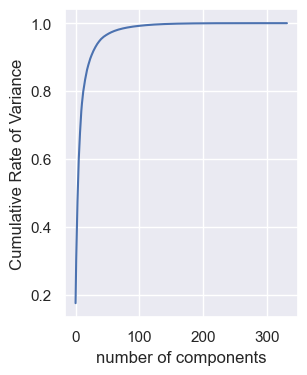

In [118]:
pca = PCA().fit(scaled_num)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("Cumulative Rate of Variance")


In [119]:
#final
pca = PCA(n_components = 0.95)

pca_fit = pca.fit_transform(scaled_num)
columns = train_trans.columns[44:84] # setting an string name for columns for surpressing sklearn future error.
num_pca = pd.DataFrame(data = pca_fit, columns=columns)
pca.explained_variance_ratio_.sum()


0.9511366853788138

In [120]:
# Create a DataFrame for the PCA-transformed data (num_pca)
num_pca1 = pd.DataFrame(data=pca_fit, columns=[f'PC{i+1}' for i in range(pca_fit.shape[1])])


# Create a DataFrame to show the contribution of each original feature to each principal component
components_df = pd.DataFrame(pca.components_, columns=num_df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])


In [121]:
components_df

TransactionAmt     card1     card2     card3     card5     addr1  \
PC1         0.000195 -0.018290 -0.049557 -0.069307  0.177183 -0.002263   
PC2        -0.002660  0.032817  0.093388  0.141967 -0.203172  0.020332   
PC3        -0.000257  0.126920 -0.910841  0.008682 -0.375461 -0.046119   
PC4         0.000984  0.577143  0.364391 -0.031922 -0.672846 -0.004531   
PC5         0.000779 -0.802645  0.127065 -0.010192 -0.557339 -0.072671   
PC6         0.002264  0.001655  0.077271  0.014822  0.064677  0.018219   
PC7        -0.000257 -0.052681 -0.039523  0.001410 -0.048680  0.991435   
PC8         0.000081 -0.031715  0.010856 -0.078767  0.007758  0.023786   
PC9         0.000884 -0.034414 -0.039242 -0.014068  0.098387 -0.063098   
PC10       -0.002561 -0.005558 -0.020821  0.100813  0.078319 -0.046171   
PC11        0.001330 -0.008133 -0.010148 -0.015507  0.000358 -0.016725   
PC12       -0.000877  0.004695 -0.018370 -0.056206 -0.013487 -0.039817   
PC13       -0.001184  0.001292 -0.002451  0.043570  0.004121 -0.010638   
PC14       -0.002343 -0.000144  0.003596  0.005722 -0.001260 -0.003564   
PC15       -0.002209 -0.000843  0.001608  0.020932  0.002513 -0.004914   
PC16       -0.001820 -0.002994  0.000622 -0.016317 -0.004879  0.001602   
PC17       -0.000098  0.001960 -0.003978 -0.039831 -0.004560 -0.000463   
PC18       -0.001314  0.000686 -0.000547  0.019619  0.003239  0.000287   
PC19       -0.001084  0.000726  0.003122  0.049972  0.002593  0.000619   
PC20        0.002853 -0.000235 -0.001255  0.064707  0.006155 -0.000562   
PC21        0.000586  0.000392 -0.002545 -0.021102 -0.000520 -0.000348   
PC22        0.000175  0.001520 -0.003169 -0.050362  0.000143  0.004122   
PC23       -0.001237  0.000492 -0.001232 -0.087085 -0.007981  0.002871   
PC24       -0.001633  0.000925 -0.001190 -0.060771 -0.001218 -0.002634   
PC25        0.001050 -0.000807  0.002952  0.095515 -0.000375  0.003293   
PC26        0.000823 -0.001007  0.002279 -0.061800 -0.003256 -0.000050   
PC27        0.002812 -0.000376 -0.002521 -0.154217  0.000543  0.000053   
PC28       -0.001030  0.000384 -0.000890  0.004126  0.001886 -0.003765   
PC29        0.000948 -0.000195  0.001376 -0.006438 -0.000814  0.000753   
PC30        0.003419 -0.000559 -0.002824 -0.040306  0.007004 -0.001219   
PC31       -0.000926  0.001478  0.000029  0.238267  0.003074 -0.000746   
PC32        0.000133 -0.001283  0.000866  0.205593  0.002754 -0.002122   
PC33        0.001186  0.000351 -0.004466 -0.380063 -0.005247 -0.000594   
PC34        0.000589  0.000363 -0.003080 -0.276271 -0.001771  0.000262   
PC35        0.000086  0.000811  0.003049 -0.071174 -0.000298 -0.001401   
PC36       -0.003768  0.002815  0.003202  0.088820 -0.000539  0.007521   
PC37        0.002281  0.000337  0.001601 -0.007361 -0.000959  0.000373   
PC38        0.005329  0.000733  0.000774  0.065840  0.002194 -0.000436   
PC39       -0.004207 -0.000049  0.001335 -0.036089 -0.003567  0.001373   
PC40        0.000166  0.001178  0.000650  0.687639  0.005897 -0.002112   

         addr2     dist1        C1        C2            C3        C4  \
PC1   0.004843  0.002497 -0.000670 -0.001487 -4.586835e-05 -0.004045   
PC2  -0.008849 -0.003826  0.005151  0.005663 -1.344546e-04  0.005472   
PC3   0.000818  0.000788  0.000268  0.000131 -1.661955e-04 -0.000611   
PC4   0.001893  0.000396  0.000120 -0.000246  8.351409e-05 -0.000403   
PC5   0.000736 -0.000237 -0.000217 -0.000350  1.591143e-04 -0.000615   
PC6  -0.000635 -0.001267  0.004112  0.002910 -8.483620e-04 -0.001330   
PC7   0.000363 -0.000474  0.000804  0.000748  1.381460e-04  0.000733   
PC8   0.003245  0.001840 -0.006432 -0.006972 -5.481665e-04 -0.006612   
PC9   0.000878 -0.003234 -0.000506 -0.000622  3.968489e-04  0.000309   
PC10 -0.003678  0.003794  0.014316  0.013687 -4.431884e-04  0.012930   
PC11 -0.000290 -0.000092  0.011557  0.011419 -1.294881e-04  0.013729   
PC12 -0.000040 -0.007050  0.005160  0.004087  4.734568e-04  0.007353   
PC13  0.000043 -0.004689  0.007660 

In [122]:
num_pca.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.323767 -0.195413  0.165047  0.427136  0.045425 -0.186386  0.063809   
1 -0.366990  0.269998  0.131884  0.182788  0.673383 -0.025724  0.096363   
2 -0.076642 -0.157790 -0.199622  0.119463  0.420860 -0.200106  0.106679   
3 -0.204429 -0.035661 -0.128648  0.859522 -0.011436 -0.228297  0.410294   
4 -0.391432 -0.134168 -0.106163  0.423674  0.660365 -0.249032  0.361606   

         V8        V9       V10       V11       V12       V13       V14  \
0 -0.061364 -0.064428 -0.080384 -0.025660 -0.060037 -0.007215  0.028193   
1  0.213208 -0.049688 -0.418528 -0.029412  0.016228 -0.223579 -0.027042   
2  0.097227 -0.202645  0.195683 -0.086181 -0.006280 -0.223965 -0.013131   
3 -0.023282 -0.090310 -0.063734  0.040481 -0.105446  0.026590 -0.003132   
4 -0.002509 -0.107527 -0.072404  0.162745  0.554275  0.035697 -0.100752   

        V15       V16       V17       V18       V19       V20       V21  \
0  0.029357 -0.016100 -0.015742  0.046504 -0.022734 -0.009472  0.014681   
1 -0.061580  0.059466 -0.003844  0.011844 -0.046697  0.010202  0.024005   
2 -0.024687  0.023523  0.015611 -0.143540  0.033072  0.014695  0.034421   
3 -0.018987  0.016025 -0.020003 -0.026948 -0.009920 -0.042175 -0.034059   
4  0.133408  0.010432 -0.073370  0.008963  0.015339 -0.005106 -0.062286   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.007713 -0.025821 -0.034147 -0.016373 -0.020201  0.009660 -0.050366   
1  0.016289 -0.048702  0.027269  0.013289 -0.003423  0.003427 -0.009561   
2 -0.046420 -0.054880 -0.085521  0.021785 -0.013122 -0.031684  0.080199   
3  0.002297  0.046726  0.017136  0.035982 -0.012967 -0.032621 -0.047481   
4 -0.024515 -0.040214 -0.018475  0.001222 -0.026458 -0.059718 -0.008825   

        V29       V30       V31       V32       V33       V34       V35  \
0 -0.001499 -0.012994 -0.008003 -0.025172 -0.016572  0.035473 -0.006000   
1 -0.003098 -0.009269 -0.004743  0.011852  0.012606 -0.018631 -0.003677   
2 -0.004164  0.012657 -0.023126  0.001991  0.025565  0.017239 -0.008896   
3 -0.000598 -0.027429 -0.014411 -0.015151  0.001526 -0.001282 -0.022891   
4 -0.032875 -0.022703  0.023190  0.019902 -0.017454 -0.024128  0.013641   

        V36       V37       V38       V39       V40  
0 -0.010615  0.004378 -0.001719 -0.073782 -0.003286  
1  0.002856  0.008602  0.004822 -0.007791 -0.016425  
2  0.000851  0.015354  0.002153 -0.009983 -0.002588  
3  0.149137  0.004652 -0.048256  0.074448 -0.009962  
4  0.000569  0.021261 -0.004375 -0.004137 -0.021785

In [123]:
num_pca.shape

(590540, 40)

In [124]:
pca_fit.shape

(590540, 40)

Categorical Features Preprocessing

In [125]:
cat_df

ProductCD       card4   card6 P_emaildomain R_emaildomain M1 M2 M3  M4  \
0              W    discover  credit     gmail.com     gmail.com  T  T  T  M2   
1              W  mastercard  credit     gmail.com     gmail.com  T  T  T  M0   
2              W        visa   debit   outlook.com     gmail.com  T  T  T  M0   
3              W  mastercard   debit     yahoo.com     gmail.com  T  T  T  M0   
4              H  mastercard  credit     gmail.com     gmail.com  T  T  T  M0   
...          ...         ...     ...           ...           ... .. .. ..  ..   
590535         W        visa   debit     gmail.com     gmail.com  T  T  T  M0   
590536         W  mastercard   debit     gmail.com     gmail.com  T  F  F  M0   
590537         W  mastercard   debit     gmail.com     gmail.com  T  F  F  M0   
590538         W  mastercard   debit       aol.com     gmail.com  T  T  T  M0   
590539         W  mastercard  credit     gmail.com     gmail.com  T  F  F  M0   

       M5 M6 M7 M8 M9     id_12  id_15     id_16  id_28     id_29 id_35 id_36  \
0       F  T  F  F  T  NotFound  Found     Found  Found     Found     T     F   
1       T  T  F  F  T  NotFound  Found     Found  Found     Found     T     F   
2       F  F  F  F  F  NotFound  Found     Found  Found     Found     T     F   
3       T  F  F  F  T  NotFound  Found     Found  Found     Found     T     F   
4       F  F  F  F  T  NotFound    New  NotFound    New  NotFound     T     F   
...    .. .. .. .. ..       ...    ...       ...    ...       ...   ...   ...   
590535  T  F  F  F  T  NotFound  Found     Found  Found     Found     T     F   
590536  F  T  F  F  F  NotFound  Found     Found  Found     Found     T     F   
590537  F  T  F  F  T  NotFound  Found     Found  Found     Found     T     F   
590538  F  T  F  F  T  NotFound  Found     Found  Found     Found     T     F   
590539  F  T  F  F  F  NotFound  Found     Found  Found     Found     T     F   

       id_37 id_38 DeviceType device_name browser_id_31 version_id_31  
0          T     F    desktop     Windows        chrome        safari  
1          T     F    desktop     Windows        chrome        safari  
2          T     F    desktop     Windows        chrome        safari  
3          T     F    desktop     Windows        chrome        safari  
4          T     T     mobile     Samsung       samsung       browser  
...      ...   ...        ...         ...           ...           ...  
590535     T     F    desktop     Windows        chrome        safari  
590536     T     F    desktop     Windows        chrome        safari  
590537     T     F    desktop     Windows        chrome        safari  
590538     T     F    desktop     Windows        chrome        safari  
590539     T     F    desktop     Windows        chrome        safari  

[590540 rows x 27 columns]

In [126]:
for x in cat_df.columns:
    #printing unique values
    print(x ,':', len(cat_df[x].unique()))

ProductCD : 5
card4 : 4
card6 : 4
P_emaildomain : 59
R_emaildomain : 60
M1 : 2
M2 : 2
M3 : 2
M4 : 3
M5 : 2
M6 : 2
M7 : 2
M8 : 2
M9 : 2
id_12 : 2
id_15 : 3
id_16 : 2
id_28 : 2
id_29 : 2
id_35 : 2
id_36 : 2
id_37 : 2
id_38 : 2
DeviceType : 2
device_name : 13
browser_id_31 : 39
version_id_31 : 40


In [127]:
cat_df = pd.get_dummies(cat_df)
cat_df.head()

ProductCD_C  ProductCD_H  ProductCD_R  ProductCD_S  ProductCD_W  \
0            0            0            0            0            1   
1            0            0            0            0            1   
2            0            0            0            0            1   
3            0            0            0            0            1   
4            0            1            0            0            0   

   card4_american express  card4_discover  card4_mastercard  card4_visa  \
0                       0               1                 0           0   
1                       0               0                 1           0   
2                       0               0                 0           1   
3                       0               0                 1           0   
4                       0               0                 1           0   

   card6_charge card  card6_credit  card6_debit  card6_debit or credit  \
0                  0             1            0                      0   
1                  0             1            0                      0   
2                  0             0            1                      0   
3                  0             0            1                      0   
4                  0             1            0                      0   

   P_emaildomain_aim.com  P_emaildomain_anonymous.com  P_emaildomain_aol.com  \
0                      0                            0                      0   
1                      0                            0                      0   
2                      0                            0                      0   
3                      0                            0                      0   
4                      0                            0                      0   

   P_emaildomain_att.net  P_emaildomain_bellsouth.net  \
0                      0                            0   
1                      0                            0   
2                      0                            0   
3                      0                            0   
4                      0                            0   

   P_emaildomain_cableone.net  P_emaildomain_centurylink.net  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   P_emaildomain_cfl.rr.com  P_emaildomain_charter.net  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   P_emaildomain_comcast.net  P_emaildomain_cox.net  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   P_emaildomain_earthlink.net  P_emaildomain_embarqmail.com  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   

   P_emaildomain_frontier.com  P_emaildomain_frontiernet.net  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   P_emaildomain_gmail  P_e

Tree-based Categorical Feature Selection

In [128]:
# Classification Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Model validation
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# Model Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn import metrics

In [129]:
import time

In [130]:
start = time.time()


clf = ExtraTreesClassifier()

param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [20, 30, 40],
              'min_samples_leaf': [1, 3],
              'min_samples_split': [2, 4, 6],
              'n_estimators': [50, 100, 150, 200]
             }

ETC_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions = param_grid,
                            scoring = 'roc_auc',
                            cv= 2,
                            verbose=1,
                            n_jobs = -1)

ETC_clf.fit(cat_df, Target)
print('Best parameters found:\n', ETC_clf.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters found:
 {'n_estimators': 150, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 40, 'criterion': 'gini'}


In [131]:
model = SelectFromModel(ETC_clf.best_estimator_, prefit = True)
feature_idx = model.get_support()
feature_name = cat_df.columns[feature_idx]

cat_new = pd.DataFrame(model.transform(cat_df), columns = feature_name)
cat_new.head()

ProductCD_C  ProductCD_H  ProductCD_R  ProductCD_S  ProductCD_W  \
0            0            0            0            0            1   
1            0            0            0            0            1   
2            0            0            0            0            1   
3            0            0            0            0            1   
4            0            1            0            0            0   

   card4_discover  card4_mastercard  card4_visa  card6_credit  card6_debit  \
0               1                 0           0             1            0   
1               0                 1           0             1            0   
2               0                 0           1             0            1   
3               0                 1           0             0            1   
4               0                 1           0             1            0   

   P_emaildomain_anonymous.com  P_emaildomain_aol.com  \
0                            0                      0   
1                            0                      0   
2                            0                      0   
3                            0                      0   
4                            0                      0   

   P_emaildomain_comcast.net  P_emaildomain_gmail.com  \
0                          0                        1   
1                          0                        1   
2                          0                        0   
3                          0                        0   
4                          0                        1   

   P_emaildomain_hotmail.com  P_emaildomain_mail.com  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   

   P_emaildomain_outlook.com  P_emaildomain_yahoo.com  \
0                          0                        0   
1                          0                        0   
2                          1                        0   
3                          0                        1   
4                          0                        0   

   R_emaildomain_anonymous.com  R_emaildomain_gmail.com  \
0                            0                        1   
1                            0                        1   
2                            0                        1   
3                            0                        1   
4                            0                        1   

   R_emaildomain_hotmail.com  R_emaildomain_icloud.com  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   R_emaildomain_outlook.com  R_emaildomain_protonmail.com  \
0                          0                             0   
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   

   R_emaildomain_yahoo.com  M3_F  M4_M0  M4_M1  M4_M2  M5_F  M5_T  M6_F  M6_T  \
0                        0     0      0      0      1     1     0     0     1   
1                        0     0      1      0      0     0     1     0     1   
2                        0     0      1      0      0     1     0     1     0   
3                        0     0      1      0      0     0     1     1     0   
4                        0     0      1      0      0     1     0     1     0   

   id_12_Found  id_12_NotFound  id_15_Found  id_15_New  id_16_Found  \
0            0               1            1          0            1   
1            0               1           

In [132]:
cat_new.shape

(590540, 71)

cat_new and num_pca concatenation

In [133]:
# Resetting the index of each DataFrame/Series to ensure unique indices
Target = Target.reset_index(drop=True)
TransactionID = TransactionID.reset_index(drop=True)
TransactionDT = TransactionDT.reset_index(drop=True)
num_pca = num_pca.reset_index(drop=True)
cat_new = cat_new.reset_index(drop=True)

# Concatenating numerical and categorical data
data = pd.concat([Target, TransactionID, TransactionDT, num_pca, cat_new], axis=1, ignore_index=False)

# Verifying missing values
print(f'Total missing values: {data.isnull().sum().sum()}')
print(data.shape)
data.head()


Total missing values: 0
(590540, 114)


isFraud  TransactionID  TransactionDT        V1        V2        V3  \
0        0        2987000          86400 -0.323767 -0.195413  0.165047   
1        0        2987001          86401 -0.366990  0.269998  0.131884   
2        0        2987002          86469 -0.076642 -0.157790 -0.199622   
3        0        2987003          86499 -0.204429 -0.035661 -0.128648   
4        0        2987004          86506 -0.391432 -0.134168 -0.106163   

         V4        V5        V6        V7        V8        V9       V10  \
0  0.427136  0.045425 -0.186386  0.063809 -0.061364 -0.064428 -0.080384   
1  0.182788  0.673383 -0.025724  0.096363  0.213208 -0.049688 -0.418528   
2  0.119463  0.420860 -0.200106  0.106679  0.097227 -0.202645  0.195683   
3  0.859522 -0.011436 -0.228297  0.410294 -0.023282 -0.090310 -0.063734   
4  0.423674  0.660365 -0.249032  0.361606 -0.002509 -0.107527 -0.072404   

        V11       V12       V13       V14       V15       V16       V17  \
0 -0.025660 -0.060037 -0.007215  0.028193  0.029357 -0.016100 -0.015742   
1 -0.029412  0.016228 -0.223579 -0.027042 -0.061580  0.059466 -0.003844   
2 -0.086181 -0.006280 -0.223965 -0.013131 -0.024687  0.023523  0.015611   
3  0.040481 -0.105446  0.026590 -0.003132 -0.018987  0.016025 -0.020003   
4  0.162745  0.554275  0.035697 -0.100752  0.133408  0.010432 -0.073370   

        V18       V19       V20       V21       V22       V23       V24  \
0  0.046504 -0.022734 -0.009472  0.014681  0.007713 -0.025821 -0.034147   
1  0.011844 -0.046697  0.010202  0.024005  0.016289 -0.048702  0.027269   
2 -0.143540  0.033072  0.014695  0.034421 -0.046420 -0.054880 -0.085521   
3 -0.026948 -0.009920 -0.042175 -0.034059  0.002297  0.046726  0.017136   
4  0.008963  0.015339 -0.005106 -0.062286 -0.024515 -0.040214 -0.018475   

        V25       V26       V27       V28       V29       V30       V31  \
0 -0.016373 -0.020201  0.009660 -0.050366 -0.001499 -0.012994 -0.008003   
1  0.013289 -0.003423  0.003427 -0.009561 -0.003098 -0.009269 -0.004743   
2  0.021785 -0.013122 -0.031684  0.080199 -0.004164  0.012657 -0.023126   
3  0.035982 -0.012967 -0.032621 -0.047481 -0.000598 -0.027429 -0.014411   
4  0.001222 -0.026458 -0.059718 -0.008825 -0.032875 -0.022703  0.023190   

        V32       V33       V34       V35       V36       V37       V38  \
0 -0.025172 -0.016572  0.035473 -0.006000 -0.010615  0.004378 -0.001719   
1  0.011852  0.012606 -0.018631 -0.003677  0.002856  0.008602  0.004822   
2  0.001991  0.025565  0.017239 -0.008896  0.000851  0.015354  0.002153   
3 -0.015151  0.001526 -0.001282 -0.022891  0.149137  0.004652 -0.048256   
4  0.019902 -0.017454 -0.024128  0.013641  0.000569  0.021261 -0.004375   

        V39       V40  ProductCD_C  ProductCD_H  ProductCD_R  ProductCD_S  \
0 -0.073782 -0.003286            0            0            0            0   
1 -0.007791 -0.016425            0            0            0            0   
2 -0.009983 -0.002588            0            0            0            0   
3  0.074448 -0.009962            0            0            0            0   
4 -0.004137 -0.021785            0            1            0            0   

   ProductCD_W  card4_discover  card4_mastercard  card4_visa  card6_credit  \
0            1               1                 0           0             1   
1            1               0                 1           0             1   
2            1               0                 0           1             0   
3            1               0                 1           0             0   
4            0               0                 1           0             1   

   card6_debit  P_emaildomain_anonymous.com  P_emaildomain_aol.com  \
0            0                            0                      0   
1            0                            0                      0   
2            1                            0                      0   
3            1                            0                      0   
4            0       

In [134]:
del  cat_new, num_pca, Target, TransactionDT, TransactionID
gc.collect()

342

We applied udersampling to decrease the modeling time and better identifieying the isFraud target feature.

In [135]:
y = data['isFraud']
X = data.drop(['isFraud', 'TransactionID', 'TransactionDT'], axis = 1)
X_array=np.array(X)

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(X_resampled.shape, y_resampled.shape)

pd.value_counts(y_resampled)

(41326, 111) (41326,)


0    20663
1    20663
Name: isFraud, dtype: int64

In [136]:
X_df = pd.DataFrame(X_resampled, columns = X.columns)
y_df = pd.DataFrame(y_resampled)
data = pd.concat([X_df, y_df], axis= 1)
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.087592 -0.374095 -0.381445 -0.146859  0.249199  0.422486  0.472326   
1  0.085232  0.212418  0.074641 -0.298410 -0.146149 -0.240661  0.362392   
2  0.296208 -0.145063 -0.079162  0.039249 -0.191022 -0.335111 -0.064968   
3 -0.234173 -0.321034 -0.188541  0.011107 -0.262307 -0.213643  0.333575   
4 -0.185463 -0.368929  0.405462 -0.219486 -0.293010 -0.218691 -0.212299   

         V8        V9       V10       V11       V12       V13       V14  \
0 -0.136101  0.084228  0.030196  0.049751 -0.043728  0.020939 -0.046430   
1  0.104382  0.147925 -0.101004 -0.226220  0.626195  0.250069 -0.012893   
2 -0.172278  0.087157 -0.037125 -0.147376 -0.059308  0.162970  0.119324   
3 -0.016358 -0.029165  0.002905  0.177180  0.621627  0.051274 -0.094374   
4 -0.059799 -0.028717  0.029444  0.076413  0.203447  0.033277  0.202660   

        V15       V16       V17       V18       V19       V20       V21  \
0 -0.031760 -0.030882  0.002144 -0.026191 -0.018557  0.022035  0.015788   
1  0.237632 -0.067420 -0.047579 -0.064726  0.085308  0.026270 -0.048436   
2  0.107379  0.037726 -0.034445  0.044833 -0.076741 -0.059285  0.022228   
3  0.131109 -0.001585 -0.073241  0.017440  0.019138  0.000047 -0.052519   
4 -0.261324 -0.075372 -0.019524 -0.009608 -0.001651 -0.025960 -0.020300   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.037059 -0.041761  0.002771  0.024582 -0.051890  0.018485 -0.009902   
1 -0.009799  0.012948  0.104224 -0.037671 -0.028603  0.048773 -0.037775   
2 -0.017038 -0.031325 -0.010183  0.032112 -0.011132 -0.023758  0.050663   
3 -0.027044 -0.038045 -0.012776  0.007651 -0.018359 -0.048690 -0.004695   
4 -0.000684 -0.046233 -0.011751 -0.056612 -0.069084 -0.035991  0.007252   

        V29       V30       V31       V32       V33       V34       V35  \
0 -0.011267  0.062560 -0.017792 -0.017920 -0.006760 -0.022019 -0.047242   
1 -0.159605 -0.061524 -0.047638 -0.138952  0.070153  0.151336  0.024949   
2 -0.010210 -0.003191 -0.010800 -0.057534 -0.076348  0.103012 -0.006898   
3 -0.014349 -0.026640 -0.004532  0.030947 -0.037572 -0.032008  0.005752   
4 -0.058988  0.001829 -0.016113  0.021003 -0.002619 -0.013032  0.000233   

        V36       V37       V38       V39       V40  ProductCD_C  ProductCD_H  \
0 -0.021275  0.003063  0.004359 -0.032436 -0.001548            0            0   
1  0.015200  0.021289 -0.085389 -0.059961  0.147883            0            0   
2 -0.043527  0.013002  0.017742 -0.008278  0.016060            0            0   
3  0.002951  0.019645 -0.004347 -0.008034 -0.013409            0            1   
4 -0.010361  0.004378 -0.004405 -0.012425 -0.003373            0            1   

   ProductCD_R  ProductCD_S  ProductCD_W  card4_discover  card4_mastercard  \
0            0            0            1               0                 1   
1            0            1            0               0                 0   
2            0            0            1               0                 1   
3            0            0            0               0                 0   
4            0            0            0               0                 0   

   card4_visa  card6_credit  card6_debit  P_emaildomain_anonymous.com  \
0           0             0            1                            0   
1           1             1            0                            0   
2           0             1            0                            0   
3           1             1            0                            0   
4           1             1            0                            0   

   P_emaildomain_aol.com  P_emaildomain_comcast.net  P_emaildomain_gmail.com  \
0                      0                          0                        1   
1                      0                          0                        1   
2                      0                          0                        1   
3                      0               

In [137]:
data.shape 

(41326, 112)

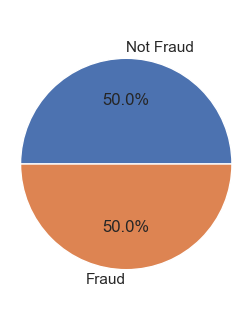

In [138]:
# Class imbalance check
plt.pie(y_df.value_counts(), labels=['Not Fraud', 'Fraud'], autopct='%0.1f%%')
plt.axis('equal')
plt.show()

In [139]:
del X_df, y_df, X_resampled, y_resampled
gc.collect()

2408

# Modeling Phase

In [140]:
y = data['isFraud']
X = data.drop(['isFraud'], axis = 1)

In [141]:
# Step 1: Split into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split the training set into training and validation sets (e.g., 75% train, 25% validation)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Now you have:
# X_train, y_train - training data
# X_val, y_val - validation data
# X_test, y_test - testing data

# Print the shapes of the splits to verify
print(f"Training set: {X_train.shape}, {y_train.shape}")
#print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (33060, 111), (33060,)
Testing set: (8266, 111), (8266,)


1/ Logistic Regression

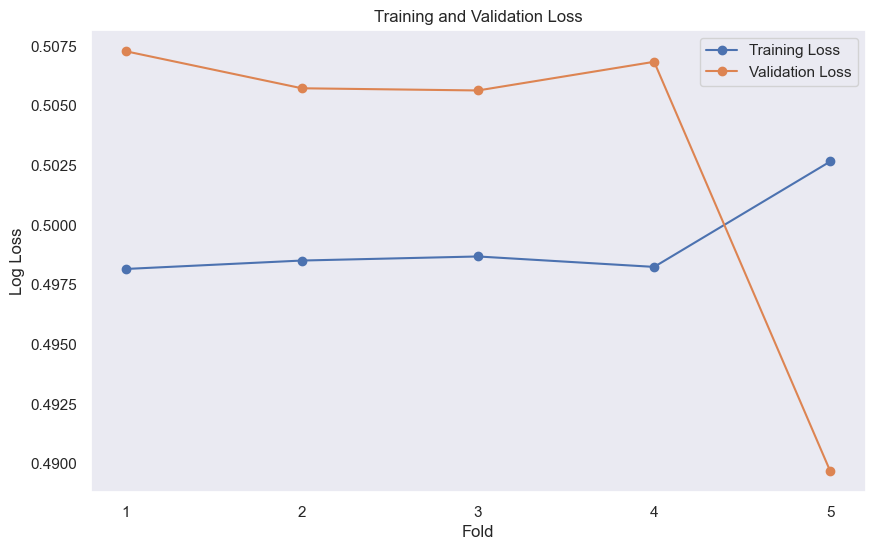

Average Training Loss: 0.4993
Average Validation Loss: 0.5030


In [142]:

from sklearn.model_selection import  StratifiedKFold
from sklearn.metrics import log_loss
# Step 2: Initialize Logistic Regression
lg_clf = LogisticRegression(solver='liblinear')

# Prepare for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store losses
train_losses = []
val_losses = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model on the training fold
    lg_clf.fit(X_train_fold, y_train_fold)

    # Predict probabilities
    y_train_pred_prob = lg_clf.predict_proba(X_train_fold)[:, 1]
    y_val_pred_prob = lg_clf.predict_proba(X_val_fold)[:, 1]

    # Calculate log loss for training and validation sets
    train_loss = log_loss(y_train_fold, y_train_pred_prob)
    val_loss = log_loss(y_val_fold, y_val_pred_prob)

    # Append losses to lists
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Calculate average losses
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)

# Step 3: Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Log Loss')
plt.xticks(range(1, len(train_losses) + 1))
plt.legend()
plt.grid()
plt.show()

# Print average losses
print(f"Average Training Loss: {avg_train_loss:.4f}")
print(f"Average Validation Loss: {avg_val_loss:.4f}")


In [143]:
y_test_pred_prob = lg_clf.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
recall_test = metrics.recall_score(y_test, y_test_pred)
precision_test = metrics.precision_score(y_test, y_test_pred)
f1_test = metrics.f1_score(y_test, y_test_pred)

log_loss_test = metrics.log_loss(y_test, y_test_pred_prob)

print("\nTesting Metrics:")
print("Accuracy    = {:.4f}".format(accuracy_test))
print("Recall      = {:.4f}".format(recall_test))
print("Precision   = {:.4f}".format(precision_test))
print("F1 Score    = {:.4f}".format(f1_test))
print("Log Loss    = {:.4f}".format(log_loss_test))


Testing Metrics:
Accuracy    = 0.7528
Recall      = 0.7226
Precision   = 0.7697
F1 Score    = 0.7454
Log Loss    = 0.5036


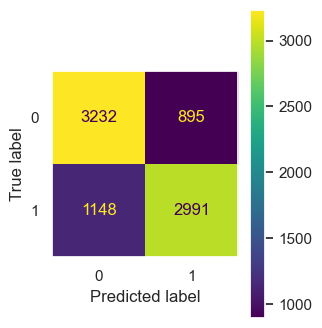

In [144]:
metrics.plot_confusion_matrix(lg_clf, X_test, y_test).ax_.grid(False)

In [145]:
pd.value_counts(y_test)

1    4139
0    4127
Name: isFraud, dtype: int64

0.8307132805004293


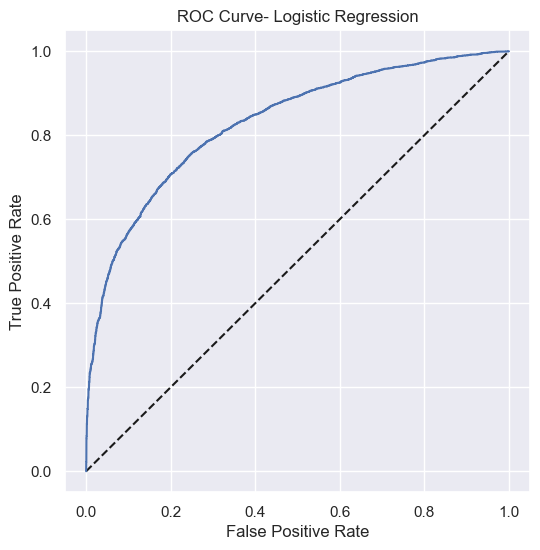

In [146]:
y_scores = lg_clf.predict_proba(X_test)

# calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores[:,1])
LGScore = metrics.auc(fpr, tpr)
print(LGScore)


# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- Logistic Regression')
plt.show()

In [147]:
#  Generate the classification report
class_report = metrics.classification_report(y_test, y_test_pred, output_dict=True)

#  Print the average F1 score
average_f1 = class_report['weighted avg']['f1-score']
print(f"Average F1 Score: {average_f1:.4f}")

# Optional: Display the full classification report
print("\nClassification Report:")
print( metrics.classification_report(y_test, y_test_pred))

Average F1 Score: 0.7526

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      4127
           1       0.77      0.72      0.75      4139

    accuracy                           0.75      8266
   macro avg       0.75      0.75      0.75      8266
weighted avg       0.75      0.75      0.75      8266



2/ Decision Tree Models

DecisionTreeClassifier

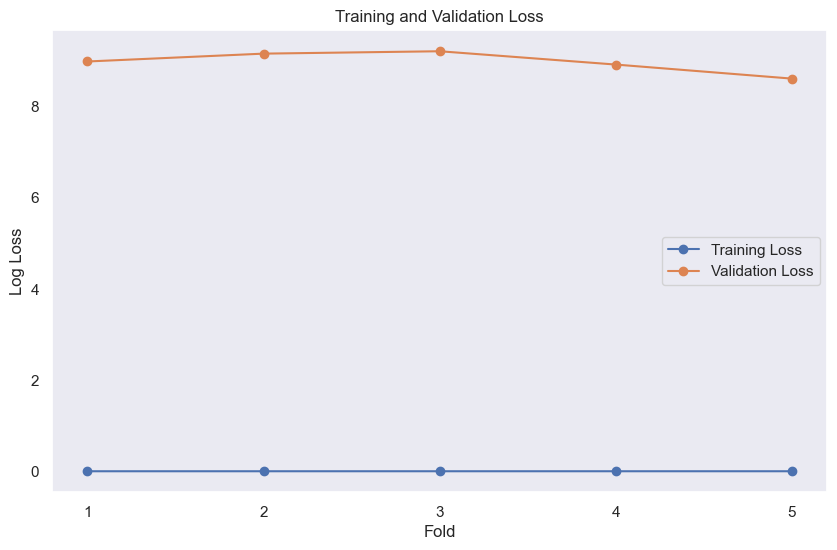

Average Training Loss: 0.0000
Average Validation Loss: 8.9807


In [148]:
dt_clf=DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

# Prepare for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store losses
train_losses = []
val_losses = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model on the training fold
    dt_clf.fit(X_train_fold, y_train_fold)

    # Predict probabilities
    y_train_pred_prob = dt_clf.predict_proba(X_train_fold)[:, 1]
    y_val_pred_prob = dt_clf.predict_proba(X_val_fold)[:, 1]

    # Calculate log loss for training and validation sets
    train_loss = log_loss(y_train_fold, y_train_pred_prob)
    val_loss = log_loss(y_val_fold, y_val_pred_prob)

    # Append losses to lists
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Calculate average losses
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)

# Step 3: Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Log Loss')
plt.xticks(range(1, len(train_losses) + 1))
plt.legend()
plt.grid()
plt.show()

# Print average losses
print(f"Average Training Loss: {avg_train_loss:.4f}")
print(f"Average Validation Loss: {avg_val_loss:.4f}")


very clear overfitting with decision tree

In [149]:
y_test_pred_prob = dt_clf.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
recall_test = metrics.recall_score(y_test, y_test_pred)
precision_test = metrics.precision_score(y_test, y_test_pred)
f1_test = metrics.f1_score(y_test, y_test_pred)

log_loss_test = metrics.log_loss(y_test, y_test_pred_prob)

print("\nTesting Metrics:")
print("Accuracy    = {:.4f}".format(accuracy_test))
print("Recall      = {:.4f}".format(recall_test))
print("Precision   = {:.4f}".format(precision_test))
print("F1 Score    = {:.4f}".format(f1_test))
print("Log Loss    = {:.4f}".format(log_loss_test))


Testing Metrics:
Accuracy    = 0.7486
Recall      = 0.7557
Precision   = 0.7456
F1 Score    = 0.7507
Log Loss    = 8.6788


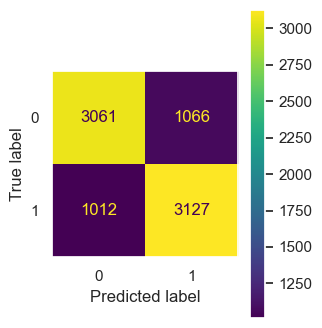

In [150]:
metrics.plot_confusion_matrix(dt_clf, X_test, y_test).ax_.grid(False)

0.7486587217290973


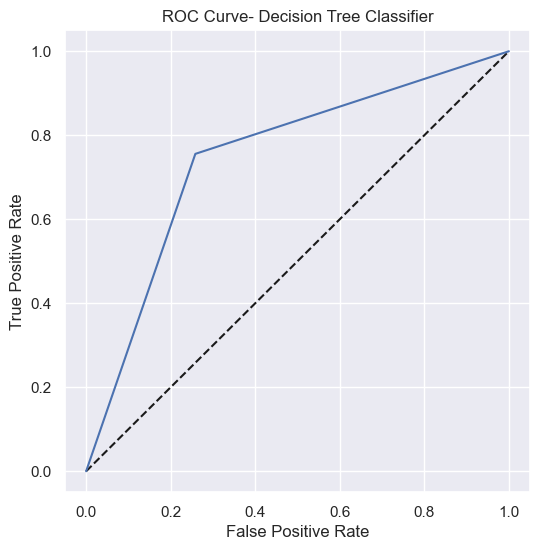

In [151]:
y_scores = dt_clf.predict_proba(X_test)

# calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores[:,1])
DTScore = metrics.auc(fpr, tpr)
print(DTScore)


# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- Decision Tree Classifier')
plt.show()

In [152]:
#  Generate the classification report
class_report = metrics.classification_report(y_test, y_test_pred, output_dict=True)

#  Print the average F1 score
average_f1 = class_report['weighted avg']['f1-score']
print(f"Average F1 Score: {average_f1:.4f}")

# Optional: Display the full classification report
print("\nClassification Report:")
print( metrics.classification_report(y_test, y_test_pred))

Average F1 Score: 0.7486

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      4127
           1       0.75      0.76      0.75      4139

    accuracy                           0.75      8266
   macro avg       0.75      0.75      0.75      8266
weighted avg       0.75      0.75      0.75      8266



RandomForestClassifier

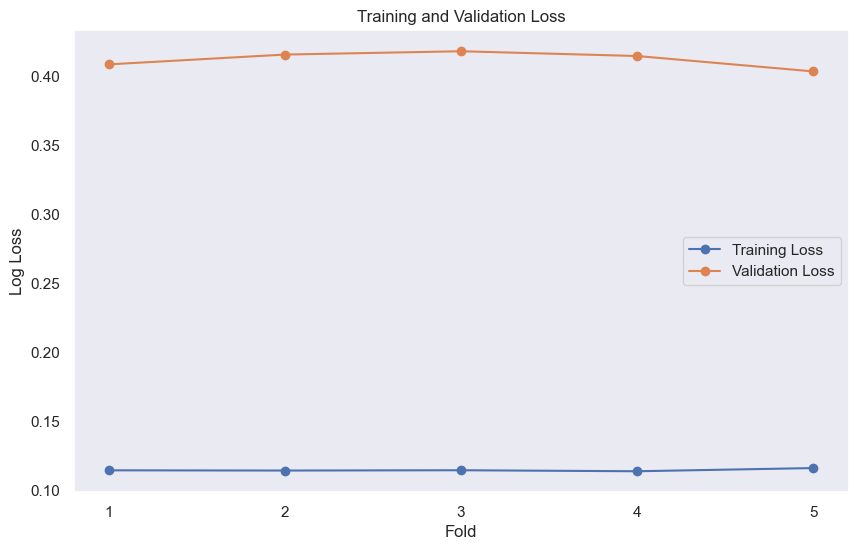

Average Training Loss: 0.1149
Average Validation Loss: 0.4124


In [153]:
rf_clf=RandomForestClassifier(criterion = 'entropy', random_state = 42)

# Prepare for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store losses
train_losses = []
val_losses = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model on the training fold
    rf_clf.fit(X_train_fold, y_train_fold)

    # Predict probabilities
    y_train_pred_prob = rf_clf.predict_proba(X_train_fold)[:, 1]
    y_val_pred_prob = rf_clf.predict_proba(X_val_fold)[:, 1]

    # Calculate log loss for training and validation sets
    train_loss = log_loss(y_train_fold, y_train_pred_prob)
    val_loss = log_loss(y_val_fold, y_val_pred_prob)

    # Append losses to lists
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Calculate average losses
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)

# Step 3: Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Log Loss')
plt.xticks(range(1, len(train_losses) + 1))
plt.legend()
plt.grid()
plt.show()

# Print average losses
print(f"Average Training Loss: {avg_train_loss:.4f}")
print(f"Average Validation Loss: {avg_val_loss:.4f}")


Overfitting with random Forest Classifier also

In [154]:
y_test_pred_prob = rf_clf.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
recall_test = metrics.recall_score(y_test, y_test_pred)
precision_test = metrics.precision_score(y_test, y_test_pred)
f1_test = metrics.f1_score(y_test, y_test_pred)

log_loss_test = metrics.log_loss(y_test, y_test_pred_prob)

print("\nTesting Metrics:")
print("Accuracy    = {:.4f}".format(accuracy_test))
print("Recall      = {:.4f}".format(recall_test))
print("Precision   = {:.4f}".format(precision_test))
print("F1 Score    = {:.4f}".format(f1_test))
print("Log Loss    = {:.4f}".format(log_loss_test))


Testing Metrics:
Accuracy    = 0.8224
Recall      = 0.8130
Precision   = 0.8290
F1 Score    = 0.8209
Log Loss    = 0.4119


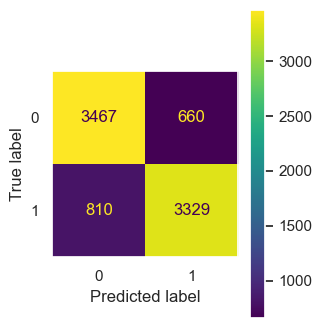

In [155]:
metrics.plot_confusion_matrix(rf_clf, X_test, y_test).ax_.grid(False)

0.9016629128340213


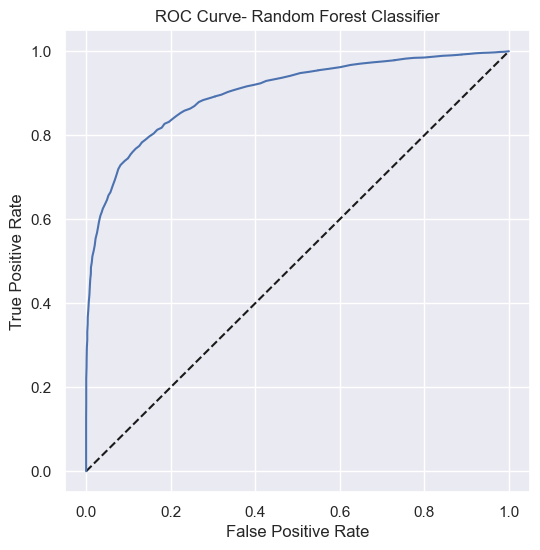

In [156]:
y_scores = rf_clf.predict_proba(X_test)

# calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores[:,1])
RFScore = metrics.auc(fpr, tpr)
print(RFScore)


# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- Random Forest Classifier')
plt.show()

In [157]:
#  Generate the classification report
class_report = metrics.classification_report(y_test, y_test_pred, output_dict=True)

#  Print the average F1 score
average_f1 = class_report['weighted avg']['f1-score']
print(f"Average F1 Score: {average_f1:.4f}")

# Optional: Display the full classification report
print("\nClassification Report:")
print( metrics.classification_report(y_test, y_test_pred))

Average F1 Score: 0.8224

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      4127
           1       0.83      0.81      0.82      4139

    accuracy                           0.82      8266
   macro avg       0.82      0.82      0.82      8266
weighted avg       0.82      0.82      0.82      8266



3/ Gradient Boosting Machines

Gradient Boosting Classifier

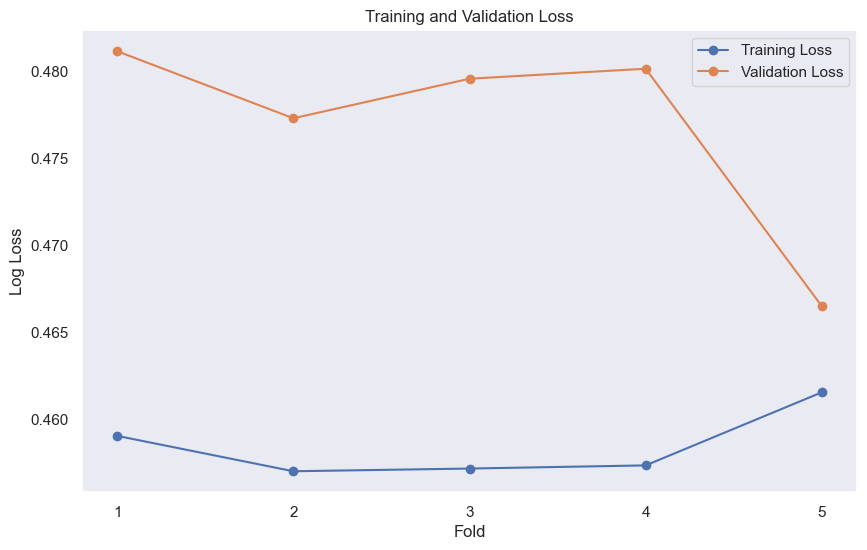

Average Training Loss: 0.4584
Average Validation Loss: 0.4770


In [158]:
gb_clf=GradientBoostingClassifier()

# Prepare for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store losses
train_losses = []
val_losses = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model on the training fold
    gb_clf.fit(X_train_fold, y_train_fold)

    # Predict probabilities
    y_train_pred_prob = gb_clf.predict_proba(X_train_fold)[:, 1]
    y_val_pred_prob = gb_clf.predict_proba(X_val_fold)[:, 1]

    # Calculate log loss for training and validation sets
    train_loss = log_loss(y_train_fold, y_train_pred_prob)
    val_loss = log_loss(y_val_fold, y_val_pred_prob)

    # Append losses to lists
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Calculate average losses
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)

# Step 3: Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Log Loss')
plt.xticks(range(1, len(train_losses) + 1))
plt.legend()
plt.grid()
plt.show()

# Print average losses
print(f"Average Training Loss: {avg_train_loss:.4f}")
print(f"Average Validation Loss: {avg_val_loss:.4f}")


In [159]:
y_test_pred_prob = gb_clf.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
recall_test = metrics.recall_score(y_test, y_test_pred)
precision_test = metrics.precision_score(y_test, y_test_pred)
f1_test = metrics.f1_score(y_test, y_test_pred)

log_loss_test = metrics.log_loss(y_test, y_test_pred_prob)

print("\nTesting Metrics:")
print("Accuracy    = {:.4f}".format(accuracy_test))
print("Recall      = {:.4f}".format(recall_test))
print("Precision   = {:.4f}".format(precision_test))
print("F1 Score    = {:.4f}".format(f1_test))
print("Log Loss    = {:.4f}".format(log_loss_test))


Testing Metrics:
Accuracy    = 0.7757
Recall      = 0.7444
Precision   = 0.7947
F1 Score    = 0.7687
Log Loss    = 0.4746


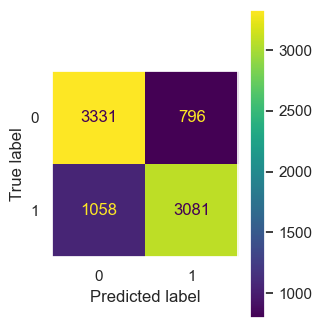

In [160]:
metrics.plot_confusion_matrix(gb_clf, X_test, y_test).ax_.grid(False)

0.8562864202896523


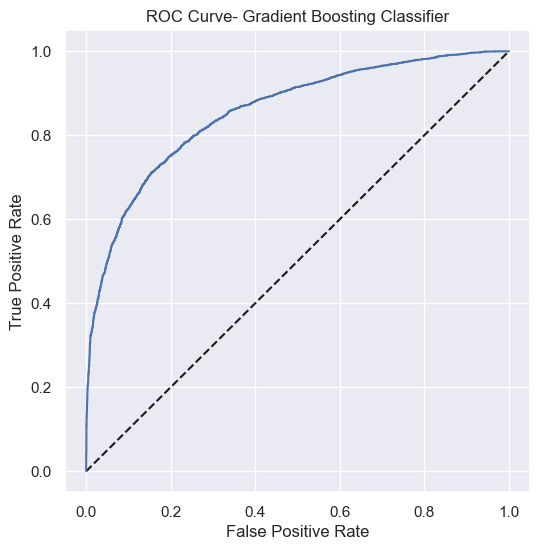

In [161]:
y_scores = gb_clf.predict_proba(X_test)

# calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores[:,1])
GBScore = metrics.auc(fpr, tpr)
print(GBScore)


# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- Gradient Boosting Classifier')
plt.show()

In [162]:
#  Generate the classification report
class_report = metrics.classification_report(y_test, y_test_pred, output_dict=True)

#  Print the average F1 score
average_f1 = class_report['weighted avg']['f1-score']
print(f"Average F1 Score: {average_f1:.4f}")

# Optional: Display the full classification report
print("\nClassification Report:")
print( metrics.classification_report(y_test, y_test_pred))

Average F1 Score: 0.7755

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      4127
           1       0.79      0.74      0.77      4139

    accuracy                           0.78      8266
   macro avg       0.78      0.78      0.78      8266
weighted avg       0.78      0.78      0.78      8266



4/ Support Vector Machines

SVC

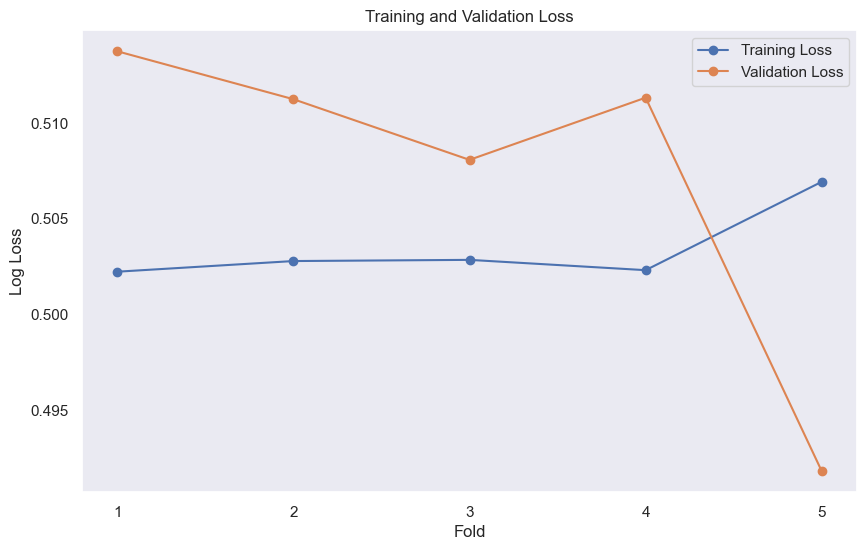

Average Training Loss: 0.5034
Average Validation Loss: 0.5072


In [163]:
svc_clf=SVC(kernel='linear',C=5,probability=True)

# Prepare for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store losses
train_losses = []
val_losses = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model on the training fold
    svc_clf.fit(X_train_fold, y_train_fold)

    # Predict probabilities
    y_train_pred_prob = svc_clf.predict_proba(X_train_fold)[:, 1]
    y_val_pred_prob = svc_clf.predict_proba(X_val_fold)[:, 1]

    # Calculate log loss for training and validation sets
    train_loss = log_loss(y_train_fold, y_train_pred_prob)
    val_loss = log_loss(y_val_fold, y_val_pred_prob)

    # Append losses to lists
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Calculate average losses
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)

# Step 3: Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Log Loss')
plt.xticks(range(1, len(train_losses) + 1))
plt.legend()
plt.grid()
plt.show()

# Print average losses
print(f"Average Training Loss: {avg_train_loss:.4f}")
print(f"Average Validation Loss: {avg_val_loss:.4f}")


In [164]:
y_test_pred_prob = svc_clf.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
recall_test = metrics.recall_score(y_test, y_test_pred)
precision_test = metrics.precision_score(y_test, y_test_pred)
f1_test = metrics.f1_score(y_test, y_test_pred)

log_loss_test = metrics.log_loss(y_test, y_test_pred_prob)

print("\nTesting Metrics:")
print("Accuracy    = {:.4f}".format(accuracy_test))
print("Recall      = {:.4f}".format(recall_test))
print("Precision   = {:.4f}".format(precision_test))
print("F1 Score    = {:.4f}".format(f1_test))
print("Log Loss    = {:.4f}".format(log_loss_test))


Testing Metrics:
Accuracy    = 0.7521
Recall      = 0.7154
Precision   = 0.7727
F1 Score    = 0.7429
Log Loss    = 0.5073


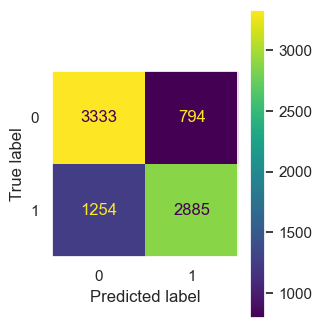

In [165]:
metrics.plot_confusion_matrix(svc_clf, X_test, y_test).ax_.grid(False)

0.8298761249862645


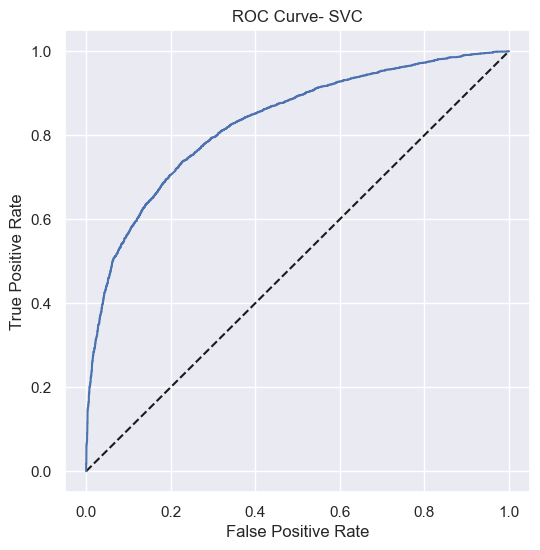

In [166]:
y_scores = svc_clf.predict_proba(X_test)

# calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores[:,1])
SVCScore = metrics.auc(fpr, tpr)
print(SVCScore)


# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- SVC')
plt.show()

In [167]:
#  Generate the classification report
class_report = metrics.classification_report(y_test, y_test_pred, output_dict=True)

#  Print the average F1 score
average_f1 = class_report['weighted avg']['f1-score']
print(f"Average F1 Score: {average_f1:.4f}")

# Optional: Display the full classification report
print("\nClassification Report:")
print( metrics.classification_report(y_test, y_test_pred))

Average F1 Score: 0.7518

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      4127
           1       0.77      0.72      0.74      4139

    accuracy                           0.75      8266
   macro avg       0.75      0.75      0.75      8266
weighted avg       0.75      0.75      0.75      8266



5/ K-Nearest Neighbors (KNN)

Text(0, 0.5, 'Error Rate')

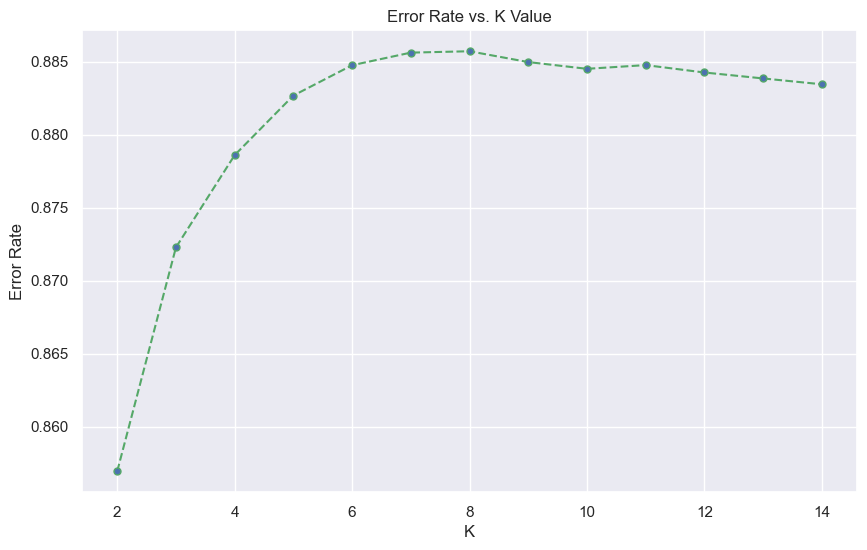

In [168]:
error_rate = []
for i in range(2,15):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train,y_train)
    pred_i = knn.predict_proba(X_test)
    error_rate.append(metrics.roc_auc_score(y_test, pred_i[:,1]))

plt.figure(figsize=(10,6))
plt.plot(range(2,15), error_rate,color='g', linestyle='dashed', marker='o', markerfacecolor='b', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

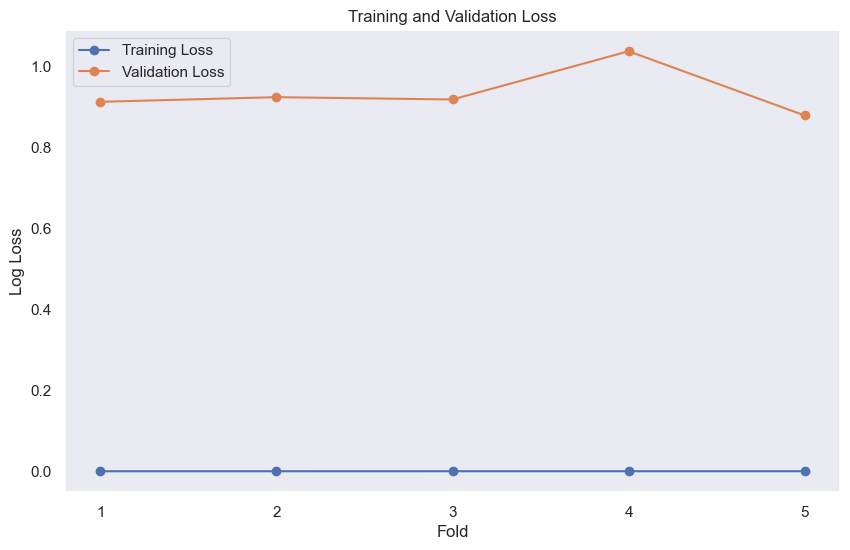

Average Training Loss: 0.0000
Average Validation Loss: 0.9333


In [169]:
knn_clf=KNeighborsClassifier(n_neighbors=9,weights='distance')

# Prepare for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store losses
train_losses = []
val_losses = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model on the training fold
    knn_clf.fit(X_train_fold, y_train_fold)

    # Predict probabilities
    y_train_pred_prob = knn_clf.predict_proba(X_train_fold)[:, 1]
    y_val_pred_prob = knn_clf.predict_proba(X_val_fold)[:, 1]

    # Calculate log loss for training and validation sets
    train_loss = log_loss(y_train_fold, y_train_pred_prob)
    val_loss = log_loss(y_val_fold, y_val_pred_prob)

    # Append losses to lists
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Calculate average losses
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)

# Step 3: Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Log Loss')
plt.xticks(range(1, len(train_losses) + 1))
plt.legend()
plt.grid()
plt.show()

# Print average losses
print(f"Average Training Loss: {avg_train_loss:.4f}")
print(f"Average Validation Loss: {avg_val_loss:.4f}")


a clear overfitting problem with KNN model

In [170]:
y_test_pred_prob = knn_clf.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
recall_test = metrics.recall_score(y_test, y_test_pred)
precision_test = metrics.precision_score(y_test, y_test_pred)
f1_test = metrics.f1_score(y_test, y_test_pred)

log_loss_test = metrics.log_loss(y_test, y_test_pred_prob)

print("\nTesting Metrics:")
print("Accuracy    = {:.4f}".format(accuracy_test))
print("Recall      = {:.4f}".format(recall_test))
print("Precision   = {:.4f}".format(precision_test))
print("F1 Score    = {:.4f}".format(f1_test))
print("Log Loss    = {:.4f}".format(log_loss_test))


Testing Metrics:
Accuracy    = 0.7916
Recall      = 0.8241
Precision   = 0.7742
F1 Score    = 0.7984
Log Loss    = 0.9742


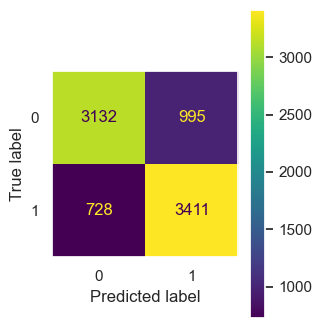

In [171]:
metrics.plot_confusion_matrix(knn_clf, X_test, y_test).ax_.grid(False)

0.8760545305539224


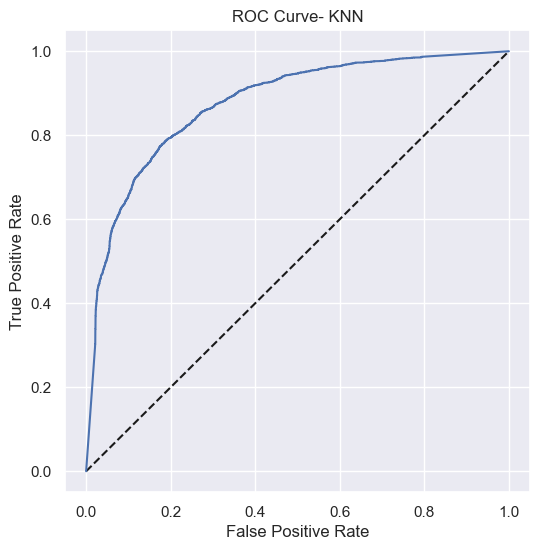

In [172]:
y_scores = knn_clf.predict_proba(X_test)

# calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores[:,1])
KNNScore = metrics.auc(fpr, tpr)
print(KNNScore)


# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- KNN')
plt.show()

In [173]:
#  Generate the classification report
class_report = metrics.classification_report(y_test, y_test_pred, output_dict=True)

#  Print the average F1 score
average_f1 = class_report['weighted avg']['f1-score']
print(f"Average F1 Score: {average_f1:.4f}")

# Optional: Display the full classification report
print("\nClassification Report:")
print( metrics.classification_report(y_test, y_test_pred))

Average F1 Score: 0.7913

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      4127
           1       0.77      0.82      0.80      4139

    accuracy                           0.79      8266
   macro avg       0.79      0.79      0.79      8266
weighted avg       0.79      0.79      0.79      8266



6/ Ensemble Learning (Bagging)

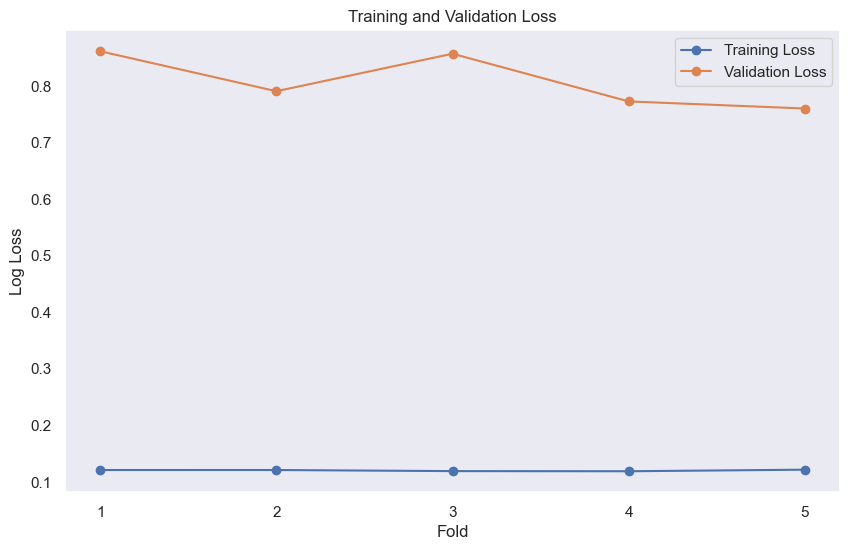

Average Training Loss: 0.1203
Average Validation Loss: 0.8084


In [174]:
bg_clf=BaggingClassifier()

# Prepare for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store losses
train_losses = []
val_losses = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model on the training fold
    bg_clf.fit(X_train_fold, y_train_fold)

    # Predict probabilities
    y_train_pred_prob = bg_clf.predict_proba(X_train_fold)[:, 1]
    y_val_pred_prob = bg_clf.predict_proba(X_val_fold)[:, 1]

    # Calculate log loss for training and validation sets
    train_loss = log_loss(y_train_fold, y_train_pred_prob)
    val_loss = log_loss(y_val_fold, y_val_pred_prob)

    # Append losses to lists
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Calculate average losses
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)

# Step 3: Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Log Loss')
plt.xticks(range(1, len(train_losses) + 1))
plt.legend()
plt.grid()
plt.show()

# Print average losses
print(f"Average Training Loss: {avg_train_loss:.4f}")
print(f"Average Validation Loss: {avg_val_loss:.4f}")


also here clear overfitting problem

In [175]:
y_test_pred_prob = bg_clf.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
recall_test = metrics.recall_score(y_test, y_test_pred)
precision_test = metrics.precision_score(y_test, y_test_pred)
f1_test = metrics.f1_score(y_test, y_test_pred)

log_loss_test = metrics.log_loss(y_test, y_test_pred_prob)

print("\nTesting Metrics:")
print("Accuracy    = {:.4f}".format(accuracy_test))
print("Recall      = {:.4f}".format(recall_test))
print("Precision   = {:.4f}".format(precision_test))
print("F1 Score    = {:.4f}".format(f1_test))
print("Log Loss    = {:.4f}".format(log_loss_test))


Testing Metrics:
Accuracy    = 0.7883
Recall      = 0.8217
Precision   = 0.7707
F1 Score    = 0.7954
Log Loss    = 0.8168


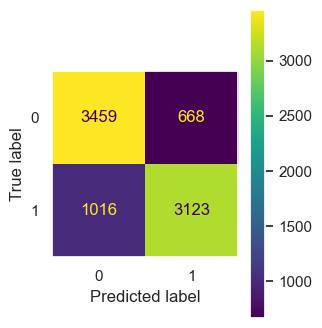

In [176]:
metrics.plot_confusion_matrix(bg_clf, X_test, y_test).ax_.grid(False)

0.8712364664005292


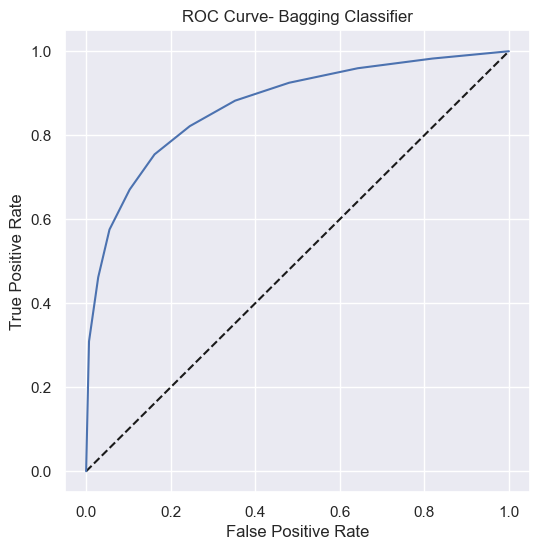

In [177]:
y_scores = bg_clf.predict_proba(X_test)

# calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores[:,1])
BScore = metrics.auc(fpr, tpr)
print(BScore)


# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- Bagging Classifier')
plt.show()

In [178]:
#  Generate the classification report
class_report = metrics.classification_report(y_test, y_test_pred, output_dict=True)

#  Print the average F1 score
average_f1 = class_report['weighted avg']['f1-score']
print(f"Average F1 Score: {average_f1:.4f}")

# Optional: Display the full classification report
print("\nClassification Report:")
print( metrics.classification_report(y_test, y_test_pred))

Average F1 Score: 0.7880

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      4127
           1       0.77      0.82      0.80      4139

    accuracy                           0.79      8266
   macro avg       0.79      0.79      0.79      8266
weighted avg       0.79      0.79      0.79      8266



7/  Naive Bayes

 Gaussian Naive Bayes (GaussianNB)

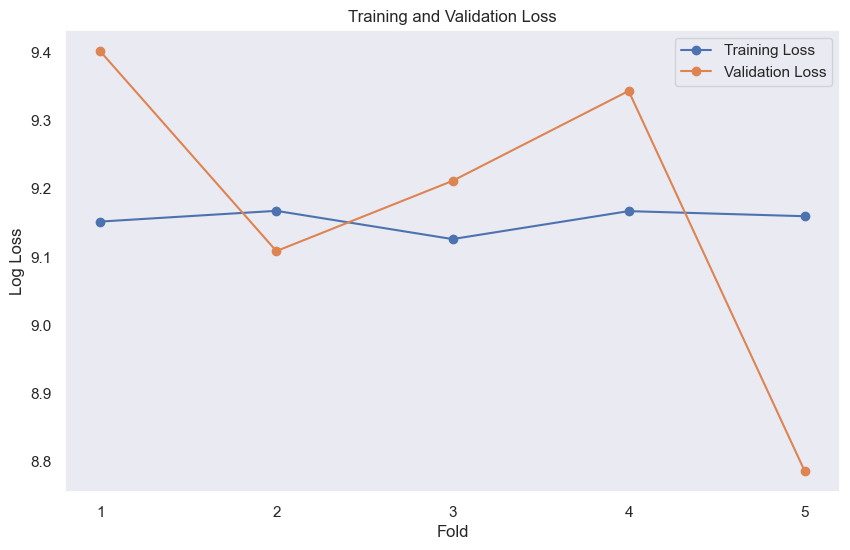

Average Training Loss: 9.1545
Average Validation Loss: 9.1702


In [179]:
gnb_clf=naive_bayes.GaussianNB()

# Prepare for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store losses
train_losses = []
val_losses = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model on the training fold
    gnb_clf.fit(X_train_fold, y_train_fold)

    # Predict probabilities
    y_train_pred_prob = gnb_clf.predict_proba(X_train_fold)[:, 1]
    y_val_pred_prob = gnb_clf.predict_proba(X_val_fold)[:, 1]

    # Calculate log loss for training and validation sets
    train_loss = log_loss(y_train_fold, y_train_pred_prob)
    val_loss = log_loss(y_val_fold, y_val_pred_prob)

    # Append losses to lists
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Calculate average losses
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)

# Step 3: Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Log Loss')
plt.xticks(range(1, len(train_losses) + 1))
plt.legend()
plt.grid()
plt.show()

# Print average losses
print(f"Average Training Loss: {avg_train_loss:.4f}")
print(f"Average Validation Loss: {avg_val_loss:.4f}")


In [180]:
y_test_pred_prob = gnb_clf.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
recall_test = metrics.recall_score(y_test, y_test_pred)
precision_test = metrics.precision_score(y_test, y_test_pred)
f1_test = metrics.f1_score(y_test, y_test_pred)

log_loss_test = metrics.log_loss(y_test, y_test_pred_prob)

print("\nTesting Metrics:")
print("Accuracy    = {:.4f}".format(accuracy_test))
print("Recall      = {:.4f}".format(recall_test))
print("Precision   = {:.4f}".format(precision_test))
print("F1 Score    = {:.4f}".format(f1_test))
print("Log Loss    = {:.4f}".format(log_loss_test))


Testing Metrics:
Accuracy    = 0.6752
Recall      = 0.5202
Precision   = 0.7549
F1 Score    = 0.6159
Log Loss    = 9.0971


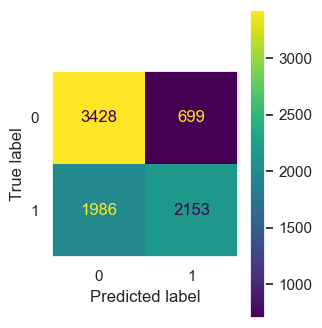

In [181]:
metrics.plot_confusion_matrix(gnb_clf, X_test, y_test).ax_.grid(False)

0.7489181813961447


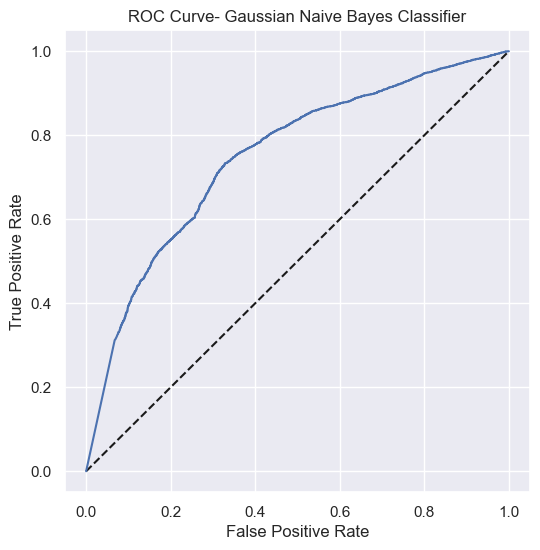

In [182]:
y_scores = gnb_clf.predict_proba(X_test)

# calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores[:,1])
GNBScore = metrics.auc(fpr, tpr)
print(GNBScore)


# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- Gaussian Naive Bayes Classifier')
plt.show()

In [183]:
#  Generate the classification report
class_report = metrics.classification_report(y_test, y_test_pred, output_dict=True)

#  Print the average F1 score
average_f1 = class_report['weighted avg']['f1-score']
print(f"Average F1 Score: {average_f1:.4f}")

# Optional: Display the full classification report
print("\nClassification Report:")
print( metrics.classification_report(y_test, y_test_pred))

Average F1 Score: 0.6672

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.83      0.72      4127
           1       0.75      0.52      0.62      4139

    accuracy                           0.68      8266
   macro avg       0.69      0.68      0.67      8266
weighted avg       0.69      0.68      0.67      8266



Bernoulli Naive Bayes (BernoulliNB)

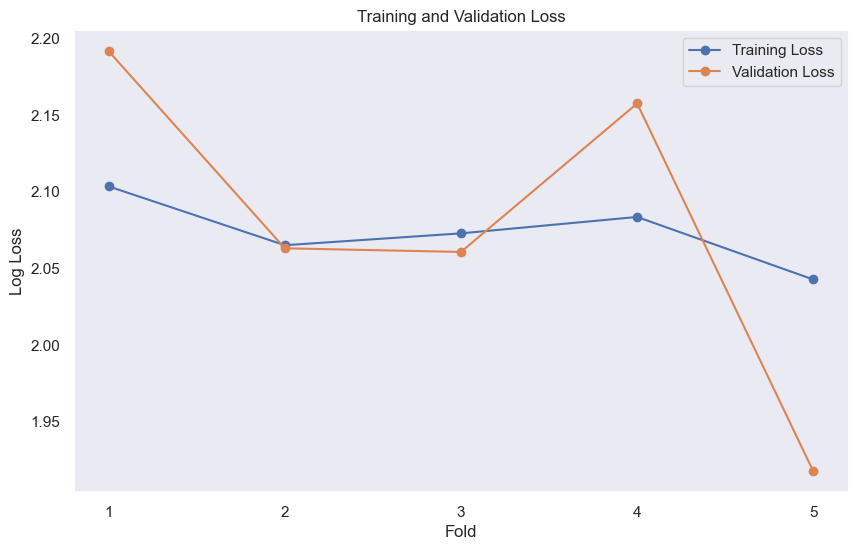

Average Training Loss: 2.0735
Average Validation Loss: 2.0781


In [184]:
bnb_clf=naive_bayes.BernoulliNB()

# Prepare for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store losses
train_losses = []
val_losses = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model on the training fold
    bnb_clf.fit(X_train_fold, y_train_fold)

    # Predict probabilities
    y_train_pred_prob = bnb_clf.predict_proba(X_train_fold)[:, 1]
    y_val_pred_prob = bnb_clf.predict_proba(X_val_fold)[:, 1]

    # Calculate log loss for training and validation sets
    train_loss = log_loss(y_train_fold, y_train_pred_prob)
    val_loss = log_loss(y_val_fold, y_val_pred_prob)

    # Append losses to lists
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Calculate average losses
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)

# Step 3: Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Log Loss')
plt.xticks(range(1, len(train_losses) + 1))
plt.legend()
plt.grid()
plt.show()

# Print average losses
print(f"Average Training Loss: {avg_train_loss:.4f}")
print(f"Average Validation Loss: {avg_val_loss:.4f}")


In [185]:
y_test_pred_prob = bnb_clf.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
recall_test = metrics.recall_score(y_test, y_test_pred)
precision_test = metrics.precision_score(y_test, y_test_pred)
f1_test = metrics.f1_score(y_test, y_test_pred)

log_loss_test = metrics.log_loss(y_test, y_test_pred_prob)

print("\nTesting Metrics:")
print("Accuracy    = {:.4f}".format(accuracy_test))
print("Recall      = {:.4f}".format(recall_test))
print("Precision   = {:.4f}".format(precision_test))
print("F1 Score    = {:.4f}".format(f1_test))
print("Log Loss    = {:.4f}".format(log_loss_test))


Testing Metrics:
Accuracy    = 0.6673
Recall      = 0.5634
Precision   = 0.7121
F1 Score    = 0.6291
Log Loss    = 2.0259


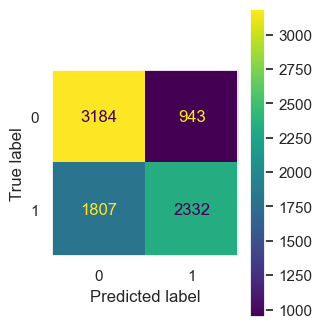

In [186]:
metrics.plot_confusion_matrix(bnb_clf, X_test, y_test).ax_.grid(False)

0.7488612489669473


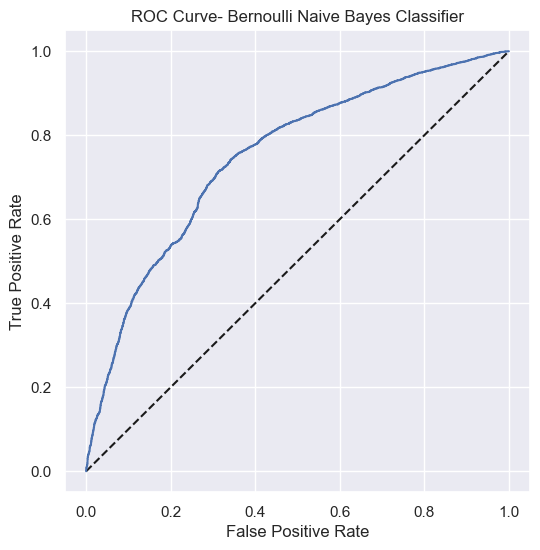

In [187]:
y_scores = bnb_clf.predict_proba(X_test)

# calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores[:,1])
BNBScore = metrics.auc(fpr, tpr)
print(BNBScore)


# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- Bernoulli Naive Bayes Classifier')
plt.show()

In [188]:
#  Generate the classification report
class_report = metrics.classification_report(y_test, y_test_pred, output_dict=True)

#  Print the average F1 score
average_f1 = class_report['weighted avg']['f1-score']
print(f"Average F1 Score: {average_f1:.4f}")

# Optional: Display the full classification report
print("\nClassification Report:")
print( metrics.classification_report(y_test, y_test_pred))

Average F1 Score: 0.6637

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      4127
           1       0.71      0.56      0.63      4139

    accuracy                           0.67      8266
   macro avg       0.68      0.67      0.66      8266
weighted avg       0.68      0.67      0.66      8266



8/ Deep Learning Model (MLPClassifier)

In [189]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(f"Validation set: {X_val.shape}, {y_val.shape}")

Validation set: (8265, 111), (8265,)


Epoch 1/100 - Training Loss: 0.7447, Validation Loss: 0.6791
Epoch 2/100 - Training Loss: 0.6689, Validation Loss: 0.6592
Epoch 3/100 - Training Loss: 0.6515, Validation Loss: 0.6432
Epoch 4/100 - Training Loss: 0.6351, Validation Loss: 0.6281
Epoch 5/100 - Training Loss: 0.6204, Validation Loss: 0.6160
Epoch 6/100 - Training Loss: 0.6091, Validation Loss: 0.6068
Epoch 7/100 - Training Loss: 0.6007, Validation Loss: 0.5999
Epoch 8/100 - Training Loss: 0.5943, Validation Loss: 0.5945
Epoch 9/100 - Training Loss: 0.5890, Validation Loss: 0.5900
Epoch 10/100 - Training Loss: 0.5846, Validation Loss: 0.5860
Epoch 11/100 - Training Loss: 0.5808, Validation Loss: 0.5825
Epoch 12/100 - Training Loss: 0.5775, Validation Loss: 0.5794
Epoch 13/100 - Training Loss: 0.5746, Validation Loss: 0.5767
Epoch 14/100 - Training Loss: 0.5720, Validation Loss: 0.5742
Epoch 15/100 - Training Loss: 0.5697, Validation Loss: 0.5720
Epoch 16/100 - Training Loss: 0.5676, Validation Loss: 0.5700
Epoch 17/100 - Tr

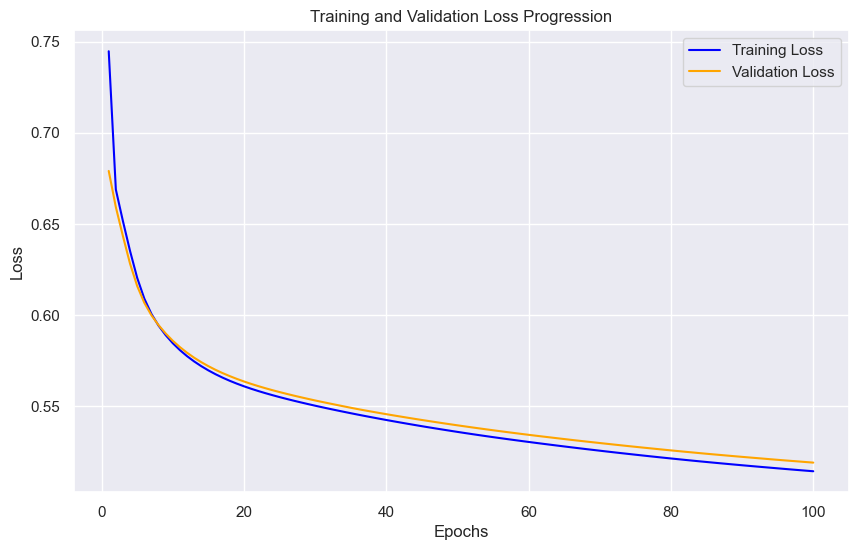

In [190]:
# Initialize the MLPClassifier with parameters to monitor training loss
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='sgd', max_iter=1,
                        warm_start=True, random_state=42,alpha=0.01)

# Lists to store the loss progression
train_loss_progression = []
val_loss_progression = []

# Number of epochs for training
epochs = 100

# Training loop for manually updating epochs and storing losses
for epoch in range(epochs):
    # Train the model for one iteration (one epoch)
    mlp_clf.fit(X_train, y_train)
    
    # Store the training loss
    train_loss_progression.append(mlp_clf.loss_)

    # Calculate validation loss (using cross-entropy)
    val_pred_probs = mlp_clf.predict_proba(X_val)
    val_loss = -np.mean([np.log(val_pred_probs[i, label]) for i, label in enumerate(y_val)])
    val_loss_progression.append(val_loss)

    print(f'Epoch {epoch + 1}/{epochs} - Training Loss: {mlp_clf.loss_:.4f}, Validation Loss: {val_loss:.4f}')

# Plotting the training and validation loss progression
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_loss_progression, label='Training Loss', color='blue')
plt.plot(range(1, epochs + 1), val_loss_progression, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Progression')
plt.legend()
plt.show()

For only 100 iteration to train our ANN, we have very good results so that our model's losses (training and validation) are decreasing significantly.
Ceartainly , considering this model and to be improved.

In [191]:
y_test_pred_prob = mlp_clf.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
recall_test = metrics.recall_score(y_test, y_test_pred)
precision_test = metrics.precision_score(y_test, y_test_pred)
f1_test = metrics.f1_score(y_test, y_test_pred)

log_loss_test = metrics.log_loss(y_test, y_test_pred_prob)

print("\nTesting Metrics:")
print("Accuracy    = {:.4f}".format(accuracy_test))
print("Recall      = {:.4f}".format(recall_test))
print("Precision   = {:.4f}".format(precision_test))
print("F1 Score    = {:.4f}".format(f1_test))
print("Log Loss    = {:.4f}".format(log_loss_test))


Testing Metrics:
Accuracy    = 0.7445
Recall      = 0.7386
Precision   = 0.7480
F1 Score    = 0.7433
Log Loss    = 0.5201


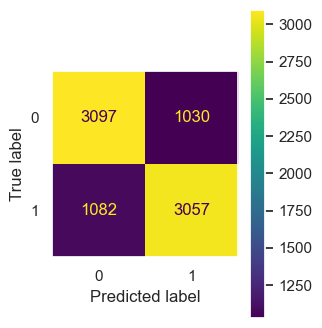

In [192]:
metrics.plot_confusion_matrix(mlp_clf, X_test, y_test).ax_.grid(False)

0.81891395405351


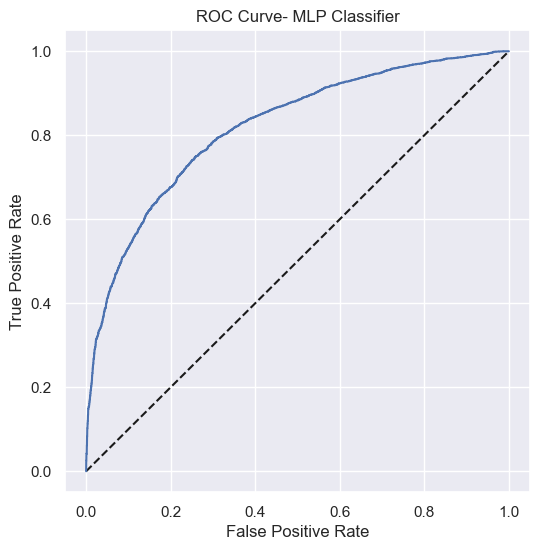

In [193]:
y_scores = mlp_clf.predict_proba(X_test)

# calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores[:,1])
MLPScore = metrics.auc(fpr, tpr)
print(MLPScore)


# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- MLP Classifier')
plt.show()

In [194]:
#  Generate the classification report
class_report = metrics.classification_report(y_test, y_test_pred, output_dict=True)

#  Print the average F1 score
average_f1 = class_report['weighted avg']['f1-score']
print(f"Average F1 Score: {average_f1:.4f}")

# Optional: Display the full classification report
print("\nClassification Report:")
print( metrics.classification_report(y_test, y_test_pred))

Average F1 Score: 0.7445

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      4127
           1       0.75      0.74      0.74      4139

    accuracy                           0.74      8266
   macro avg       0.74      0.74      0.74      8266
weighted avg       0.74      0.74      0.74      8266



# Evaluation Phase

1/ Comparing our trained models

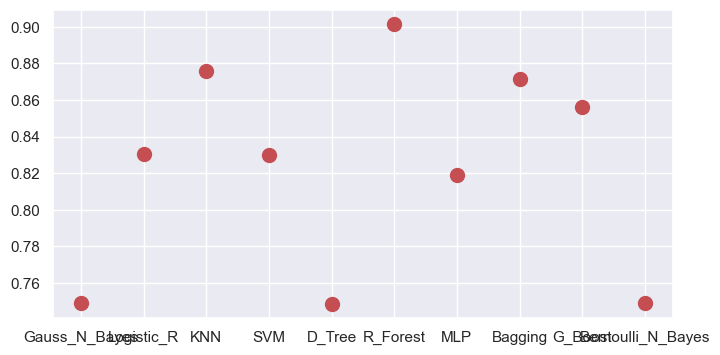

In [195]:
plt.figure(figsize=(8, 4))
plt.plot(['Gauss_N_Bayes', 'Logistic_R', 'KNN', 'SVM', 'D_Tree', 'R_Forest', 'MLP', 'Bagging', 'G_Boost','Bernoulli_N_Bayes'],
         [GNBScore, LGScore, KNNScore, SVCScore, DTScore, RFScore, MLPScore, BScore, GBScore, BNBScore], 'ro', markersize=10)

plt.show()

In [196]:
gc.collect()

86043

Top 2 models to be optimized and fine tune their hyperparameters to then compaire them again and choose the best one for this task are:

RandomForestClassifier 

MLPClassifier

KNN Classifier

2/ Hyperparameters Finetuning

2.1/ RandomForest

In [197]:
start = time.time()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

rf = RandomForestClassifier()

param_grid = {'bootstrap': [False, True],
              'criterion': ['entropy', 'gini', 'log_loss'],
              'max_depth': range(50, 300, 50),
              'max_features': ['sqrt', 'auto'],
              'min_samples_leaf': [1, 3, 5],
              'min_samples_split': range(2, 11, 2),
              'n_estimators': range(200, 1500, 50)
             }

RF_clf = RandomizedSearchCV(estimator = rf,
                            n_iter = 100,
                            param_distributions = param_grid,
                            scoring = 'roc_auc',
                            cv= 2,
                            verbose=2,
                            n_jobs = -1)

RF_clf.fit(X_train, y_train)
print('Best parameters found:\n', RF_clf.best_params_)
print('ROC_AUC Best score :\n', RF_clf.best_score_)

print('Time Spent:', time.time() - start)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best parameters found:
 {'n_estimators': 1250, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'criterion': 'gini', 'bootstrap': True}
ROC_AUC Best score :
 0.8822726185392539
Time Spent: 1440.9865472316742


In [198]:
best_params = RF_clf.best_estimator_
y_hat = best_params.predict(X_test)
y_scores = best_params.predict_proba(X_test)

print('accuracy: ', metrics.accuracy_score(y_test, y_hat))
print('precision: ', metrics.precision_score(y_test, y_hat, average='weighted'))
print('recal: ', metrics.recall_score(y_test, y_hat, average='weighted'))
print('f1 score: ', metrics.f1_score(y_test, y_hat, average='weighted'))

print('ROC AUC Score: ', metrics.roc_auc_score(y_test, y_scores[:,1]))

accuracy:  0.8288811459543167
precision:  0.8292659992436152
recal:  0.8288811459543167
f1 score:  0.82886971968028
ROC AUC Score:  0.9059433013885623


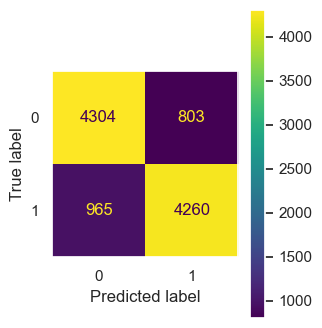

In [199]:
RF_model = best_params

metrics.plot_confusion_matrix(RF_model, X_test, y_test).ax_.grid(False)

0.9059433013885623


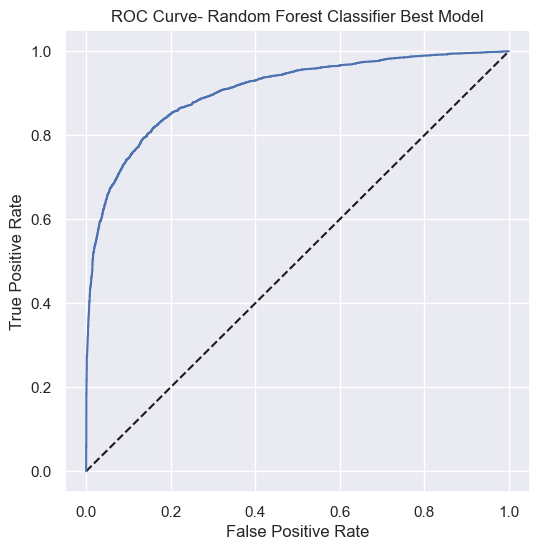

In [200]:
y_scores = RF_model.predict_proba(X_test)

# calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores[:,1])
RFBScore = metrics.auc(fpr, tpr)
print(RFBScore)


# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- Random Forest Classifier Best Model')
plt.show()

2.2/ KNN Classifier

In [201]:
start = time.time()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

knn = KNeighborsClassifier()

param_grid = {'leaf_size': [30,40,50,60],
              'n_neighbors': range(5,50,5),
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p':[3,4,5,6]
             }

KNN_clf = RandomizedSearchCV(estimator = knn,
                            n_iter = 100,
                            param_distributions = param_grid,
                            scoring = 'roc_auc',
                            cv= 2,
                            verbose=2,
                            n_jobs = -1)

KNN_clf.fit(X_train, y_train)
print('Best parameters found:\n', KNN_clf.best_params_)
print('ROC_AUC Best score :\n', KNN_clf.best_score_)

print('Time Spent:', time.time() - start)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best parameters found:
 {'weights': 'uniform', 'p': 6, 'n_neighbors': 5, 'leaf_size': 40, 'algorithm': 'kd_tree'}
ROC_AUC Best score :
 0.8219746036793596
Time Spent: 8179.186944723129


In [202]:
best_params = KNN_clf.best_estimator_
y_hat = best_params.predict(X_test)
y_scores = best_params.predict_proba(X_test)

print('accuracy: ', metrics.accuracy_score(y_test, y_hat))
print('precision: ', metrics.precision_score(y_test, y_hat, average='weighted'))
print('recal: ', metrics.recall_score(y_test, y_hat, average='weighted'))
print('f1 score: ', metrics.f1_score(y_test, y_hat, average='weighted'))

print('ROC AUC Score: ', metrics.roc_auc_score(y_test, y_scores[:,1]))

accuracy:  0.7806813782423538
precision:  0.7818350982657406
recal:  0.7806813782423538
f1 score:  0.7803373775804378
ROC AUC Score:  0.8532143047866565


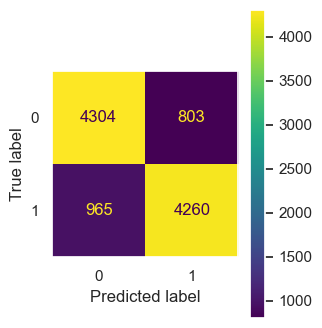

In [203]:
KNN_model = best_params

metrics.plot_confusion_matrix(RF_model, X_test, y_test).ax_.grid(False)

0.8532143047866565


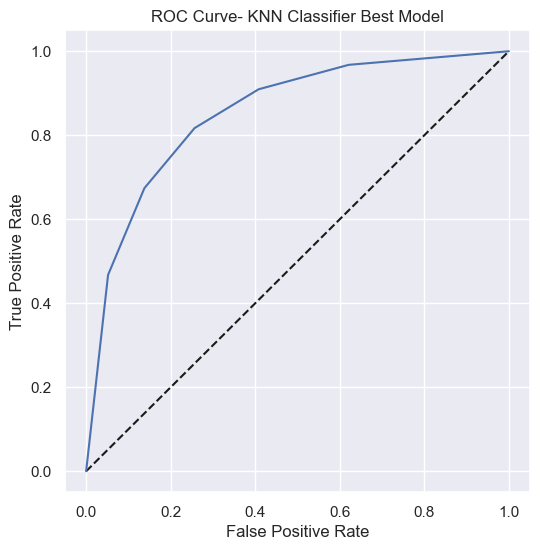

In [204]:
y_scores = KNN_model.predict_proba(X_test)

# calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores[:,1])
KNNBScore = metrics.auc(fpr, tpr)
print(KNNBScore)


# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- KNN Classifier Best Model')
plt.show()

2.3/ MLP Classifier

Epoch 1/1000 - Training Loss: 0.7310, Validation Loss: 0.6719
Epoch 2/1000 - Training Loss: 0.6618, Validation Loss: 0.6508
Epoch 3/1000 - Training Loss: 0.6415, Validation Loss: 0.6316
Epoch 4/1000 - Training Loss: 0.6231, Validation Loss: 0.6161
Epoch 5/1000 - Training Loss: 0.6094, Validation Loss: 0.6051
Epoch 6/1000 - Training Loss: 0.5998, Validation Loss: 0.5971
Epoch 7/1000 - Training Loss: 0.5927, Validation Loss: 0.5909
Epoch 8/1000 - Training Loss: 0.5870, Validation Loss: 0.5857
Epoch 9/1000 - Training Loss: 0.5823, Validation Loss: 0.5813
Epoch 10/1000 - Training Loss: 0.5783, Validation Loss: 0.5775
Epoch 11/1000 - Training Loss: 0.5748, Validation Loss: 0.5742
Epoch 12/1000 - Training Loss: 0.5717, Validation Loss: 0.5713
Epoch 13/1000 - Training Loss: 0.5691, Validation Loss: 0.5687
Epoch 14/1000 - Training Loss: 0.5667, Validation Loss: 0.5664
Epoch 15/1000 - Training Loss: 0.5646, Validation Loss: 0.5644
Epoch 16/1000 - Training Loss: 0.5627, Validation Loss: 0.5625
E

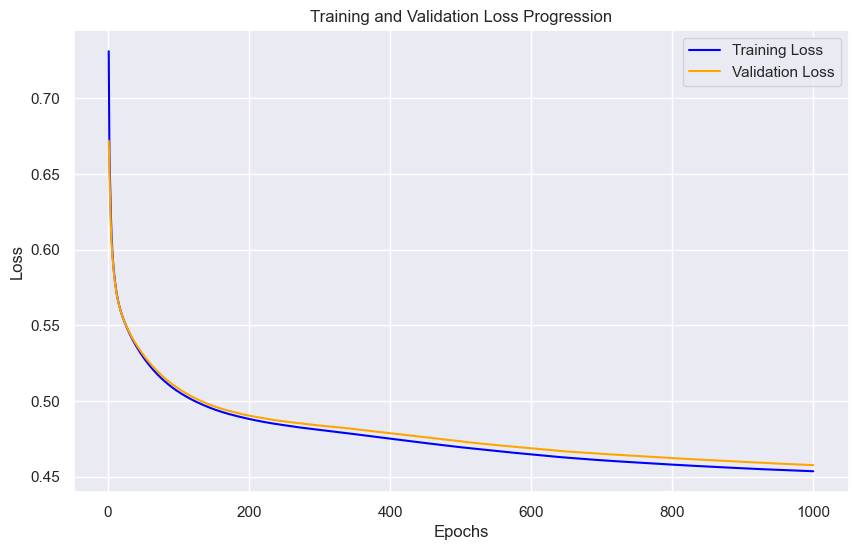

In [205]:
# Initialize the MLPClassifier with parameters to monitor training loss
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='sgd', max_iter=1,
                        warm_start=True, random_state=42,alpha=0.01)

# Lists to store the loss progression
train_loss_progression = []
val_loss_progression = []

# Number of epochs for training
epochs = 1000

# Training loop for manually updating epochs and storing losses
for epoch in range(epochs):
    # Train the model for one iteration (one epoch)
    mlp_clf.fit(X_train, y_train)
    
    # Store the training loss
    train_loss_progression.append(mlp_clf.loss_)

    # Calculate validation loss (using cross-entropy)
    val_pred_probs = mlp_clf.predict_proba(X_val)
    val_loss = -np.mean([np.log(val_pred_probs[i, label]) for i, label in enumerate(y_val)])
    val_loss_progression.append(val_loss)

    print(f'Epoch {epoch + 1}/{epochs} - Training Loss: {mlp_clf.loss_:.4f}, Validation Loss: {val_loss:.4f}')

# Plotting the training and validation loss progression
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_loss_progression, label='Training Loss', color='blue')
plt.plot(range(1, epochs + 1), val_loss_progression, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Progression')
plt.legend()
plt.show()

In [206]:
y_test_pred_prob = mlp_clf.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
recall_test = metrics.recall_score(y_test, y_test_pred)
precision_test = metrics.precision_score(y_test, y_test_pred)
f1_test = metrics.f1_score(y_test, y_test_pred)

log_loss_test = metrics.log_loss(y_test, y_test_pred_prob)

print("\nTesting Metrics:")
print("Accuracy    = {:.4f}".format(accuracy_test))
print("Recall      = {:.4f}".format(recall_test))
print("Precision   = {:.4f}".format(precision_test))
print("F1 Score    = {:.4f}".format(f1_test))
print("Log Loss    = {:.4f}".format(log_loss_test))


Testing Metrics:
Accuracy    = 0.7770
Recall      = 0.7522
Precision   = 0.7957
F1 Score    = 0.7733
Log Loss    = 0.4710


We inceased the number of epochs to 1000 and what we remark is that the log_loss decreased  and the metrics are better than with 100 epochs.

In [207]:
# Define parameter grid with a range for max_iter as the equivalent of epochs
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],  # Different hidden layer sizes
    'activation': ['relu', 'tanh'],                # Trying different activations
    'solver': ['sgd', 'adam','lbfgs'],                     # Different solvers
    'alpha': [0.01, 0.001, 0.0001],                # Different regularization strengths
    'learning_rate': ['constant', 'adaptive'],     # Learning rate scheduling
    'max_iter': [1000,2000, 10000]                   # Equivalent of number of epochs
}

# Initialize the MLPClassifier
MLP = MLPClassifier(random_state=42)

# Set up the grid search
grid_search = RandomizedSearchCV(estimator = MLP,
                            n_iter = 100,
                            param_distributions = param_grid,
                            scoring = 'roc_auc',
                            cv= 2,
                            verbose=2,
                            n_jobs = -1)

# Fit grid search
grid_search.fit(X_train, y_train)

# Output the best parameters and estimator
print("Best parameters found:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)

# Evaluate the best model on validation data
best_model = grid_search.best_estimator_
val_accuracy = best_model.score(X_val, y_val)
print(f'Validation Accuracy of Best Model: {val_accuracy:.4f}')


Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best parameters found: {'solver': 'adam', 'max_iter': 2000, 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.01, 'activation': 'tanh'}
Best estimator: MLPClassifier(activation='tanh', alpha=0.01, max_iter=2000, random_state=42)
Validation Accuracy of Best Model: 0.8771


In [208]:
best_params = grid_search.best_estimator_
y_hat = best_params.predict(X_test)
y_scores = best_params.predict_proba(X_test)

print('accuracy: ', metrics.accuracy_score(y_test, y_hat))
print('precision: ', metrics.precision_score(y_test, y_hat, average='weighted'))
print('recal: ', metrics.recall_score(y_test, y_hat, average='weighted'))
print('f1 score: ', metrics.f1_score(y_test, y_hat, average='weighted'))

print('ROC AUC Score: ', metrics.roc_auc_score(y_test, y_scores[:,1]))

accuracy:  0.8079752226093689
precision:  0.8081675474952452
recal:  0.8079752226093689
f1 score:  0.8079764314189535
ROC AUC Score:  0.8828338625191243


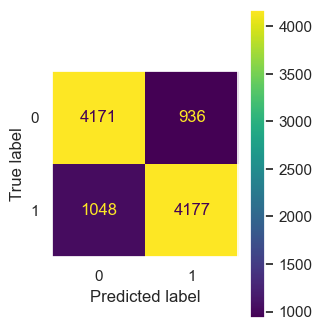

In [209]:
MLP_model = best_params

metrics.plot_confusion_matrix(MLP_model, X_test, y_test).ax_.grid(False)

0.8828338625191243


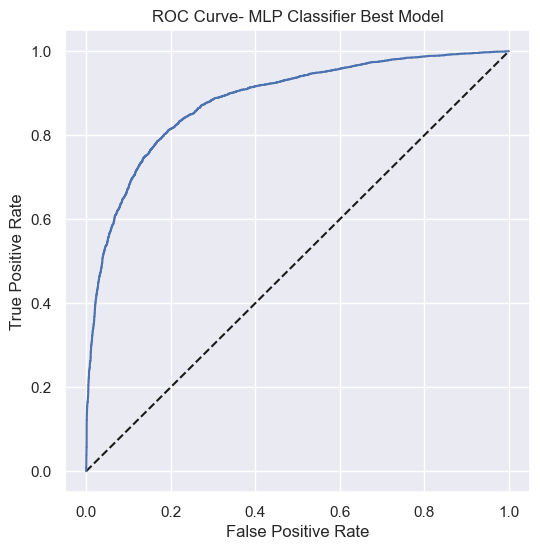

In [210]:
y_scores = MLP_model.predict_proba(X_test)

# calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores[:,1])
MLPBScore = metrics.auc(fpr, tpr)
print(MLPBScore)


# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- MLP Classifier Best Model')
plt.show()

3/ Last Comparision between models

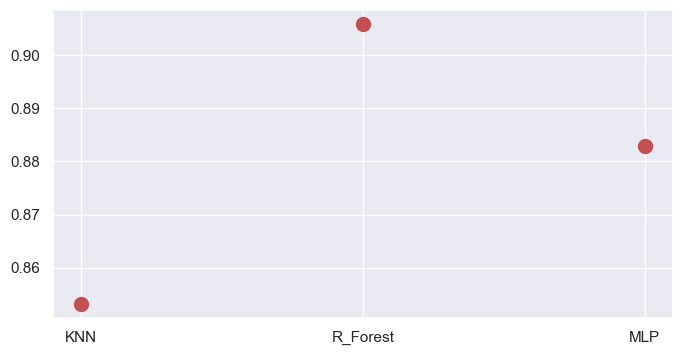

In [211]:
plt.figure(figsize=(8, 4))
plt.plot([ 'KNN', 'R_Forest', 'MLP'],
         [ KNNBScore, RFBScore, MLPBScore], 'ro', markersize=10)

plt.show()

As we can see , the best model is random forest classifier

# PipeLine and HyperParameters Tuning

In [6]:
def reduce_mem_usage(df):
    """Reduce memory usage of a DataFrame by downcasting numeric columns."""
    start_mem = df.memory_usage().sum() / 1024**2
    print(f"Memory usage of DataFrame is {start_mem:.2f} MB")

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:  # Exclude strings
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print(f"Memory usage after optimization is: {end_mem:.2f} MB")
    print(f"Reduced by {100 * (start_mem - end_mem) / start_mem:.1f}%")
    return df


In [8]:
import numpy as np
# loading train_transaction data
tt = pd.read_csv(r'C:\Users\MSI\Fraud-Detection-Project\train_transaction.csv')
print(tt.shape)
tt = reduce_mem_usage(tt)

# loading train_identity data
ti = pd.read_csv(r'C:\Users\MSI\Fraud-Detection-Project\train_identity.csv')
print(ti.shape)
ti = reduce_mem_usage(ti)

train = pd.merge(tt, ti, how = 'left')
print('Train shape',train.shape)

train.head()


del tt, ti

(590540, 394)
Memory usage of DataFrame is 1775.15 MB
Memory usage after optimization is: 542.35 MB
Reduced by 69.4%
(144233, 41)
Memory usage of DataFrame is 45.12 MB
Memory usage after optimization is: 25.86 MB
Reduced by 42.7%
Train shape (590540, 434)


In [12]:
import gc

def ColumnsDropper(df):
    mv = df.isnull().sum()/len(df)
    df = df.drop(columns=mv[mv>0.8].index)
    return df

train = Devices(train)
train = ColumnsDropper(train)

C:\Users\MSI\AppData\Local\Temp\ipykernel_2192\1134082006.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['OS_id_30'] = df['id_30'].str.split(' ', expand=True)[0]
C:\Users\MSI\AppData\Local\Temp\ipykernel_2192\1134082006.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['version_id_30'] = df['id_30'].str.split(' ', expand=True)[1]
C:\Users\MSI\AppData\Local\Temp\ipykernel_2192\1134082006.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

In [13]:
train

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400       68.500000         W   
1             2987001        0          86401       29.000000         W   
2             2987002        0          86469       59.000000         W   
3             2987003        0          86499       50.000000         W   
4             2987004        0          86506       50.000000         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047       49.000000         W   
590536        3577536        0       15811049       39.500000         W   
590537        3577537        0       15811079       30.953125         W   
590538        3577538        0       15811088      117.000000         W   
590539        3577539        0       15811131      280.000000         W   

        card1  card2  card3       card4  card5  ...     id_29  id_35  id_36  \
0       13926    NaN  150.0    discover  142.0  ...       NaN    NaN    NaN   
1        2755  404.0  150.0  mastercard  102.0  ...       NaN    NaN    NaN   
2        4663  490.0  150.0        visa  166.0  ...       NaN    NaN    NaN   
3       18132  567.0  150.0  mastercard  117.0  ...       NaN    NaN    NaN   
4        4497  514.0  150.0  mastercard  102.0  ...  NotFound      T      F   
...       ...    ...    ...         ...    ...  ...       ...    ...    ...   
590535   6550    NaN  150.0        visa  226.0  ...       NaN    NaN    NaN   
590536  10444  225.0  150.0  mastercard  224.0  ...       NaN    NaN    NaN   
590537  12037  595.0  150.0  mastercard  224.0  ...       NaN    NaN    NaN   
590538   7826  481.0  150.0  mastercard  224.0  ...       NaN    NaN    NaN   
590539  15066  170.0  150.0  mastercard  102.0  ...       NaN    NaN    NaN   

        id_37 id_38 DeviceType  device_name  browser_id_31  version_id_31  \
0         NaN   NaN        NaN          NaN            NaN            NaN   
1         NaN   NaN        NaN          NaN            NaN            NaN   
2         NaN   NaN        NaN          NaN            NaN            NaN   
3         NaN   NaN        NaN          NaN            NaN            NaN   
4           T     T     mobile      Samsung        samsung        browser   
...       ...   ...        ...          ...            ...            ...   
590535    NaN   NaN        NaN          NaN            NaN            NaN   
590536    NaN   NaN        NaN          NaN            NaN            NaN   
590537    NaN   NaN        NaN          NaN            NaN            NaN   
590538    NaN   NaN        NaN          NaN            NaN            NaN   
590539    NaN   NaN        NaN          NaN            NaN            NaN   

        had_id  
0            1  
1            1  
2            1  
3            1  
4            1  
...        ...  
590535       1  
590536       1  
590537       1  
590538       1  
590539       1  

[590540 rows x 362 columns]

In [15]:
from sklearn.model_selection import train_test_split


y, TransactionID, TransactionDT = train['isFraud'], train['TransactionID'], train['TransactionDT']
X = train.drop(['isFraud', 'TransactionID', 'TransactionDT'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
import imblearn.pipeline as imp # imblearn pipeline


In [17]:

num_df = X_train.select_dtypes(include=np.number).columns
# Numerical Preprocessing
num_pre = Pipeline(steps =
                   [("Num Imputer", SimpleImputer(missing_values=np.nan, strategy='median')),
                    ("Scaler", preprocessing.MinMaxScaler()),
                    ("PCA", PCA(n_components = 0.95))])


cat_df = X_train.select_dtypes(exclude=np.number).columns
# Categorical Preprocessing
cat_pre = Pipeline(steps =
                   [("Cat Imputer", SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                    ("onehot", OneHotEncoder(handle_unknown='ignore')),
                    ("Categorical_Selector", SelectFromModel(ExtraTreesClassifier(**ETC_clf.best_params_)))])

NameError: name 'SimpleImputer' is not defined

In [219]:
# Joining Categorical and Numerical Columns
preprocessor = ColumnTransformer(transformers=[
                                ('num', num_pre, num_df),
                                ('cat', cat_pre, cat_df)])

In [220]:
#Modeling Pipeline
pipe = Pipeline(steps = 
                [('preprocessor', preprocessor),
                 #('UnderSampling', RandomUnderSampler(random_state=42)),
                 ('RandomForest', RandomForestClassifier(**RF_clf.best_params_))])


In [221]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Num '
                                                                   'Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   MinMaxScaler()),
                                                                  ('PCA',
                                                                   PCA(n_components=0.95))]),
                                                  Index(['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2',
       'dist1', 'C1', 'C2',
       ...
       'id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_13', 'id_17', 'id_1...
                                                  Index(['ProductCD', 'card4', '

In [222]:
y_hat = pipe.predict(X_test)
y_scores = pipe.predict_proba(X_test)
print(metrics.confusion_matrix(y_hat, y_test))
print(metrics.accuracy_score(y_test, y_hat))
print(metrics.precision_score(y_test, y_hat, average='weighted'))
print(metrics.recall_score(y_test, y_hat, average='weighted'))
print(metrics.f1_score(y_test, y_hat, average='weighted'))
print(metrics.roc_auc_score(y_test, y_scores[:,1]))

[[142237   3625]
 [    93   1680]]
0.9748162698547093
0.9741559421712476
0.9748162698547093
0.9686871127729098
0.9162505270271999


# Save the Final model

In [1]:
import joblib

In [224]:
# Save the model
joblib.dump(pipe, 'Fraud_Detection_Model.joblib')

['Fraud_Detection_Model.joblib']

# Import the model

In [2]:
# Load the saved model
model = joblib.load('Fraud_Detection_Model.joblib')